In [23]:
import numpy as np
np.random.seed(123)

In [24]:
# Importing packages and setting a couple of style options
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Setting pandas to display max columns and rows
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', None)

# Setting pandas inf values to be nan
pd.set_option('mode.use_inf_as_na', True)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [26]:
import glob, os
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.metrics as metrics

def glob_concat(path, file_str):
    '''
    Looks for files in folder path and combines them into a DataFrame.
    Also sets the index to be the SEQN column.
    
    Args:
        path (str): Location on computer where files are located.
        file_str (str): Specific search query of which files to find.
        
    Returns:
        Displays the files that were found for verification and returns the 
        DataFrame of all files after pd.concat is performed and the index is set.
    
    Example:
        combined_df = glob_concat(r'File/File', '*.XPT')
    '''
    
    # Find the files in the folders
    files = glob.glob(os.path.join(path, file_str))

    # Print the files for verification when running the function
    display(files)

    # Combining all the files into a DataFrame
    df_files = [pd.read_sas(file) for file in files]
    combined_df = pd.concat(df_files)

    # Setting the index of the new DataFrame
    combined_df.SEQN = combined_df.SEQN.astype('int64')
    combined_df.set_index('SEQN', verify_integrity=True, inplace=True)
    return combined_df


def val_counts(df):
    '''
    Display value counts for all the columns in a DataFrame.

    Args:
        df (DataFrame): DataFrame to perform .value_counts() on each column. 

    Returns:
        Value counts for each column with some visual cues between columns.
    '''

    for col in df.columns:
        print(f'{col} value counts', '\n')
        display(df[col].value_counts(dropna=False))
        print('--------------------------------------')


def cols_tokeep(df, col_list):
    '''
    Makes a copy of the passed in DataFrame and drops all columns except those
    specified in a list.
    
    Args:
        df(DataFrame): DataFrame to take specific columns from.
        col_list(list): List of columns in the DataFrame to be kept.
    
    Returns:
        New DataFrame that has only the columns specified from the col_list.
    
    Example:
        new_df = cols_tokeep(old_df, columns_list)
    '''
    df_copy = df.copy()
    for col in df_copy.columns:
        if col not in col_list:
            df_copy.drop(columns=[col], inplace=True)
        else:
            pass
    return df_copy


def first_cancer_count(x):
    '''
    Function for creating a new column that is a count from the first cancer
    information of people that have had a first cancer.
    
    Args:
        x(row in DataFrame): Pass over each entry in DataFrame to count if a
            first cancer is recorded.
        
    Returns:
        1 if information of a first cancer exists and 0 if it does not.
    
    Example:
        df.apply(first_cancer_count, axis=1)
    '''

    if x['first_cancer_type'] != 'None':
        return 1
    else:
        return 0


def second_cancer_count(x):
    '''
    Function for creating a new column that is a count from the second cancer
    information of people that have had a second cancer.
    
    Args:
        x(row in DataFrame): Pass over each entry in DataFrame to count if a
            second cancer is recorded.
        
    Returns:
        1 if information of a second cancer exists and 0 if it does not.
    
    Example:
        df.apply(second_cancer_count, axis=1)
    '''

    if x['second_cancer_type'] != 'None':
        return 1
    else:
        return 0


def third_cancer_count(x):
    '''
    Function for creating a new column that is a count from the third cancer
    information of people that have had a third cancer.
    
    Args:
        x(row in DataFrame): Pass over each entry in DataFrame to count if a
            third cancer is recorded.
        
    Returns:
        1 if information of a third cancer exists and 0 if it does not.
    
    Example:
        df.apply(third_cancer_count, axis=1)
    '''

    if x['third_cancer_type'] != 'None':
        return 1
    else:
        return 0


def plotting_counts(df, col, target='depression'):
    '''
    Generates countplot on a column in a dataframe.
    
    Args:
        df (dataframe): Dataframe that contains the column and target to be 
        plotted
        col (str): Column name of the data to be plotted against the target
        target (str): Target column of the dataframe
        
    Returns:
        Count plot figure with bars grouped by the target
    
    Example:
        plotting_counts(data, 'feature_name')
    '''

    # Sort the column values for plotting
    order_list = list(df[col].unique())
    order_list.sort()
    
    # Plot the figure
    fig, ax = plt.subplots(figsize=(16,8))
    x, y = col, target
    ax = sns.countplot(x=x, hue=y, data=df, order=order_list)

    # Set labels and title
    plt.title(f'{col.title()} By Count {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Count', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return fig, ax


def plotting_percentages(df, col, target='depression'):
    '''
    Generates catplot on a column in a dataframe that shows percentages at the
    top of each bar.
    
    Args:
        df (dataframe): Dataframe that contains the column and target to be 
        plotted
        col (str): Column name of the data to be plotted against the target
        target (str): Target column of the dataframe
        
    Returns:
        Catplot figure with bars grouped by the target and representing
        percentages of the entries for each value
    
    Example:
        plotting_percentages(data, 'feature_name')
    '''
    
    x, y = col, target
    
    # Temporary dataframe with percentage values
    temp_df = df.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting    
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=temp_df, 
                    height=8, aspect=2, order=order_list, legend_out=False)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return g


def plot_num_cols(df, col, target='depression'):
    '''
    Generates 'boxen' type catplot on a column in a dataframe grouped by target
    
    Args:
        df (dataframe): Dataframe that contains the column and target to be 
        plotted
        col (str): Column name of the data to be plotted against the target
        target (str): Target column of the dataframe
        
    Returns:
        Catplot 'boxen' figure split by the target 
    
    Example:
        plotting_num_cols(data, 'feature_name')
    '''
    # Generating the figure
    g = sns.catplot(x=target, y=col, data=df, kind='boxen', 
                    height=7, aspect=2)

    # Setting the title
    plt.suptitle(f'{col.title()} and {target.title()}', fontsize=30, y=1.05)


def make_classification_report(model, y_true, x_test, title=''):
    
    '''
    Generate and return the classification report for a model.
    
    Args: 
        Model (classification model): SKlearn compatable model.
        y_true (series or array): True labels to compare predictions
        x_test (dataframe or array): X data to generate predictions for
        title (str): Title for the report
        
    Returns:
        Dictionary of the classification results
    
    Example:
        make_classification_report(logreg_model, y_test, X_test, 
                                    title='Logistic Regression Model')
        
        '''
    # Generate predictions
    y_preds = model.predict(x_test)
    print('__________________________________________________________________')
    print(f'CLASSIFICATION REPORT FOR: \n\t{title}')
    print('__________________________________________________________________')
    print('\n')
    
    # Generate report
    report = metrics.classification_report(y_true, y_preds, 
                                target_names=['not depressed', 'depressed'])
    report_dict = metrics.classification_report(y_true, y_preds, 
                                                output_dict=True,
                             target_names=['not depressed', 'depressed'])
    
    # Add the title to the report dictionary
    report_dict['title'] = title
    print(report)
    print('__________________________________________________________________')
    
    return report_dict


def plot_confusion_matrix(model, X, y, title=''):
    '''
    Plots the normalized confusion matrix for a model
    
    Args:
        Model (classification model): SKlearn compatable model
        X (dataframe or array): feature columns of a dataframe
        y (series or array): target column of a dataframe
        title (str): Title for the matrix
    
    Returns:
        Plotted figure of the confusion matrix for the model
    
    Example:
        plot_confusion_matrix(logreg_model, X_test, y_test, 
        title='Logistic Regression Model')
    '''
    
    # Plot the matrix with labels    
    fig = metrics.plot_confusion_matrix(model, X, y, normalize='true', 
                                        cmap='Greens',
                                 display_labels=['not depressed', 'depressed']) 

    # Remove grid lines
    plt.grid(False)
    
    # Set title
    plt.title(f'Confusion Matrix For {title}', fontdict={'fontsize':17})
    plt.show()
    print('__________________________________________________________________')
    return fig


def plot_roc_curve(model, xtest, ytest, title=''):
    '''
    Plots the precision-recall curve for a model
    
    Args:
        Model (classification model): SKlearn compatable model
        xtest (dataframe or array): feature columns of the test set
        ytest (series or array): target column of the test set
        
    Returns:
        Plotted figure of ROC curve for the model
    
    Example:
        plot_roc_curve(classification_model, X_test, y_test)
    '''
    # Creating the plot
    fig, ax = plt.subplots(figsize=(8,6), ncols=1)
    roc_plot = metrics.plot_roc_curve(model, xtest, ytest, ax=ax)

    # Setting the title of the plot
    ax.set_title(f'ROC Curve For {title}', 
                 fontdict={'fontsize':17})

    # Setting a legend for the plot
    ax.legend()
    plt.show();
    
    return fig


def plot_top_features(model, xtrain, title=''):
    '''
    Plots the top important features of a tree based model
    
    Args:
        Model (classification model): SKlearn compatable model
        xtrain (dataframe or array): feature columns for the training set
        title (str): Title for the plot
        
    Returns:
        Plotted figure of feature importances for the model
    
    Example:
        plot_top_features(rf_model, X_train, title='Random Forest Model')
    '''

    # Turn the feature importances into a series 
    importances = pd.Series(model.feature_importances_, index=xtrain.columns)
    
    # Plot the top most important features
    importances.nlargest(20).sort_values().plot(kind='barh')
    plt.title(f'Most Important Features For {title}', fontdict={'fontsize':17})
    plt.xlabel('Importance')
    return importances.sort_values(ascending=False)


def evaluate_model(model, xtrain, xtest, ytest, tree=False, title=''):
    '''
    Runs all the evaluation functions on a model including the classification 
    report, confusion matrix, ROC plot, and a top features plot if the 
    model is tree based.
    
    Args:
        model (classification model): SKlearn compatable model
        xtrain (dataframe or array): feature columns of the training set
        xtest (dataframe or array): feature columns of the test set
        ytest (series or array): target column of the test set
        tree (boolean): if the model is tree based or not
        title (str): Title for the model
    
    Returns:
        The classification report, confusion matrix, precision recall plot, and 
        top features plot if tree=True
    
    Example:
        evaluate_model(logreg_model, X_train, X_test, y_test,
                        title='Logistic Regression Model')
        
    '''
    
    make_classification_report(model, ytest, xtest, title=title)
    plot_confusion_matrix(model, xtest, ytest, title=title)
    plot_roc_curve(model, xtest, ytest, title=title)
    
    # Feature importance can only be run on tree based models
    if tree:
        plot_top_features(model, xtrain, title=title)


In [27]:
import inspect
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv('medical_data.csv', index_col='SEQN')

In [29]:
X = df.drop('depression', axis=1)
y = df['depression'].map({'Not Depressed': 0, 'Depressed': 1})

In [30]:
# Performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.20, 
                                                    random_state=123, 
                                                    stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29007, 490)
(7252, 490)
(29007,)
(7252,)


In [31]:
y_train.value_counts(1)

0   0.913
1   0.087
Name: depression, dtype: float64

In [32]:
y_test.value_counts(1)

0   0.913
1   0.087
Name: depression, dtype: float64

In [33]:
y_train_df = pd.DataFrame(y_train)
train_df = pd.concat([X_train, y_train_df], axis=1)

In [34]:
demo_cat_cols = ['gender', 'race', 'citizenship', 'education_level', 
                 'marital_status', 'pregnant', 'birth_place', 'veteran', 
                 'household_size', 'household_income']
demo_num_cols = ['age']

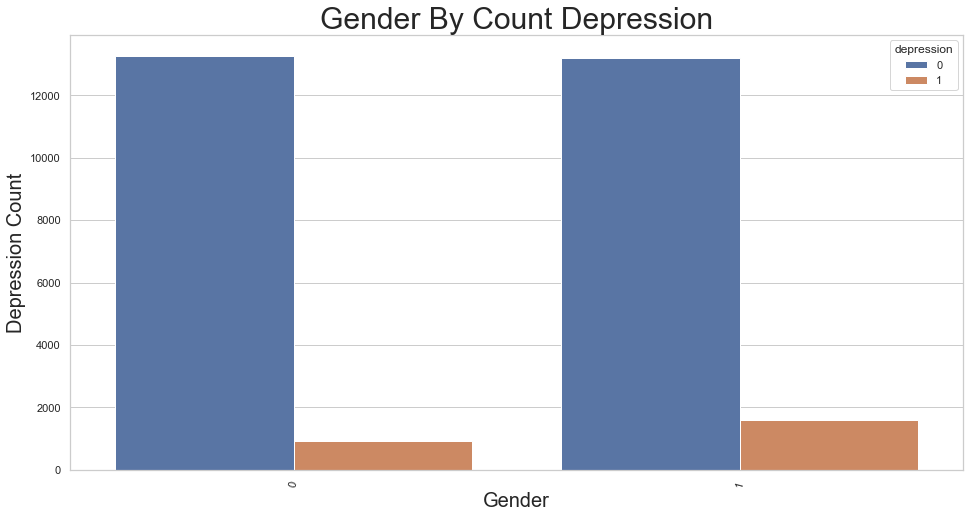

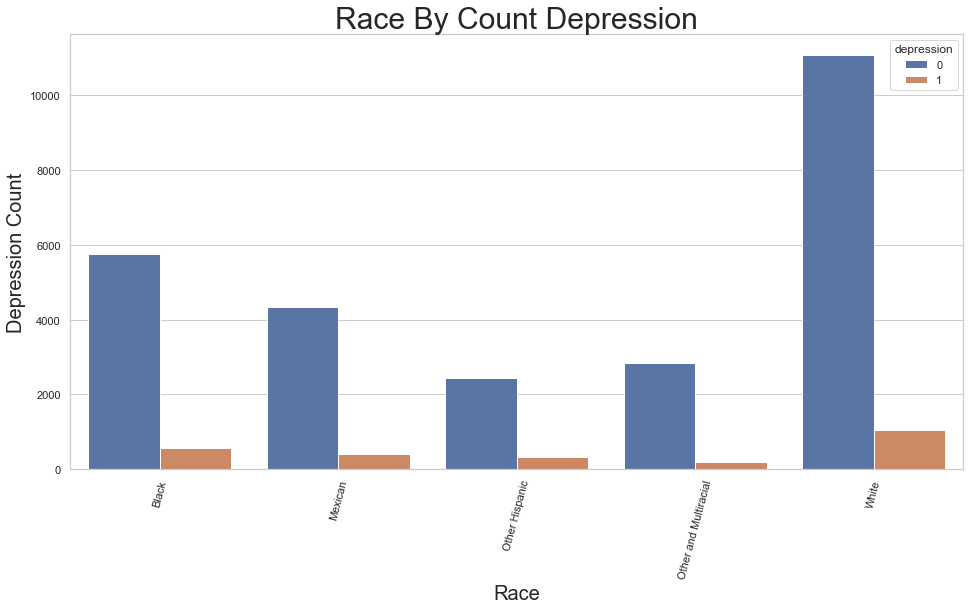

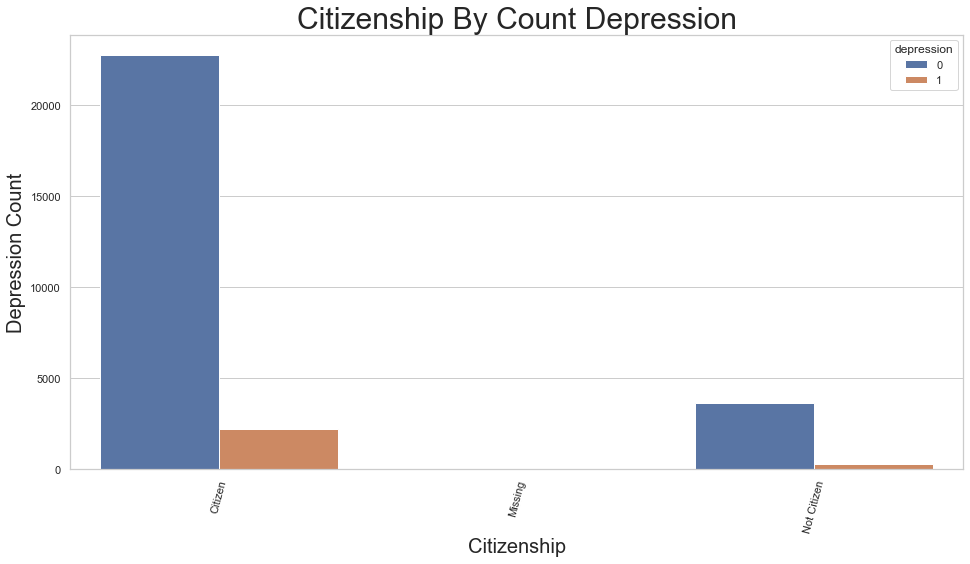

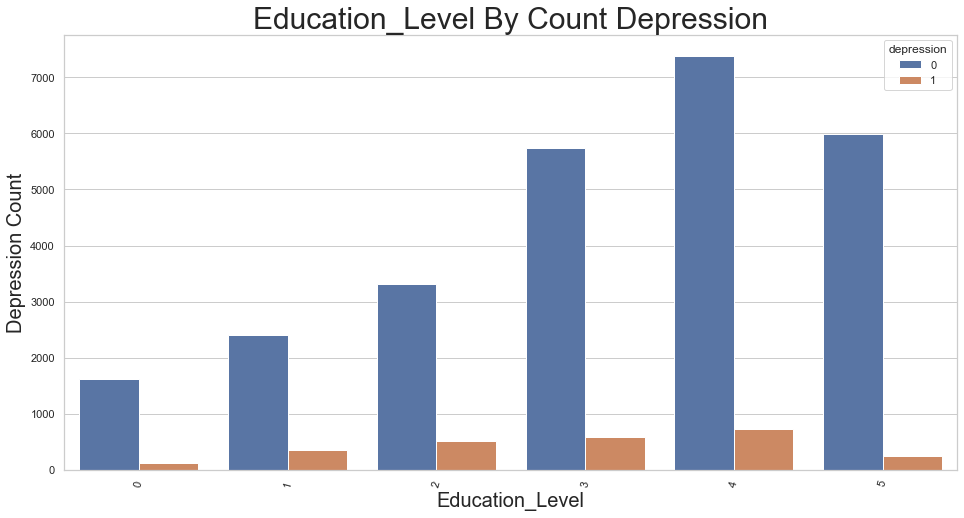

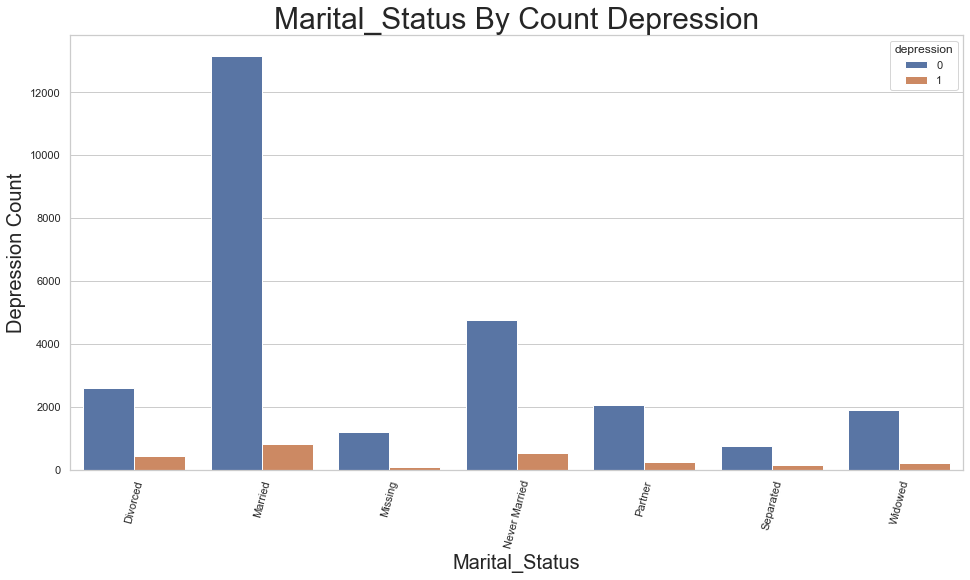

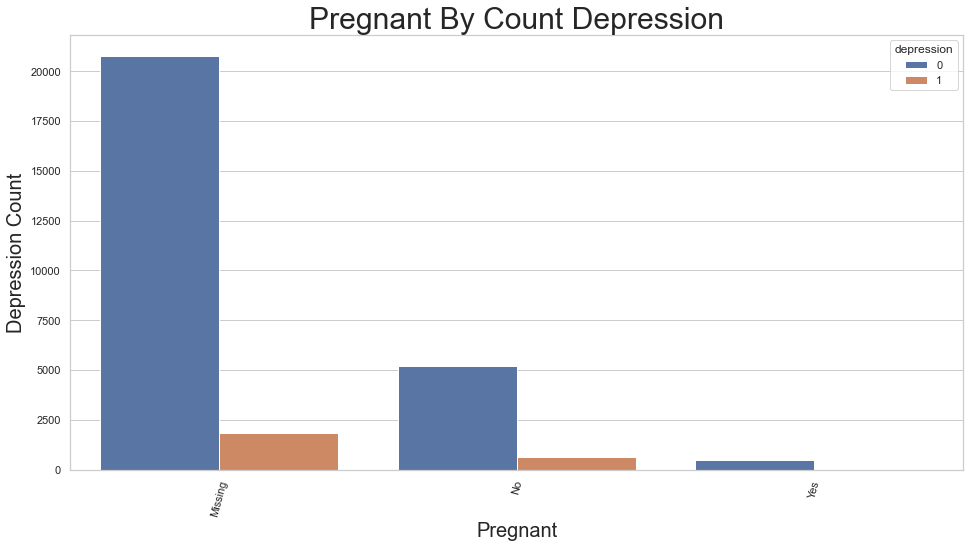

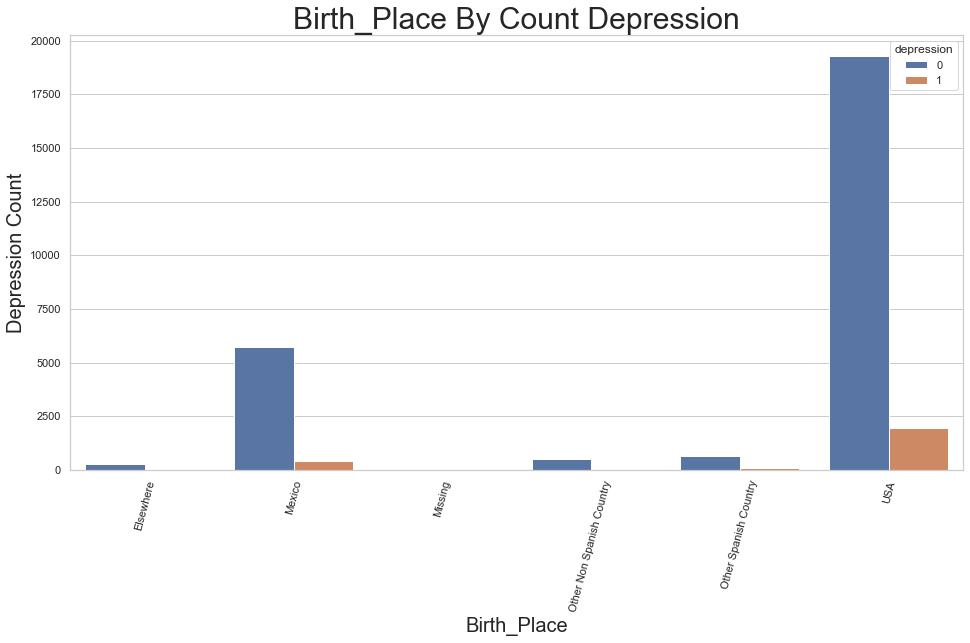

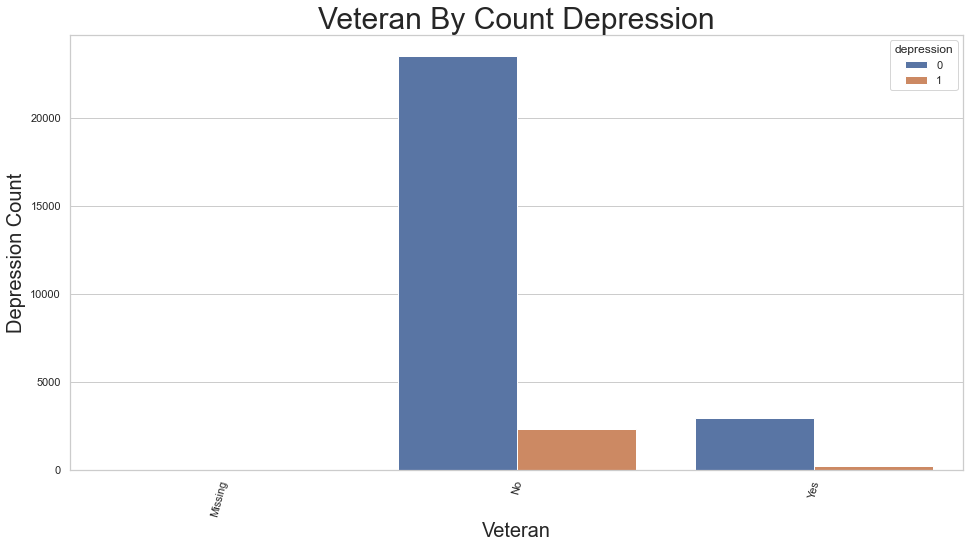

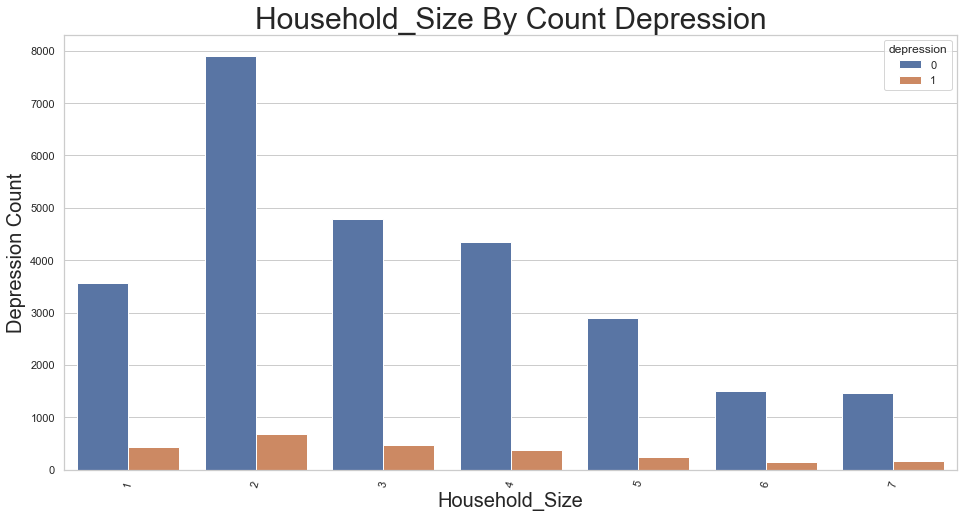

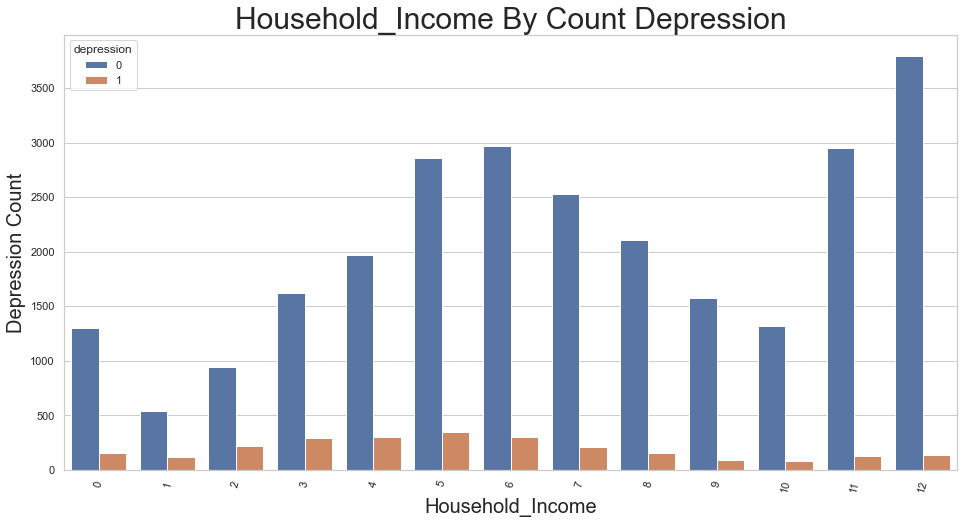

In [35]:
for col in demo_cat_cols:
    plotting_counts(train_df, col)

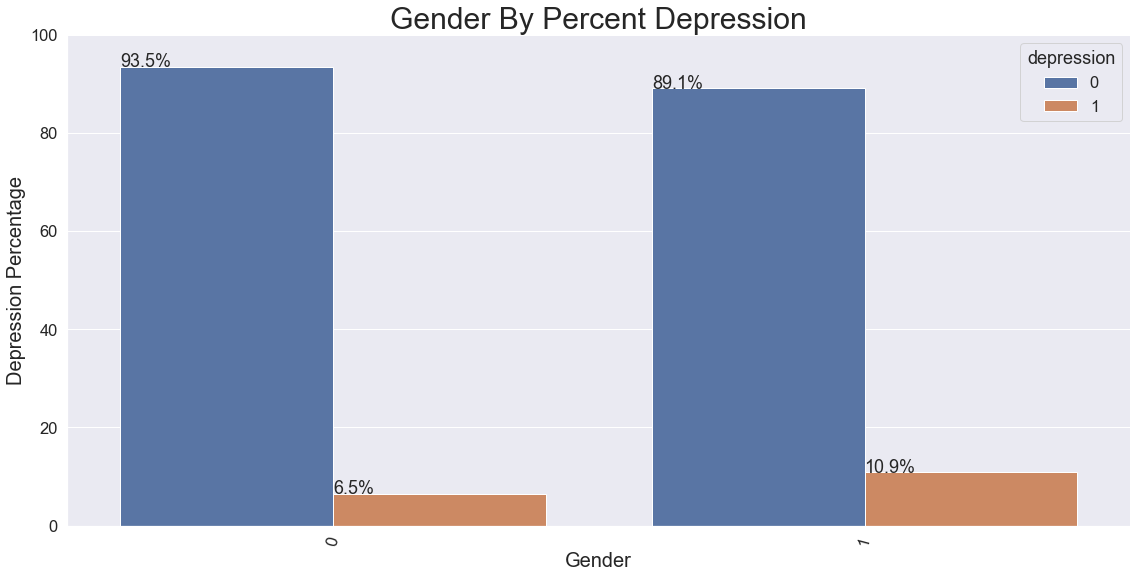

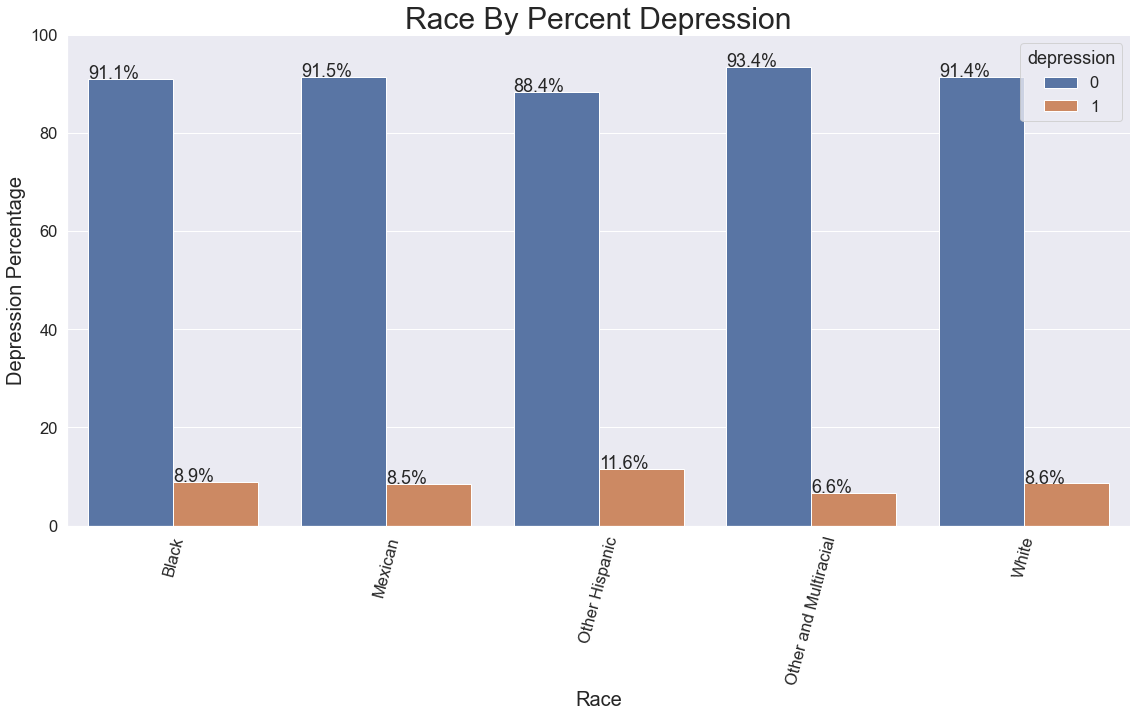

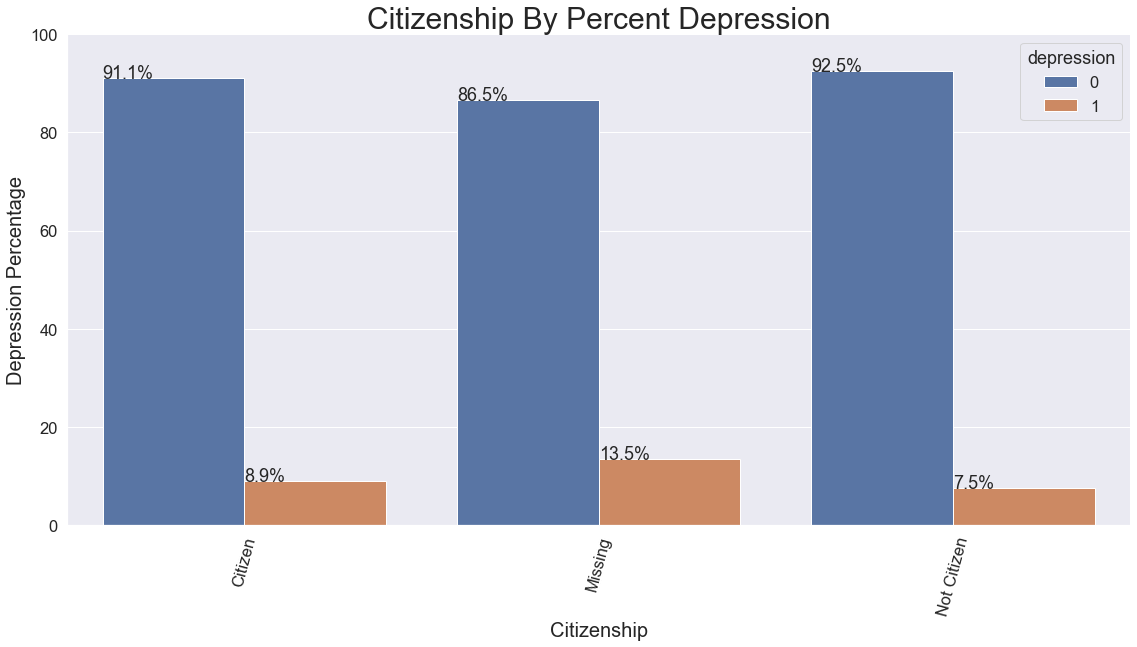

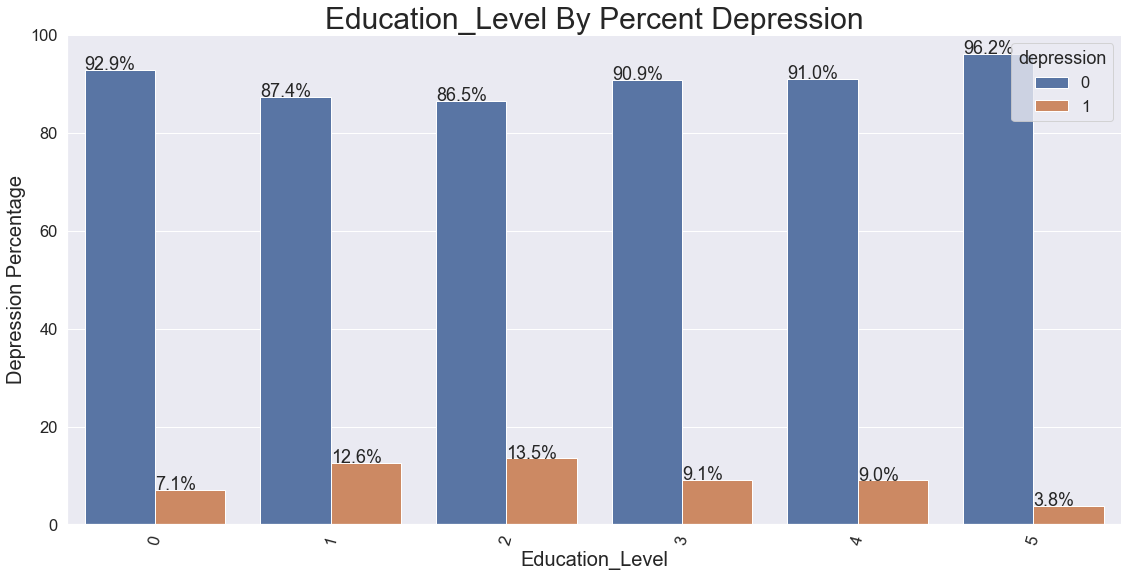

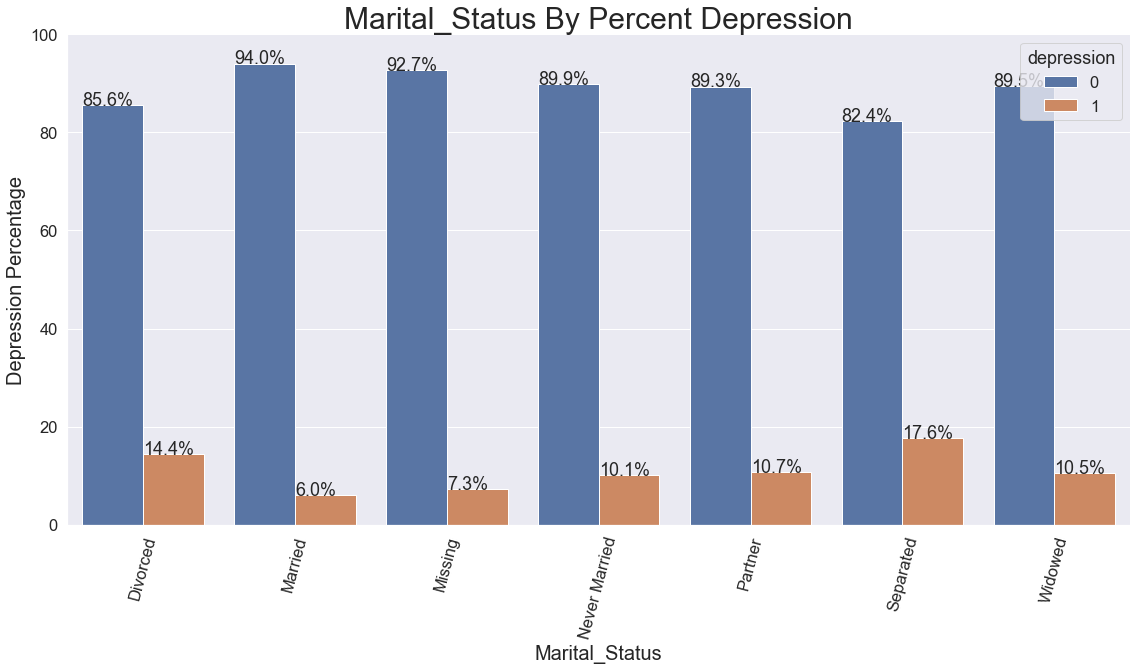

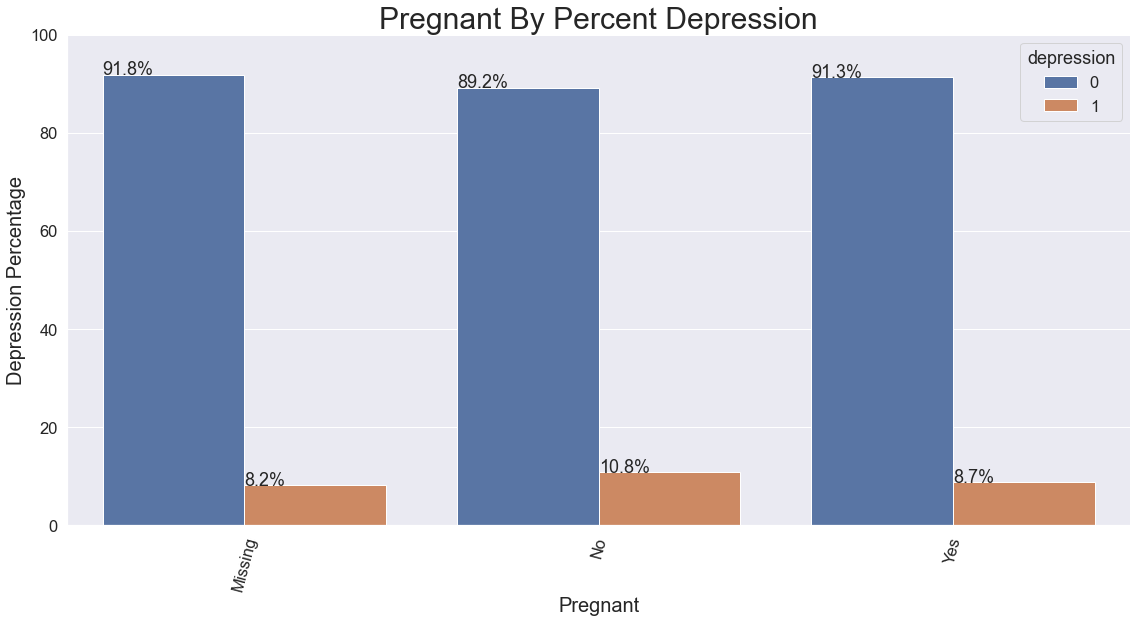

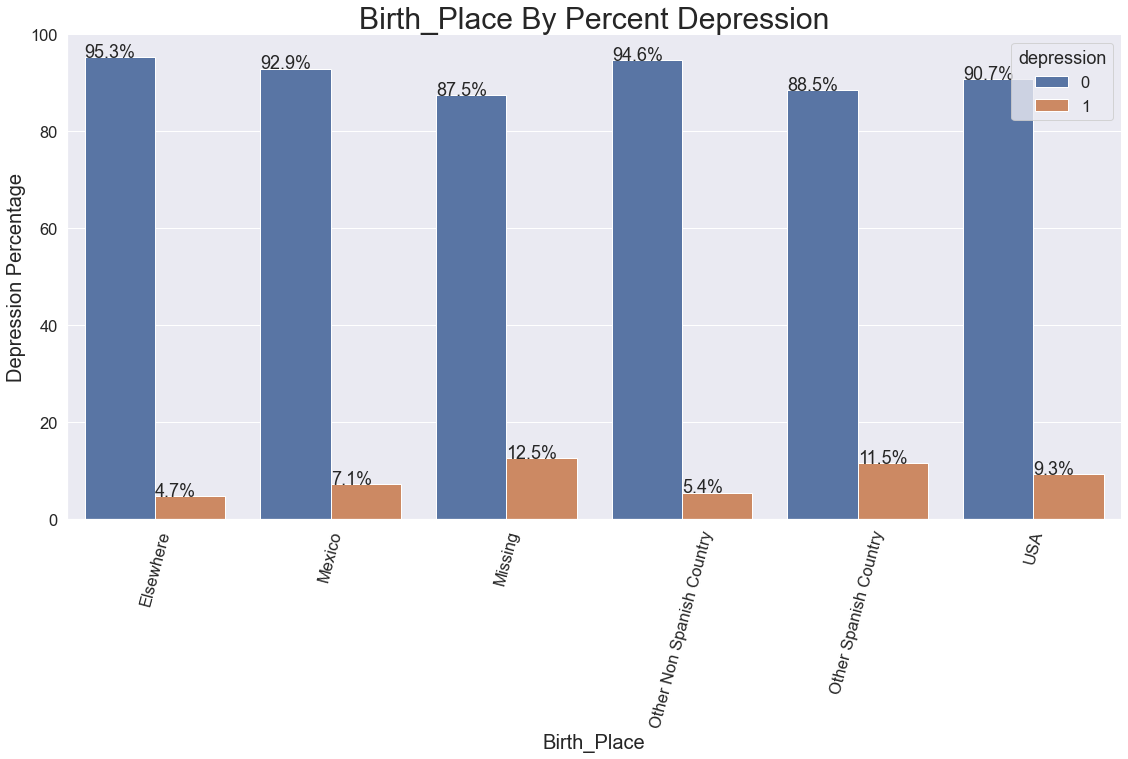

posx and posy should be finite values
posx and posy should be finite values


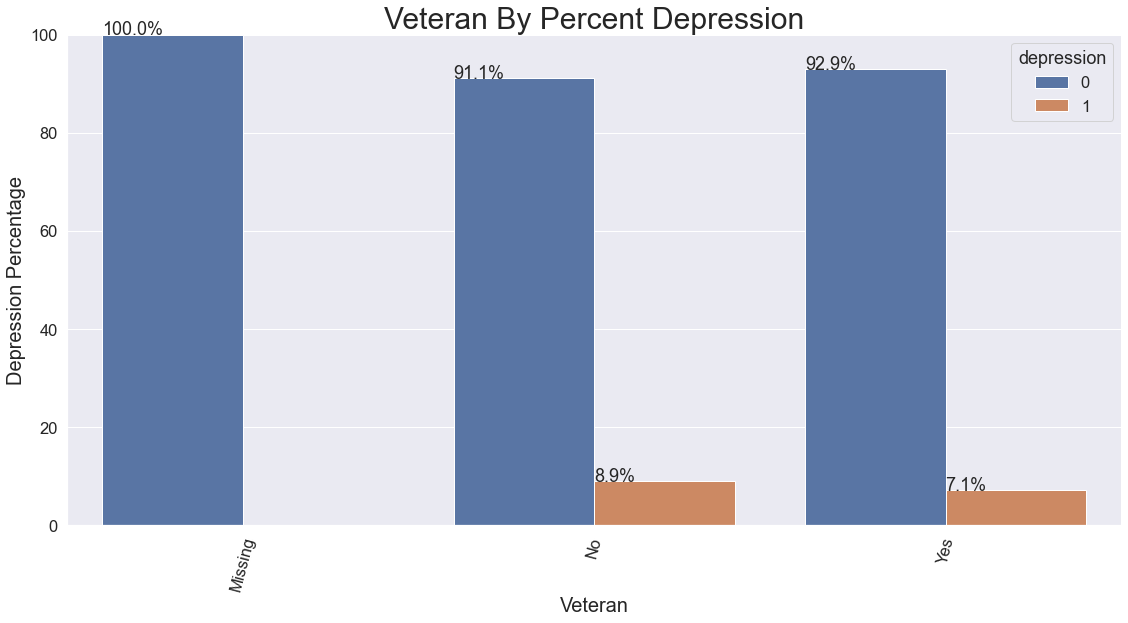

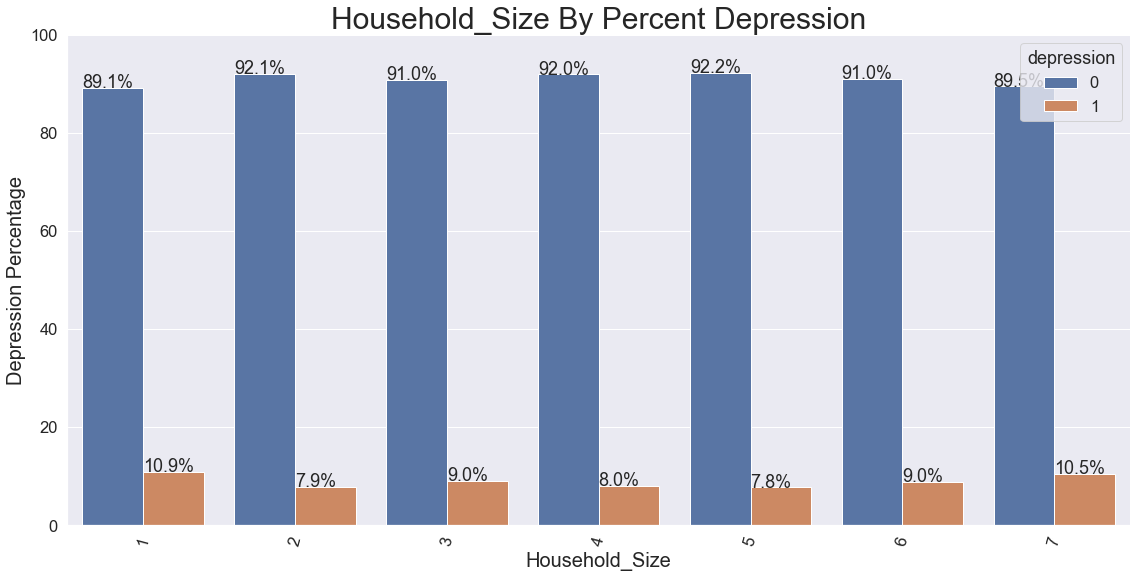

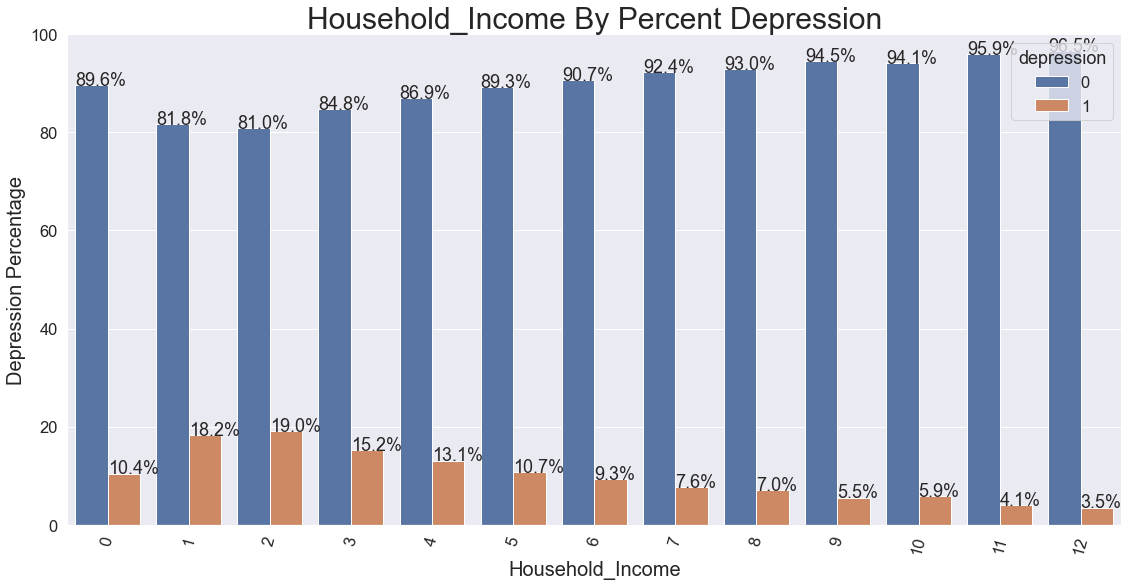

In [36]:
for col in demo_cat_cols:
    plotting_percentages(train_df, col)

## Medical Conditions

In [37]:
# Creating separate lists for the category and number columns
medcond_cat_cols = ['asthma', 'asthma_currently', 'asthma_emergency',
       'anemia', 'ever_overweight', 'blood_transfusion', 'arthritis',
       'heart_failure', 'heart_disease', 'angina', 'heart_attack', 'stroke',
       'emphysema', 'bronchitis', 'liver_condition', 'thyroid_problem',
       'bronchitis_currently', 'liver_condition_currently',
       'thyroid_problem_currently', 'cancer', 'first_cancer_type',
       'second_cancer_type', 'third_cancer_type', 'fourth_cancer_count',
       'heart_attack_relative', 'asthma_relative', 'diabetes_relative',
       'hay_fever', 'arthritis_type', 'first_cancer_count', 
       'second_cancer_count', 'third_cancer_count']

medcond_num_cols = ['asthma_onset', 'arthritis_onset', 'heart_failure_onset',
       'heart_disease_onset', 'angina_onset', 'heart_attack_onset',
       'stroke_onset', 'emphysema_onset', 'bronchitis_onset',
       'liver_condition_onset', 'thyroid_problem_onset', 'cancer_onset']

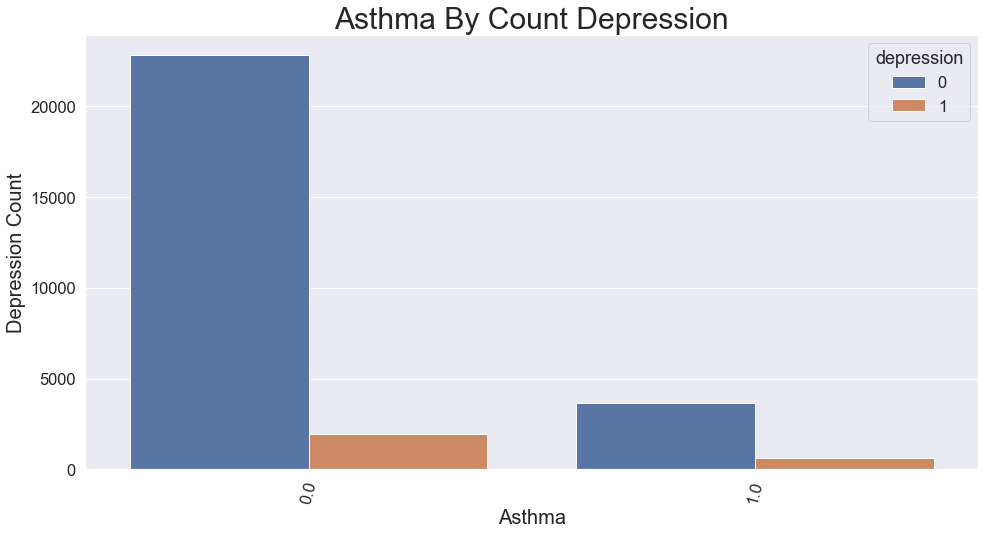

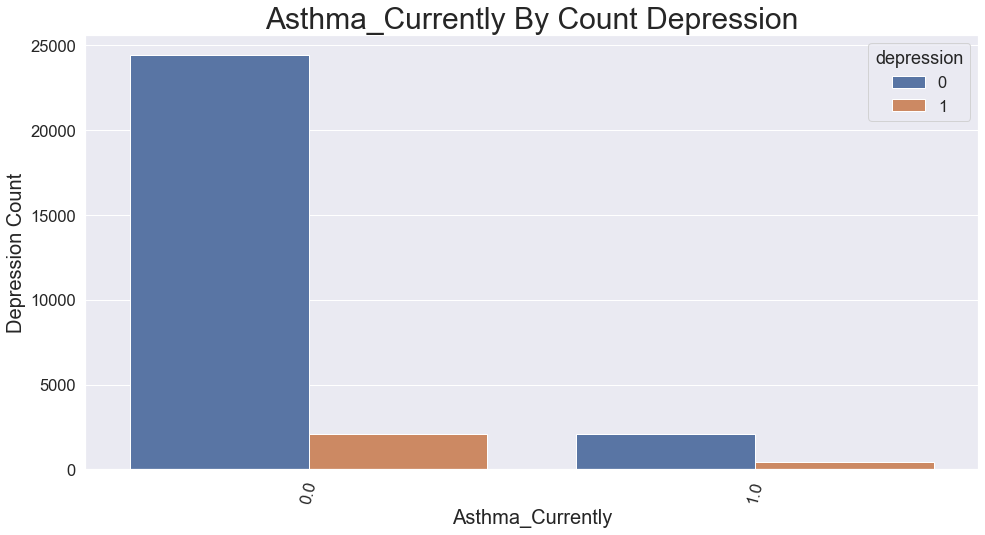

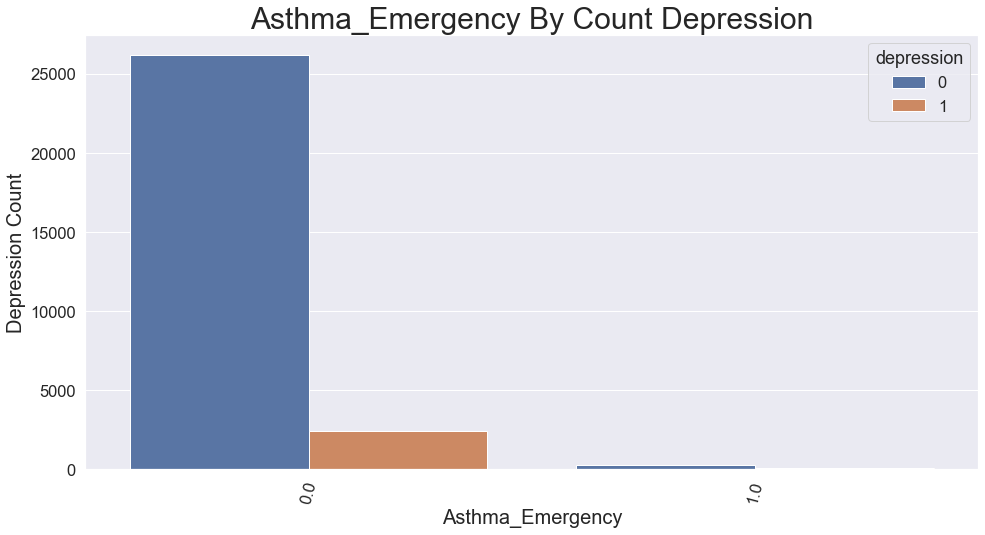

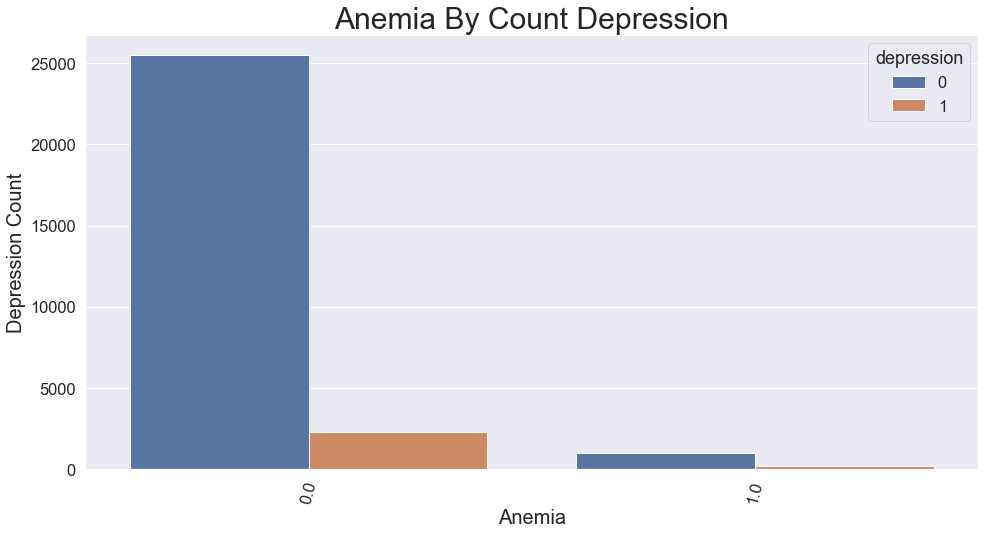

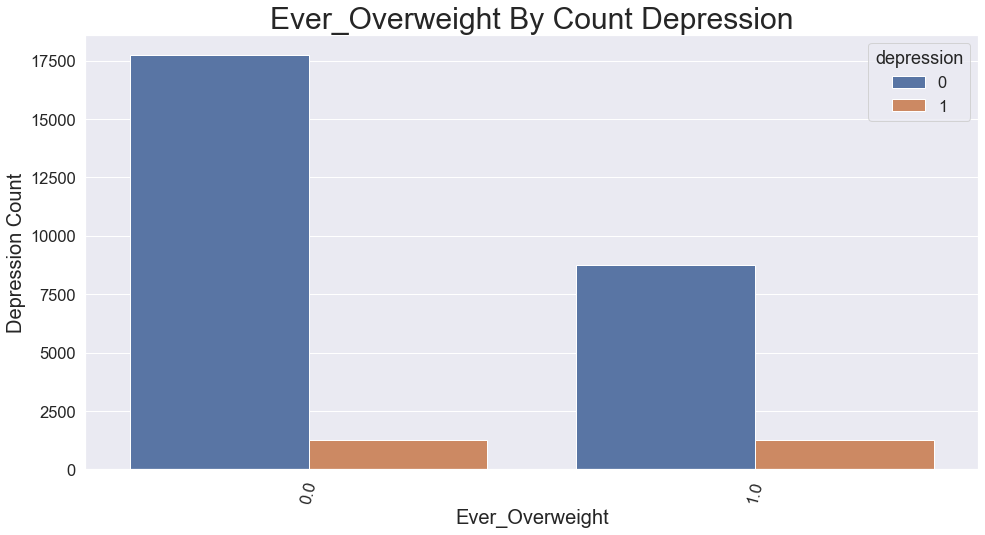

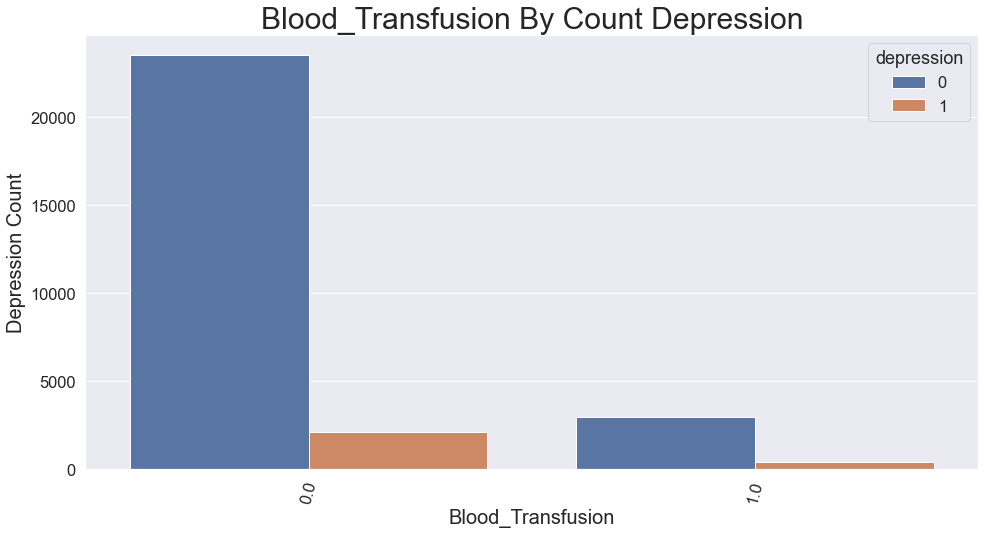

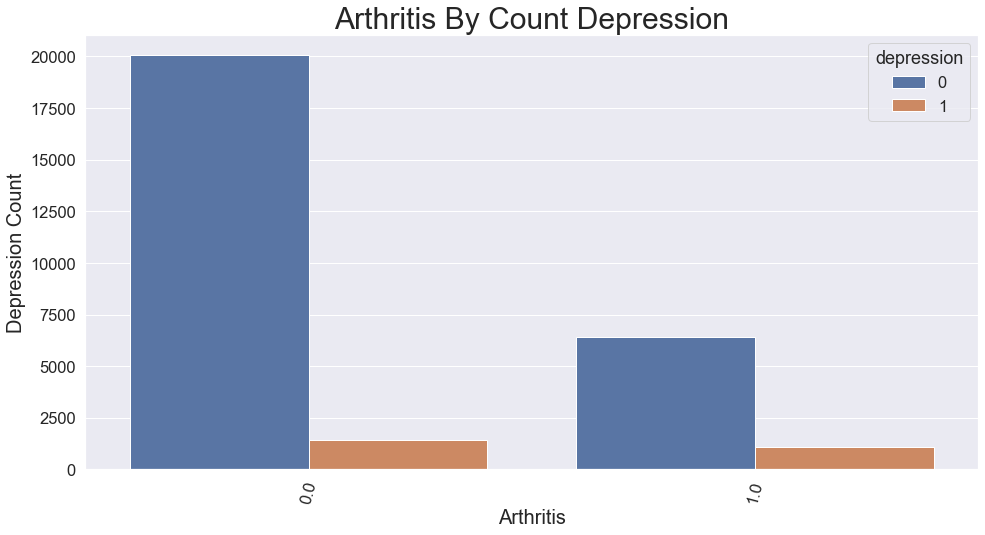

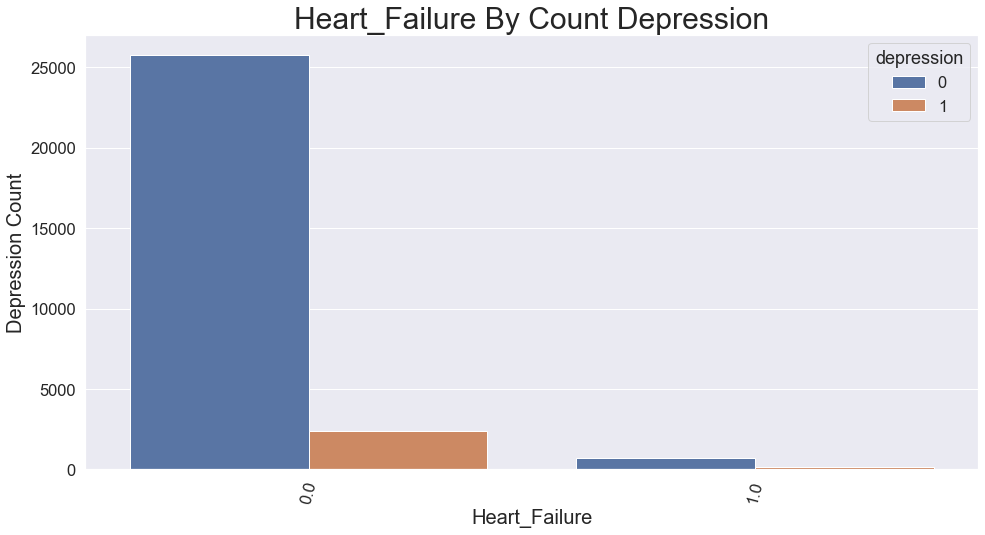

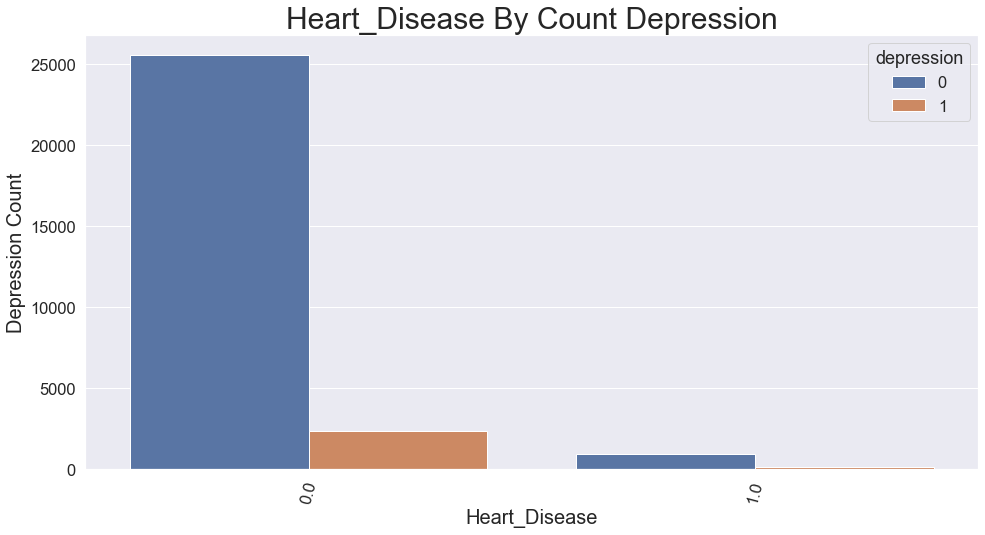

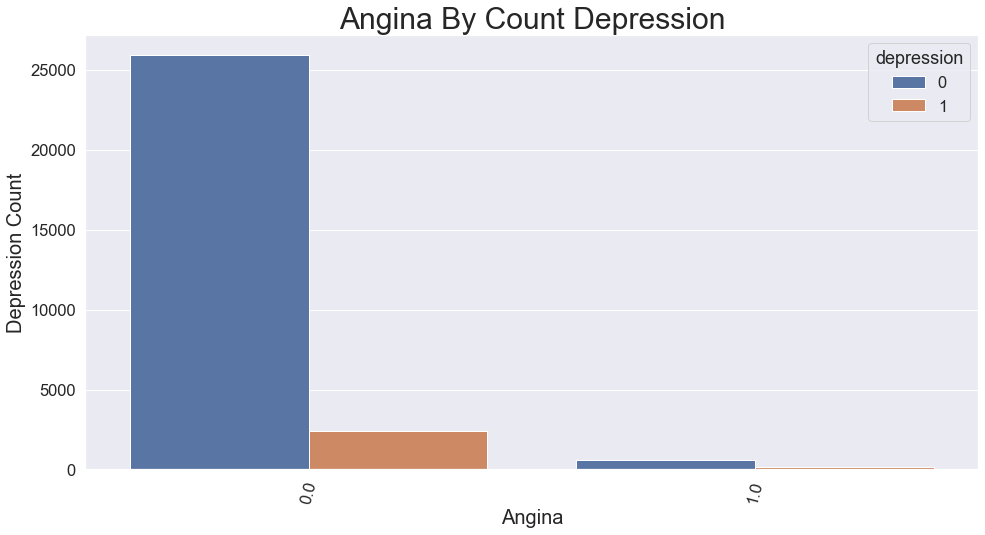

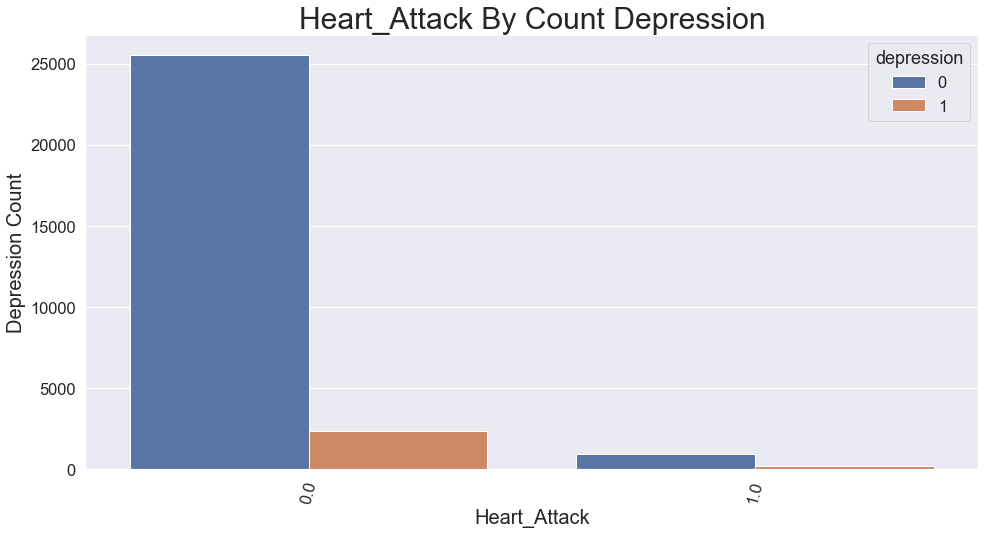

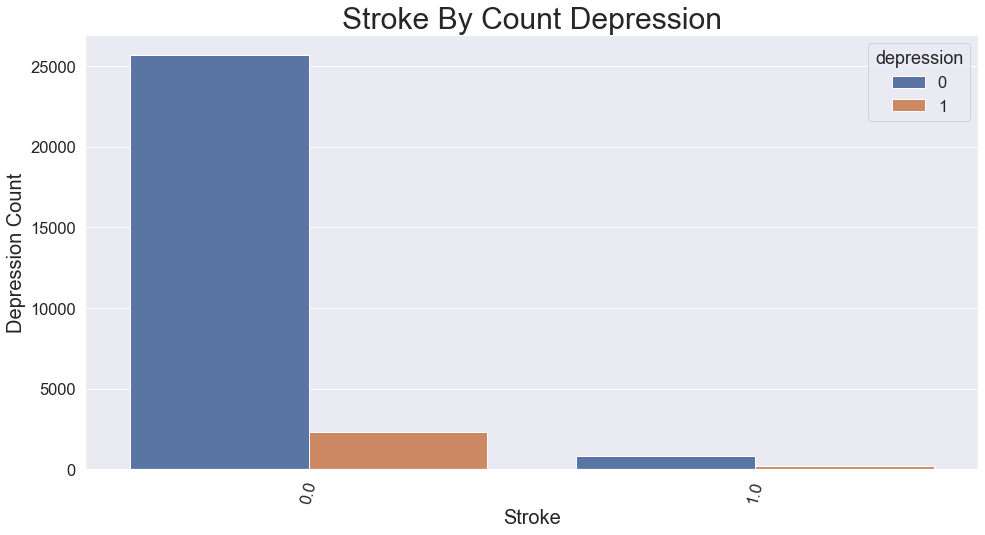

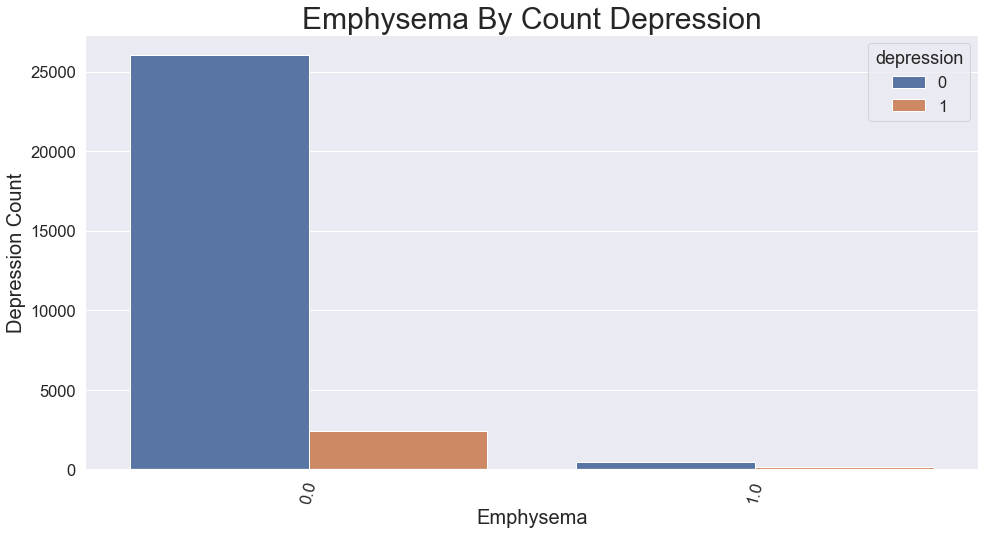

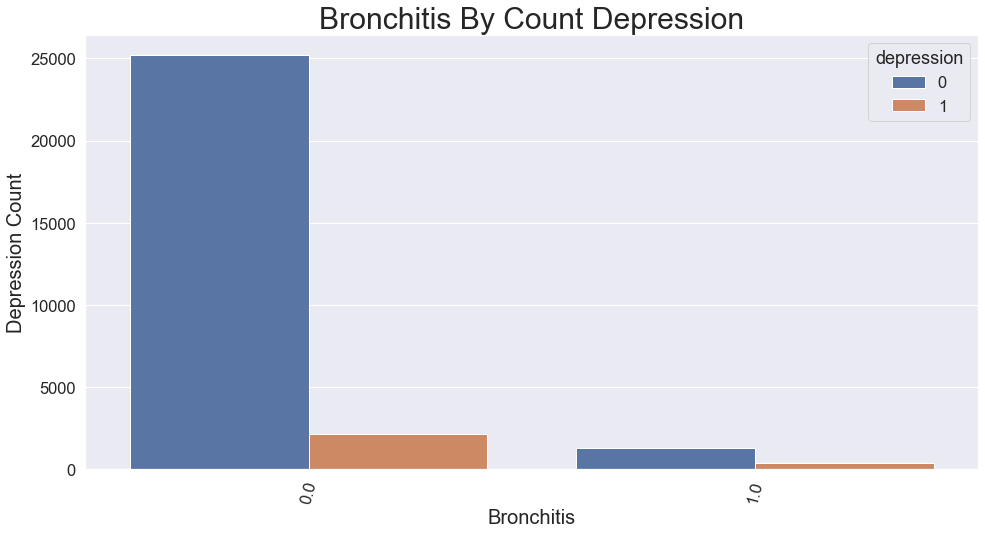

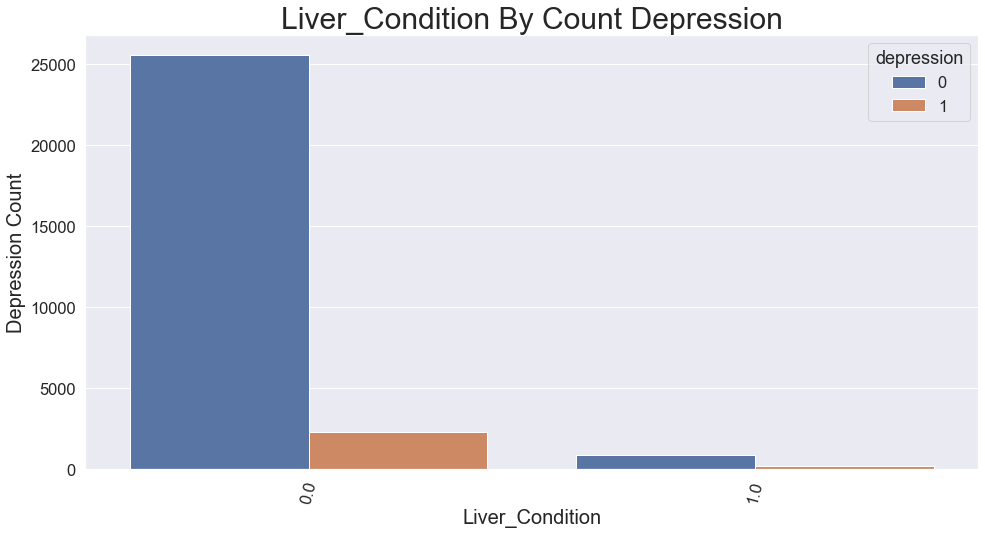

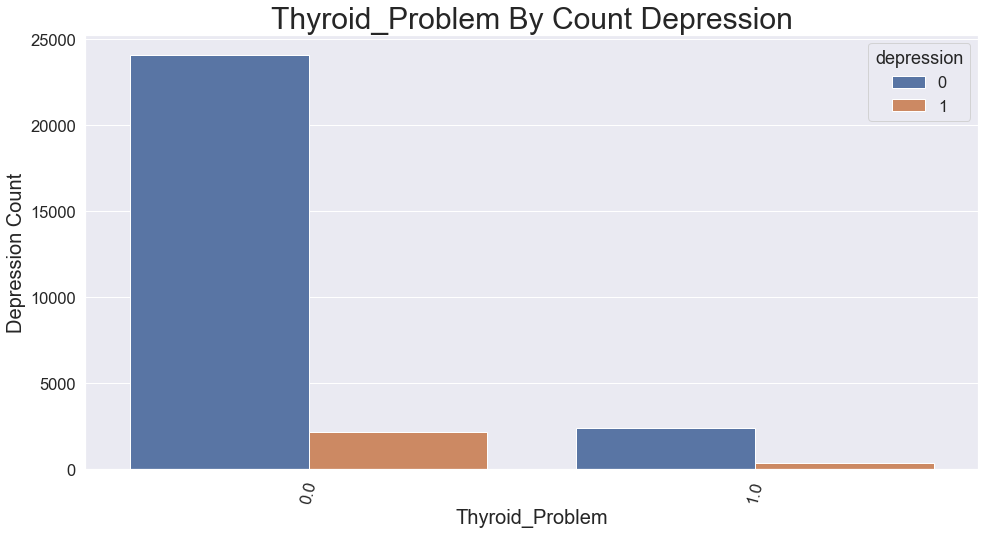

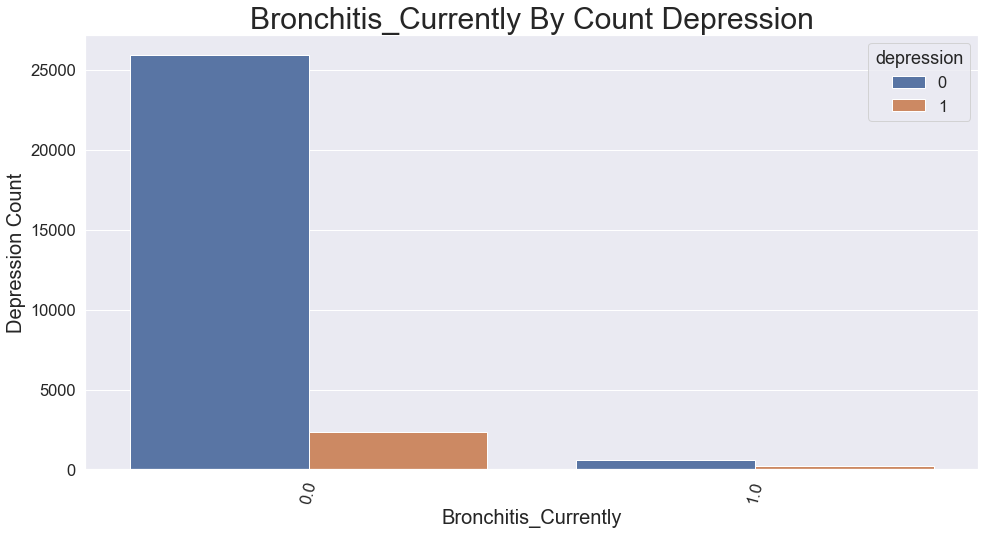

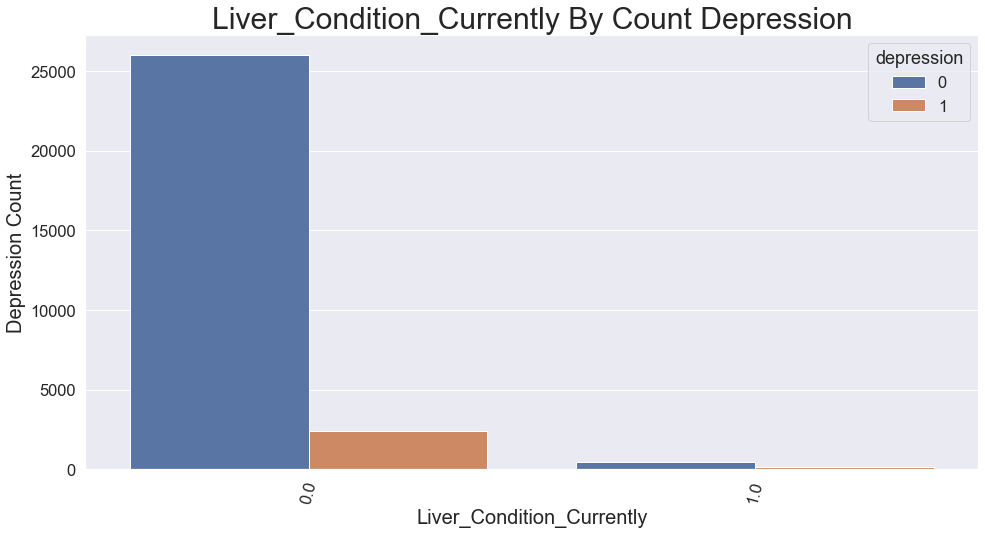

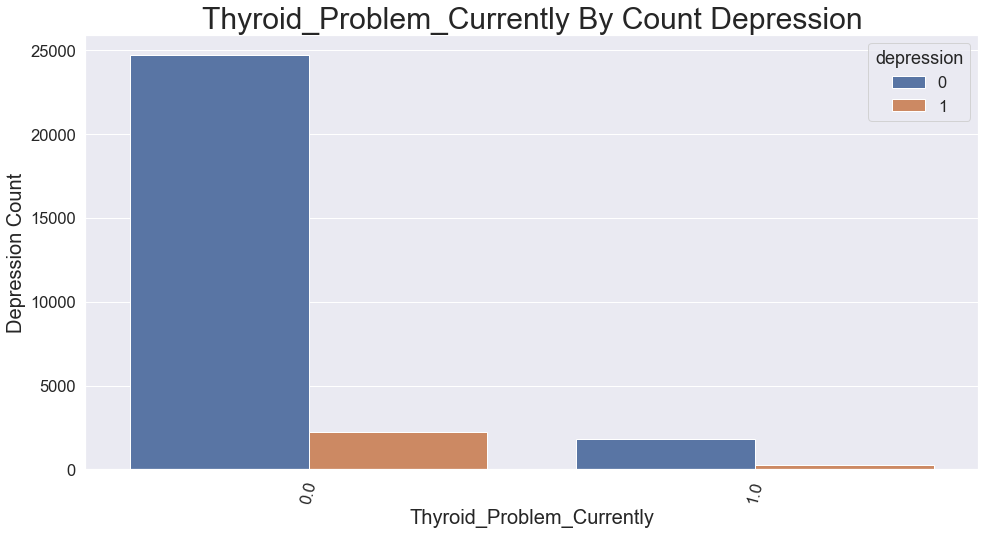

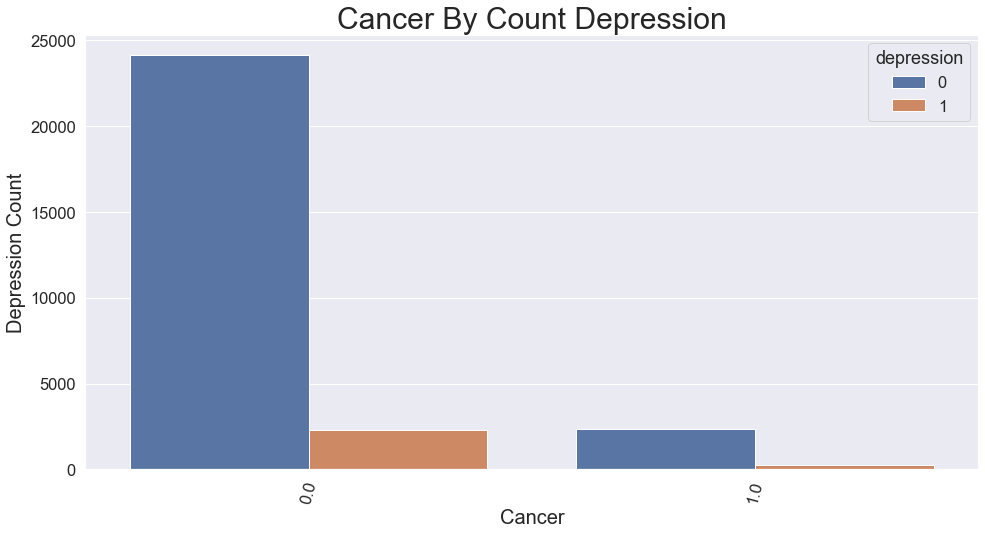

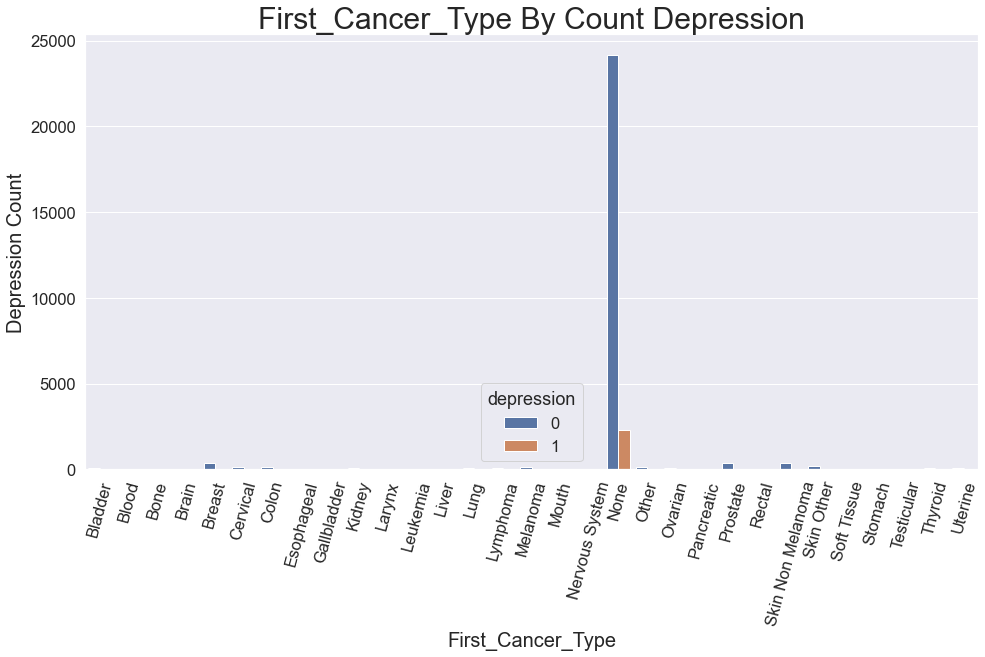

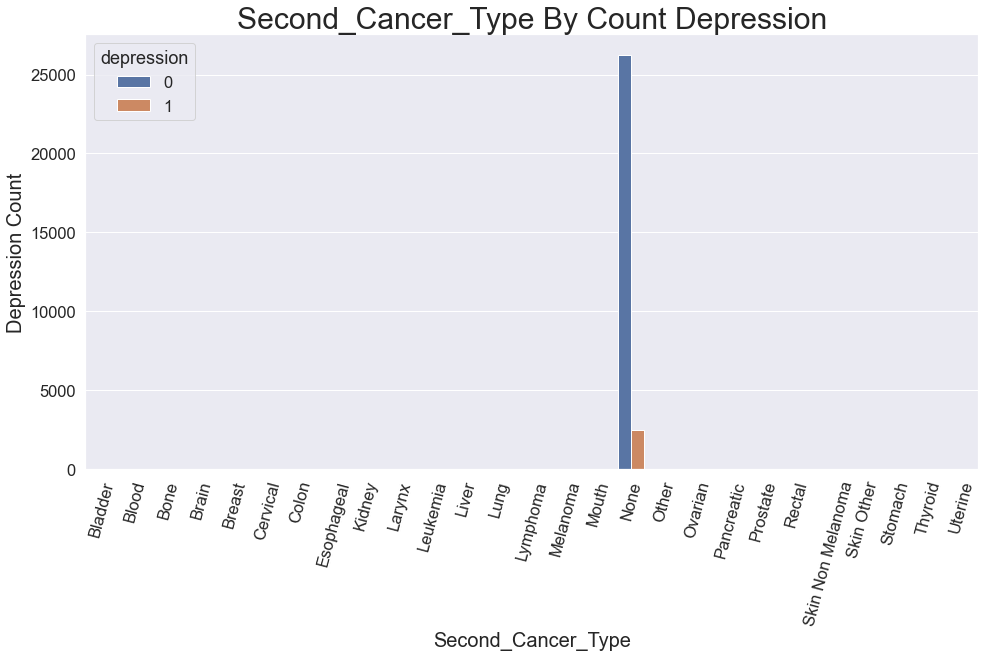

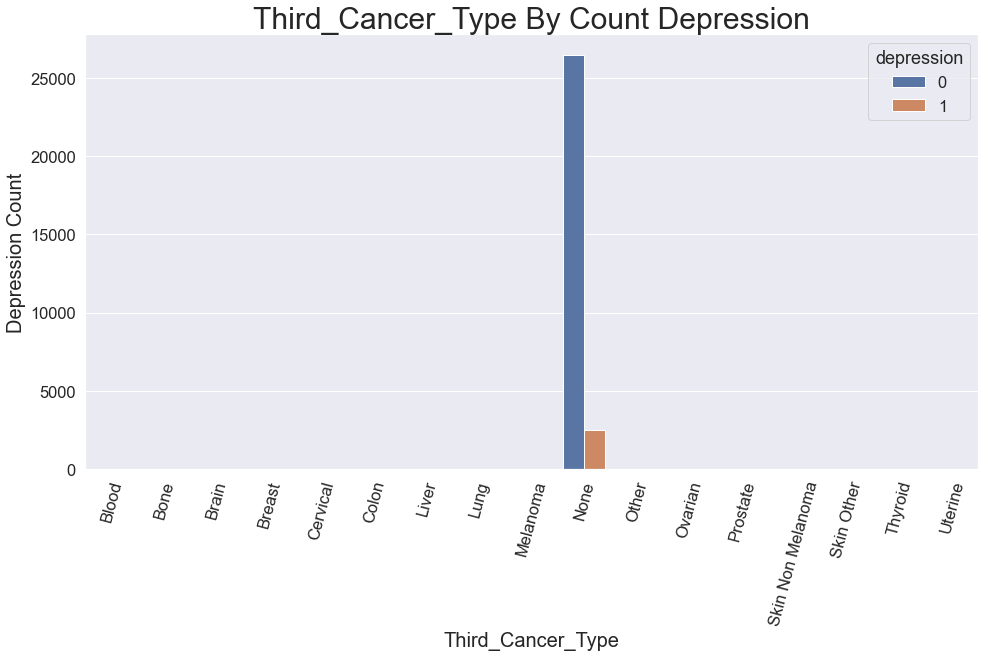

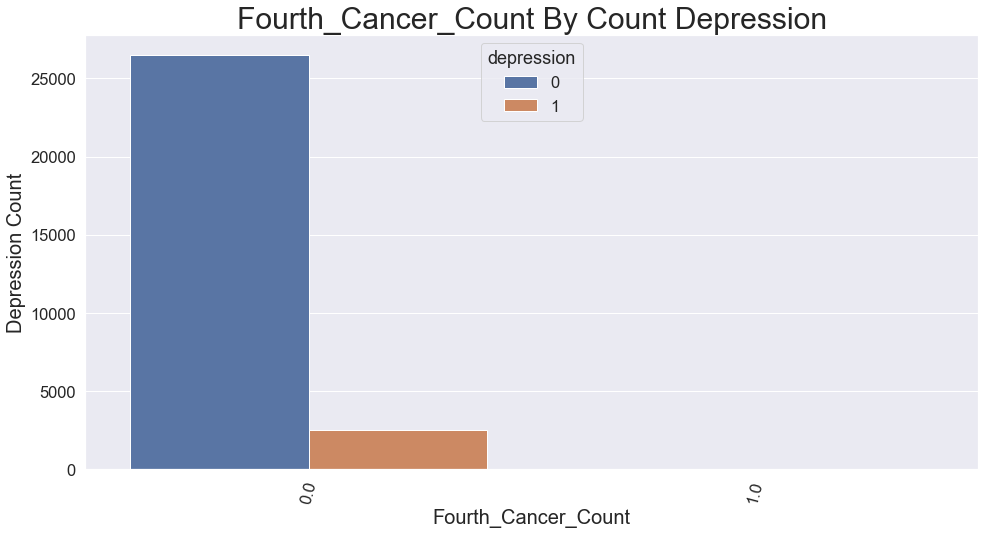

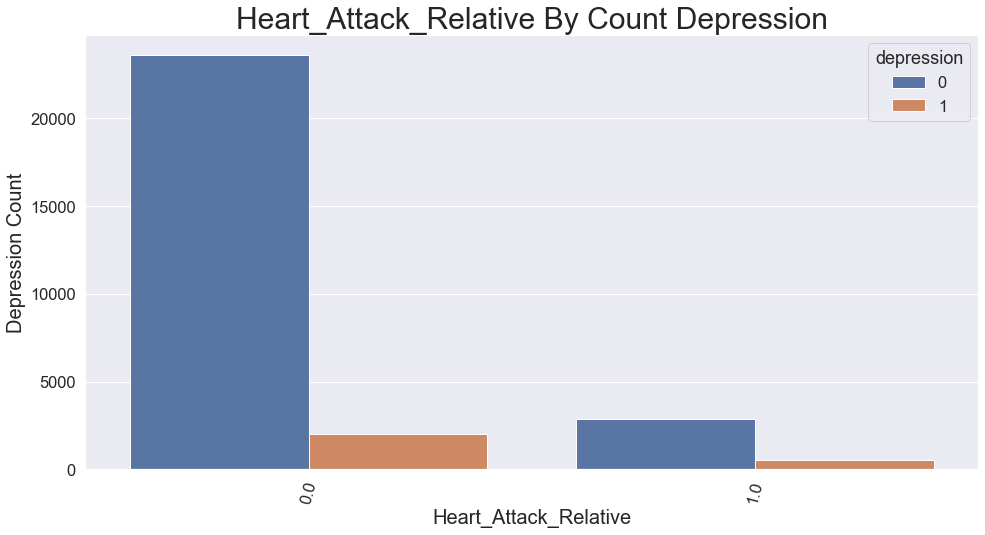

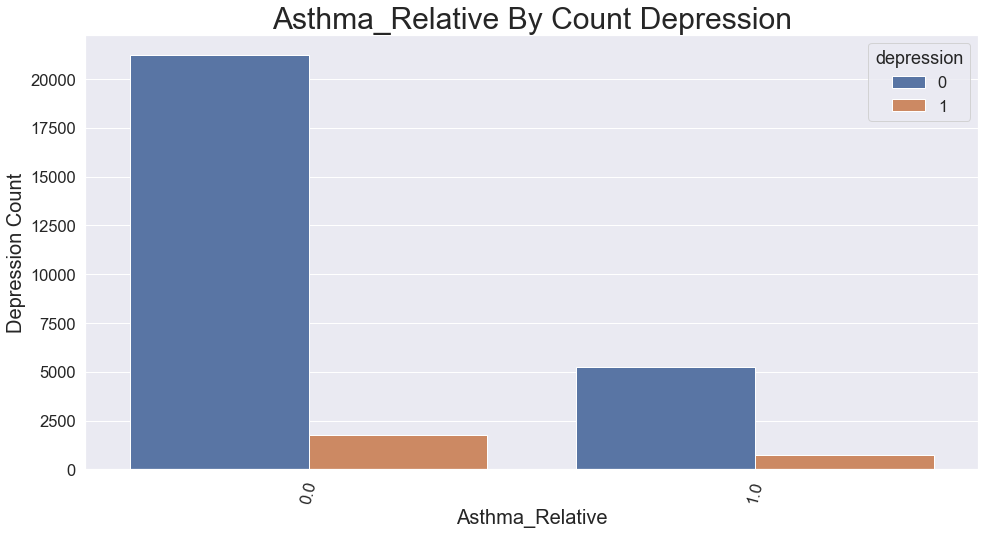

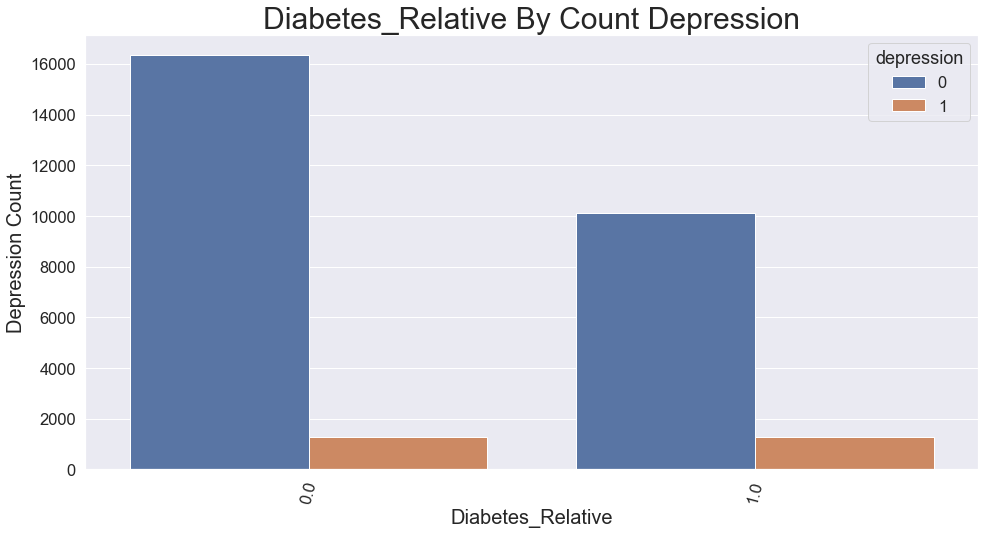

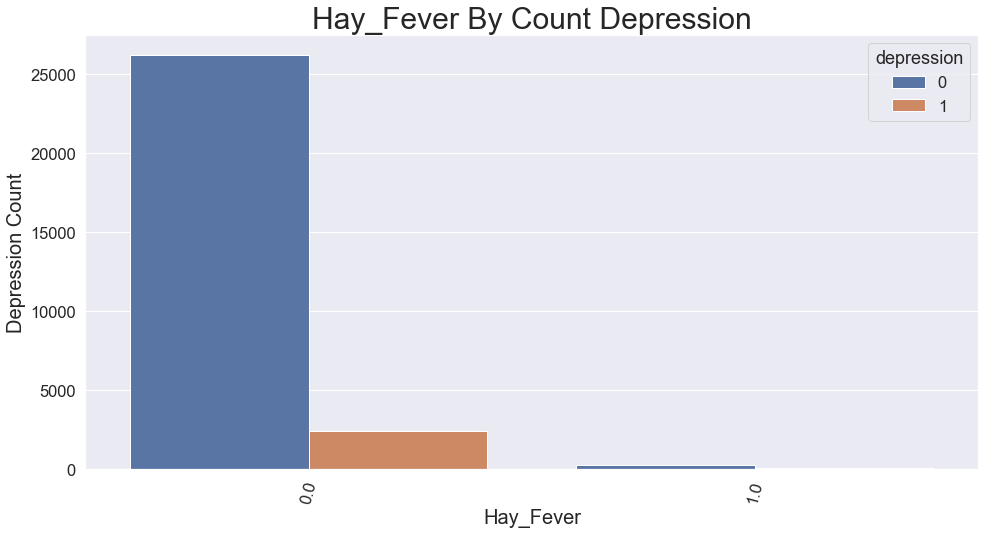

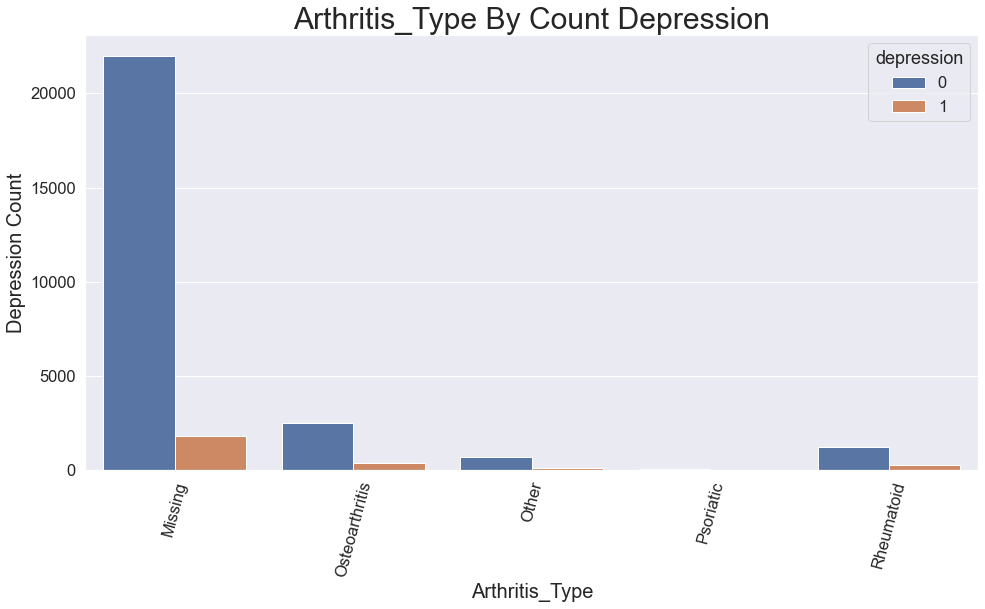

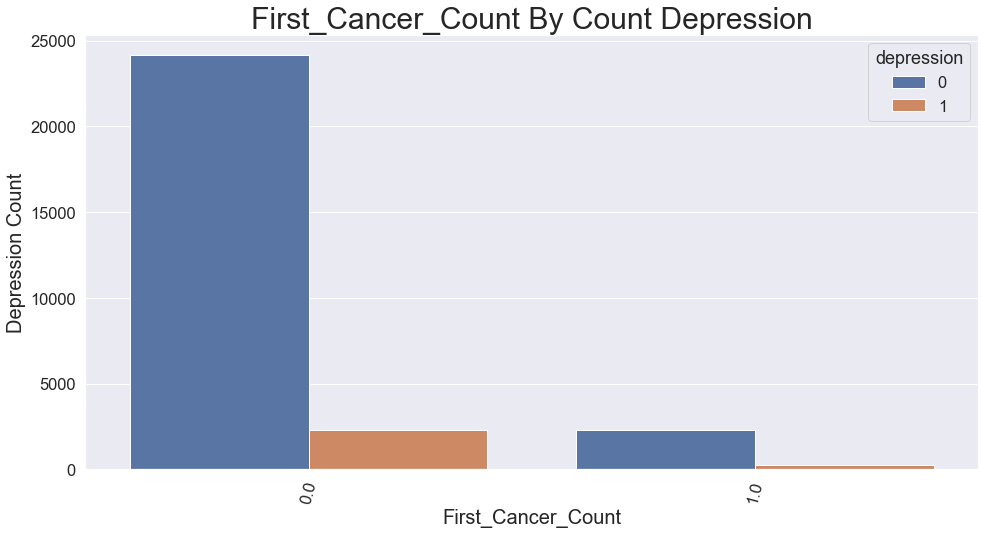

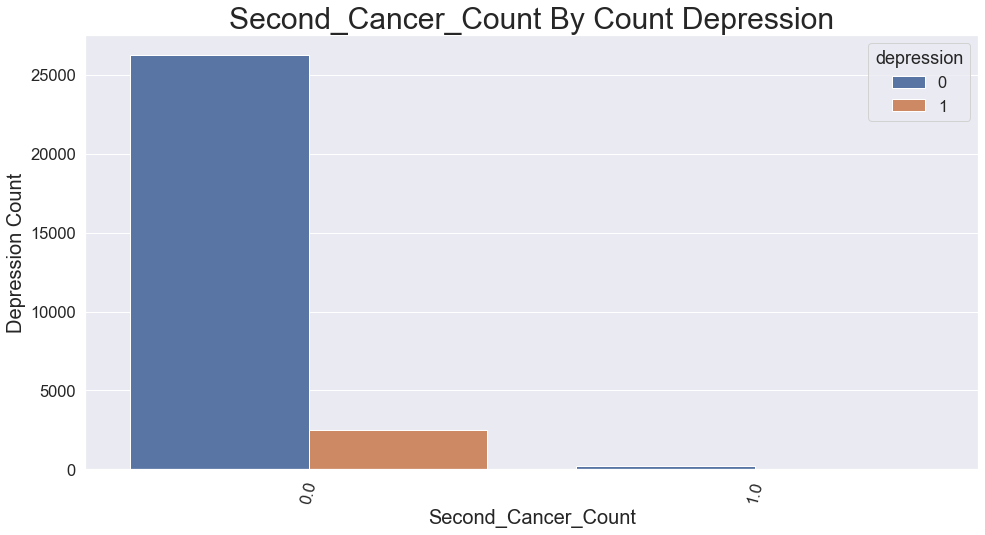

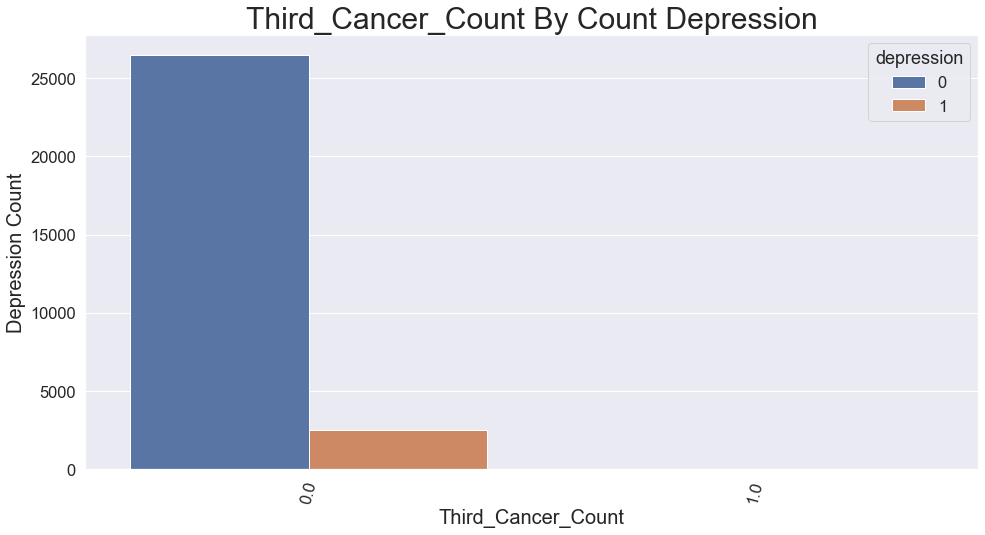

In [38]:
for col in medcond_cat_cols:
    plotting_counts(train_df, col)

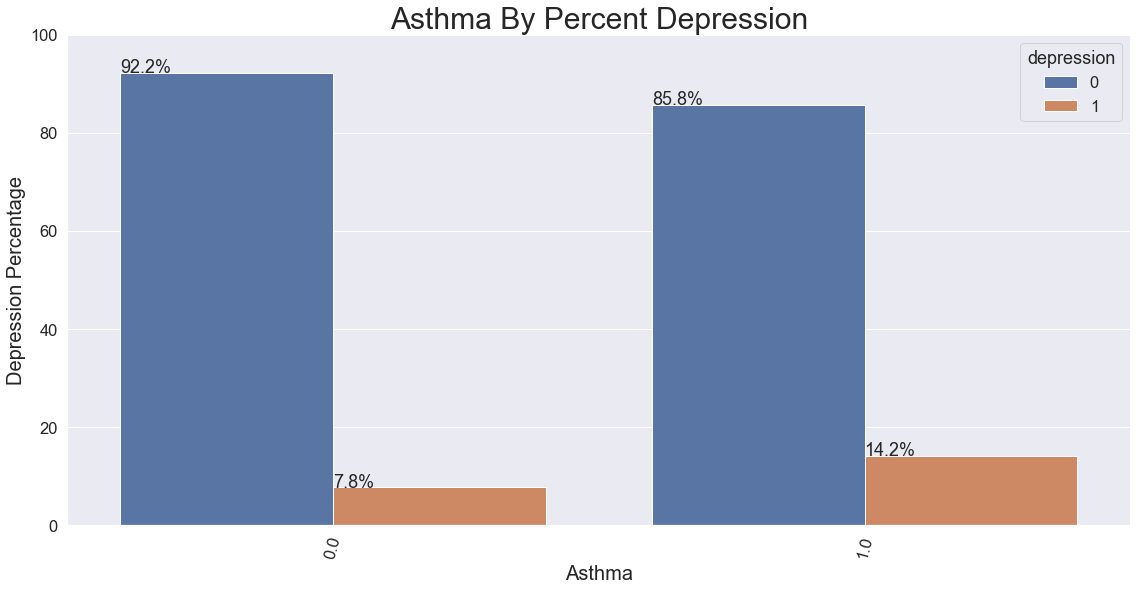

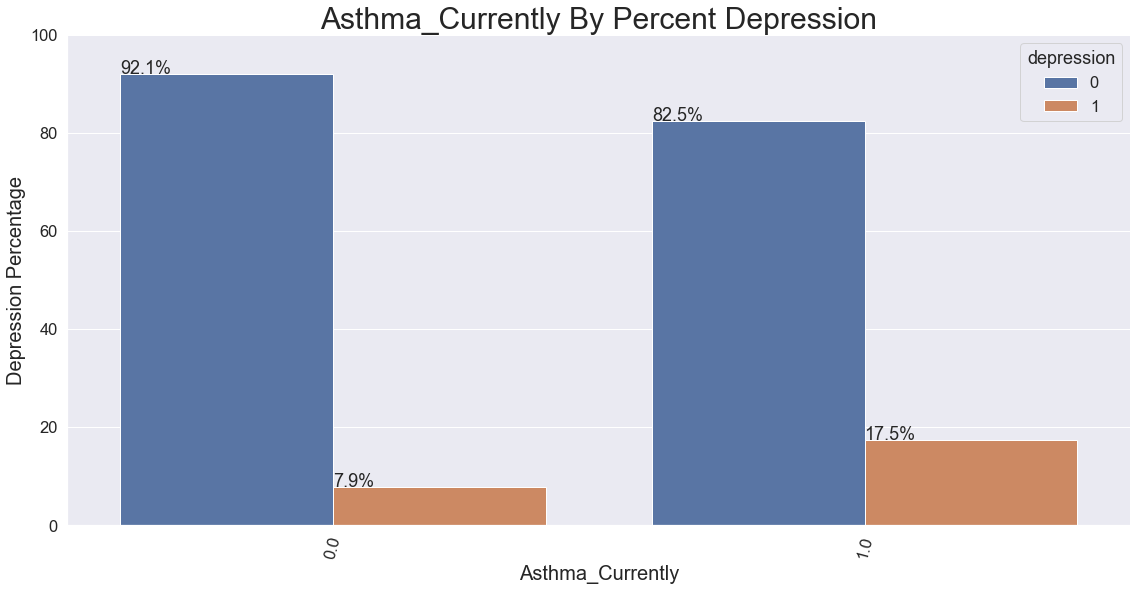

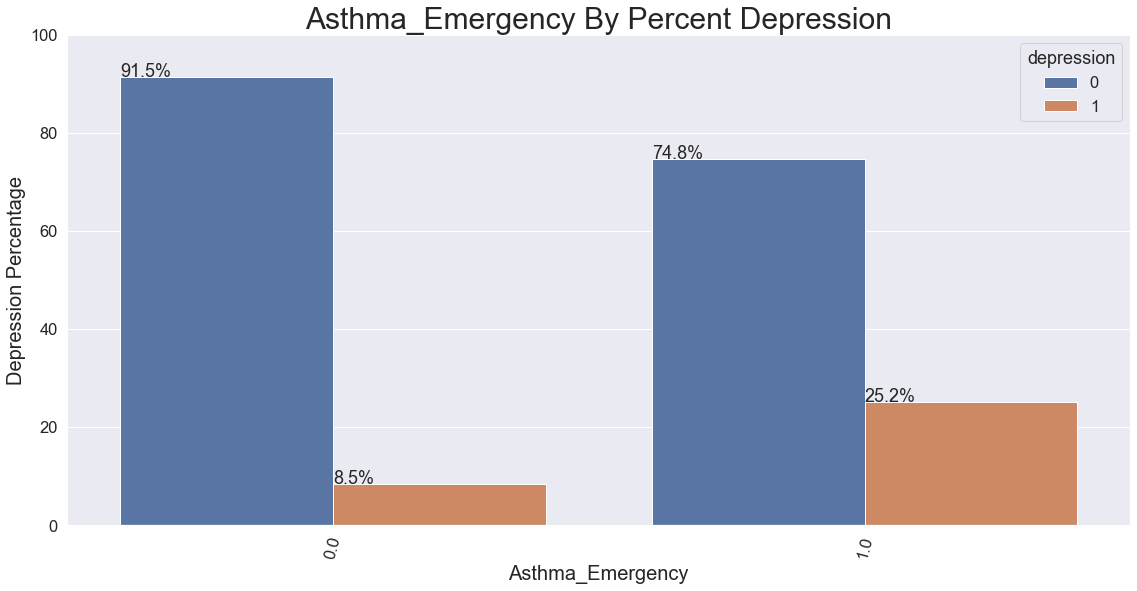

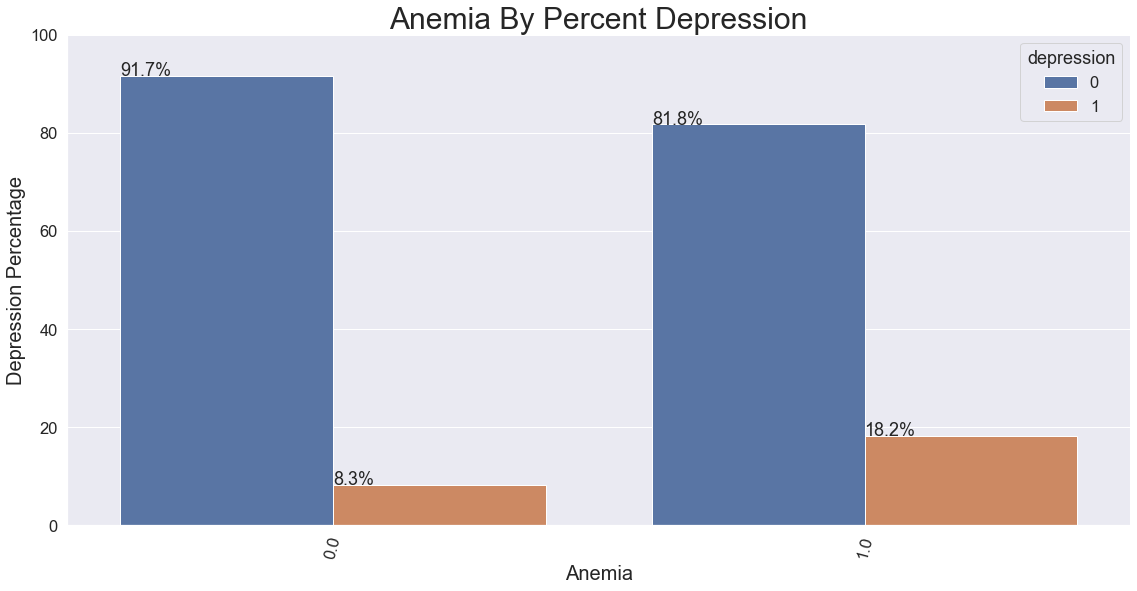

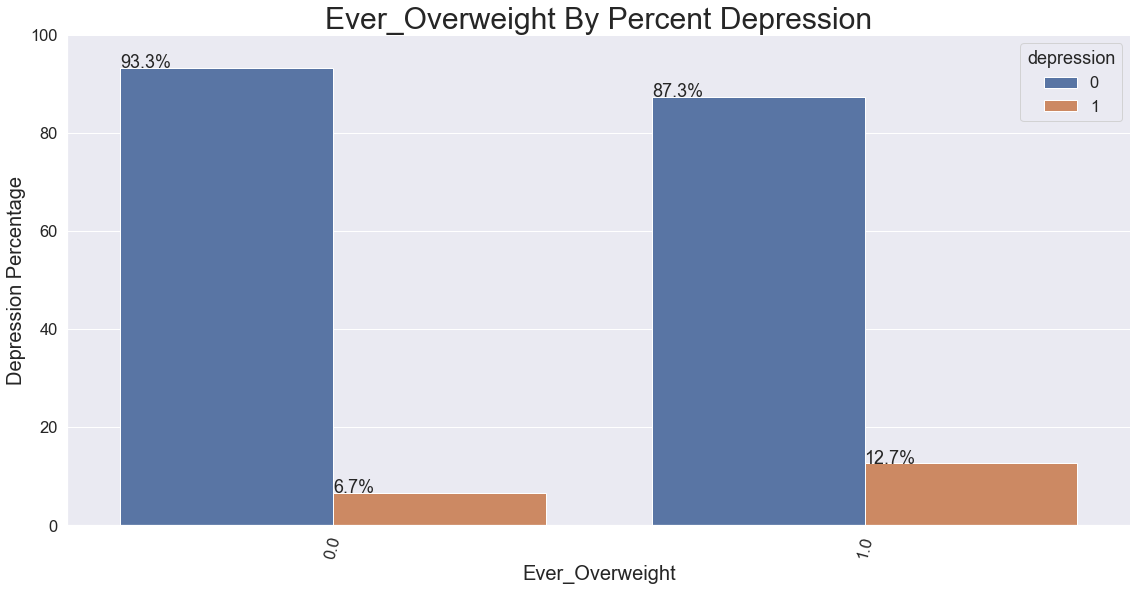

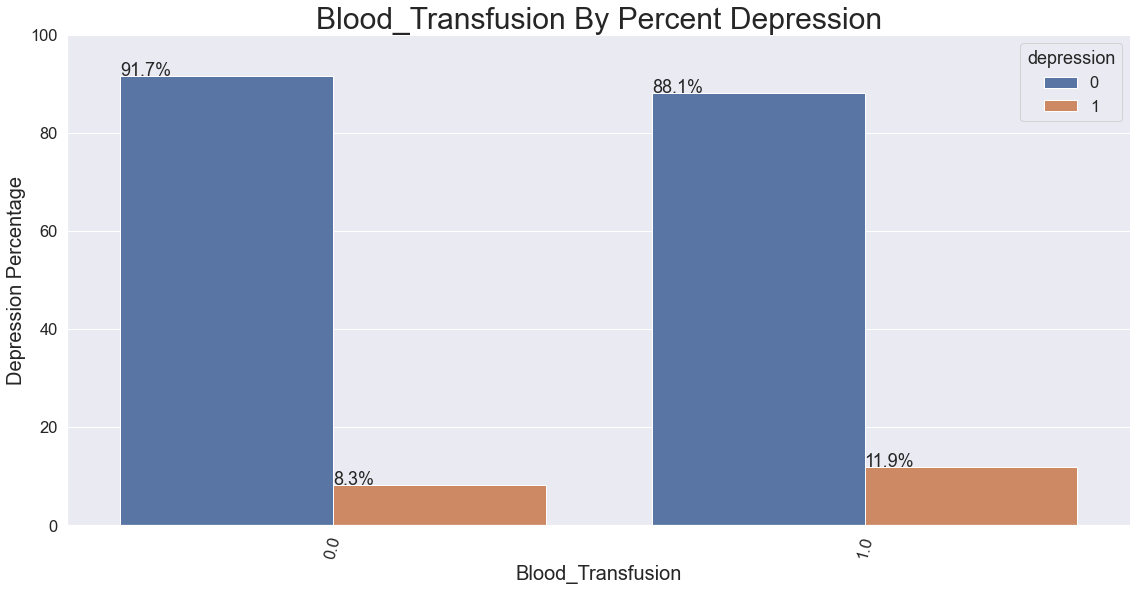

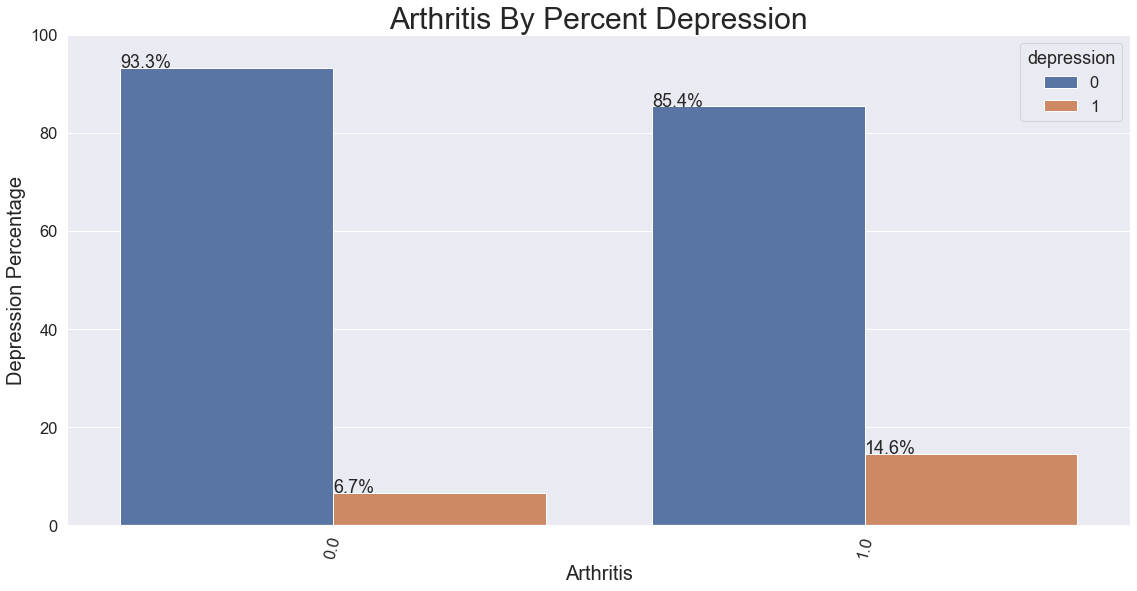

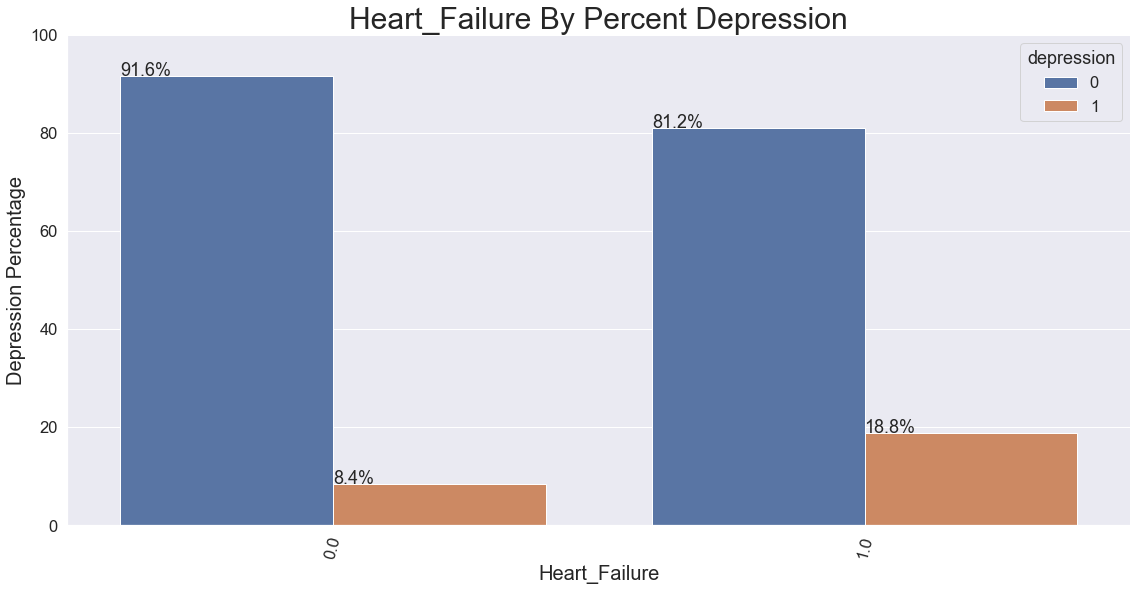

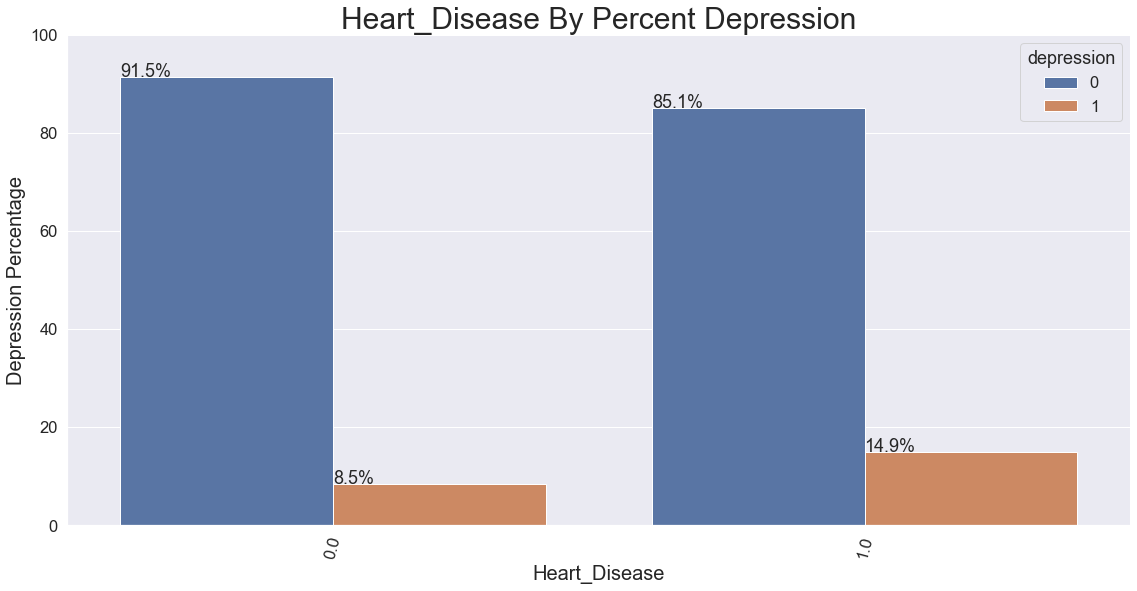

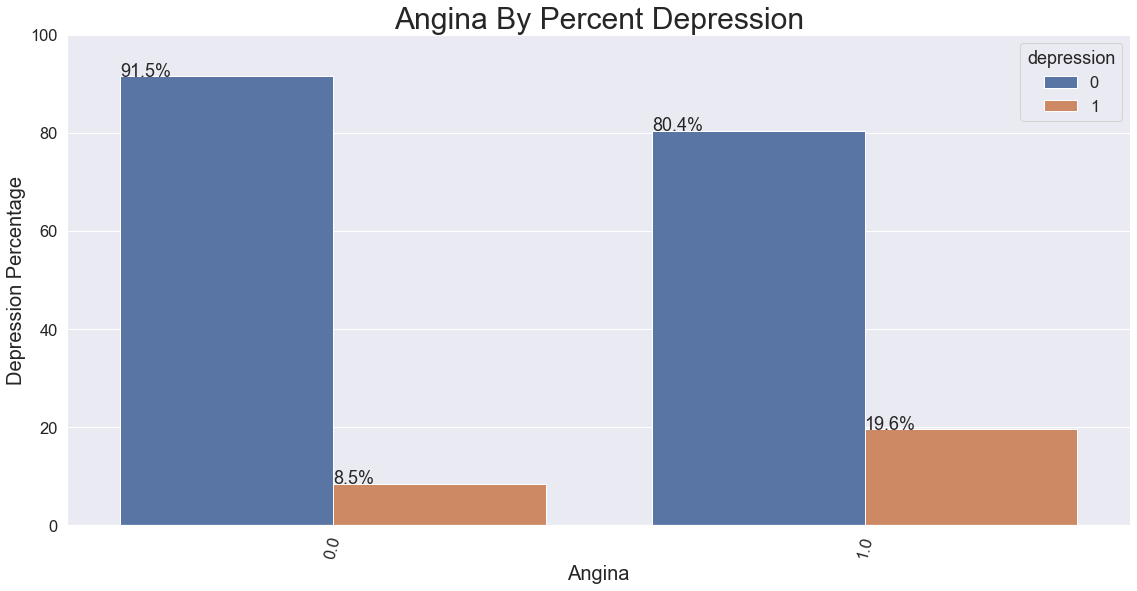

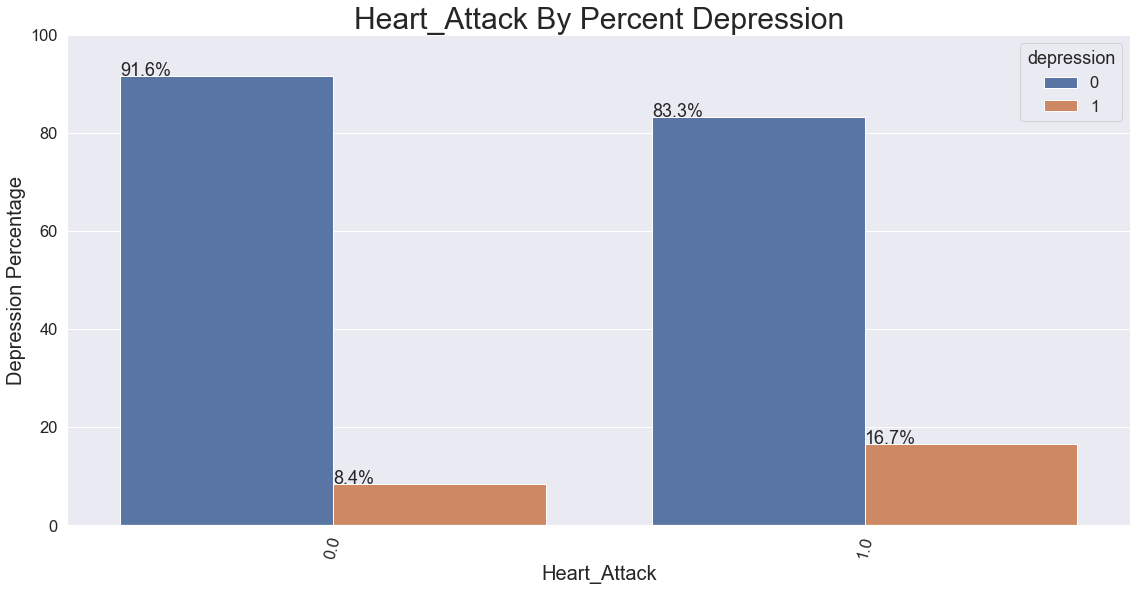

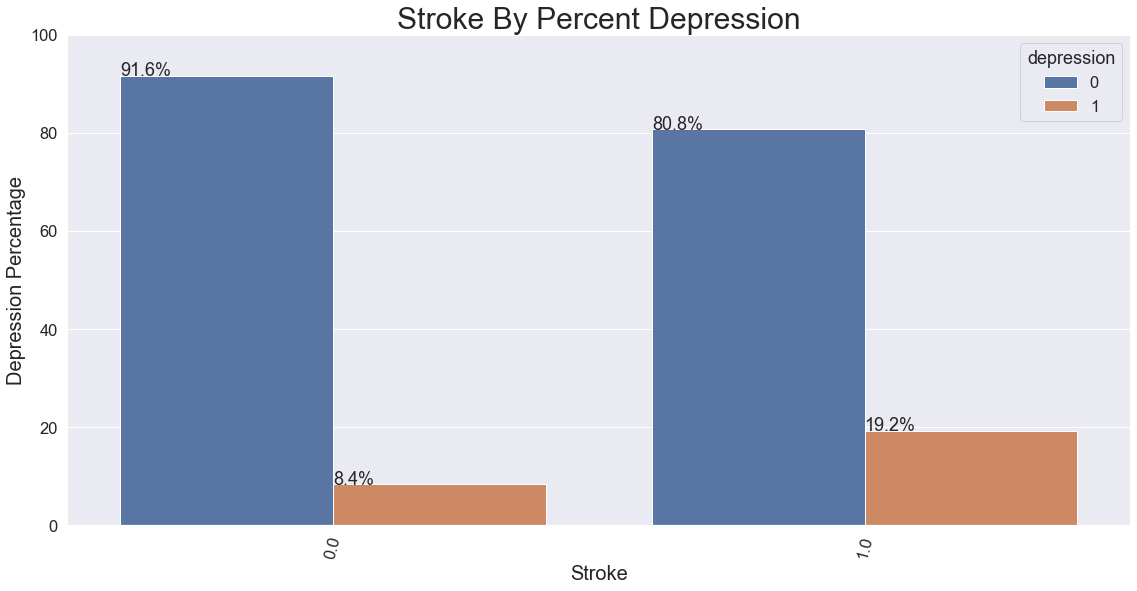

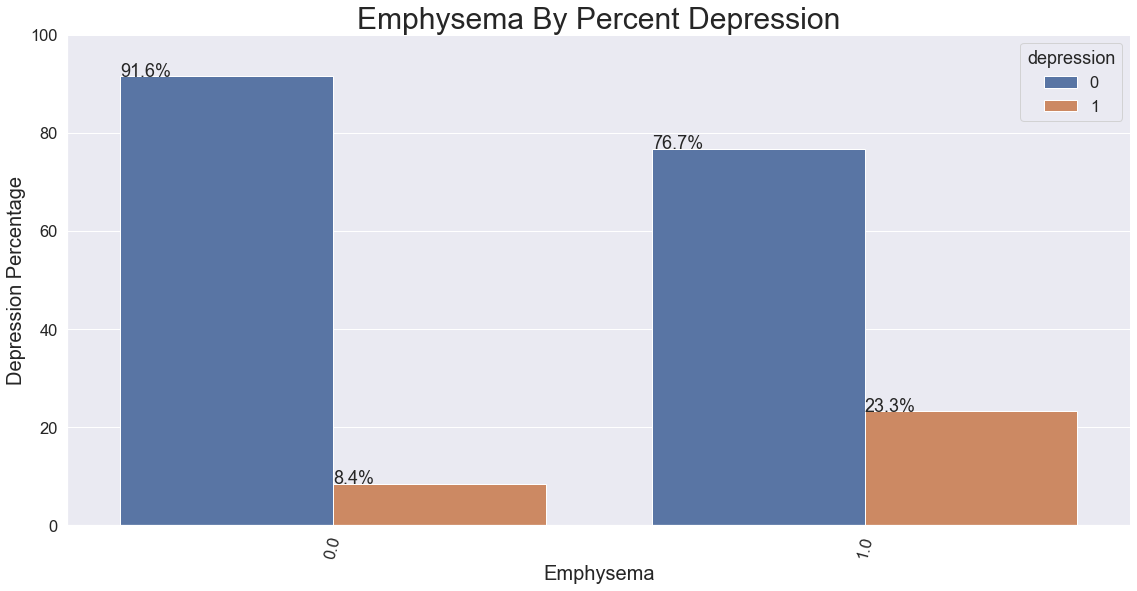

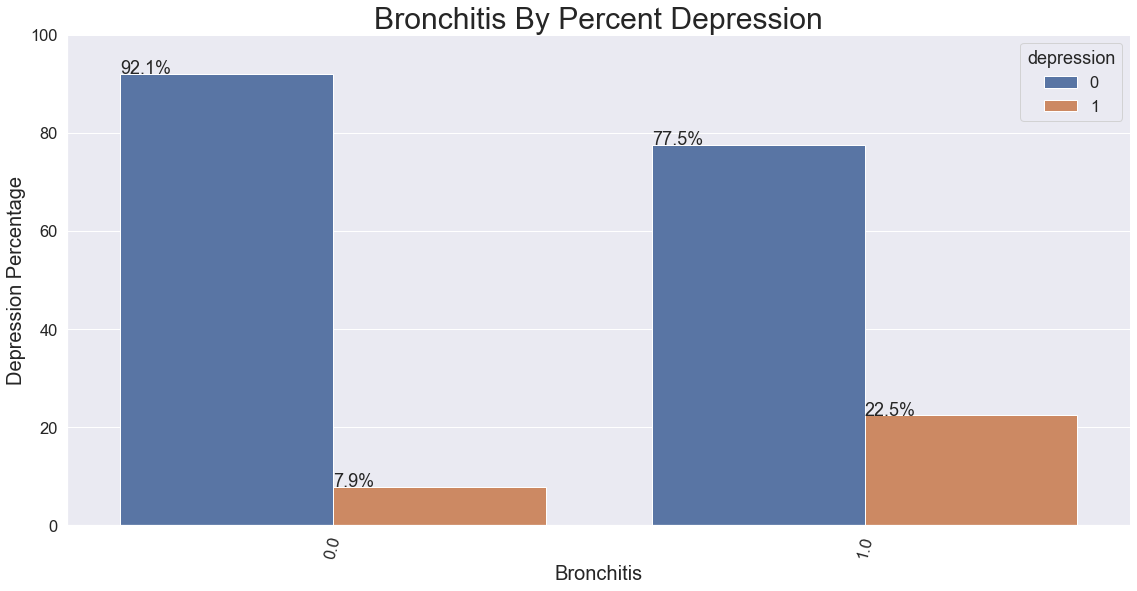

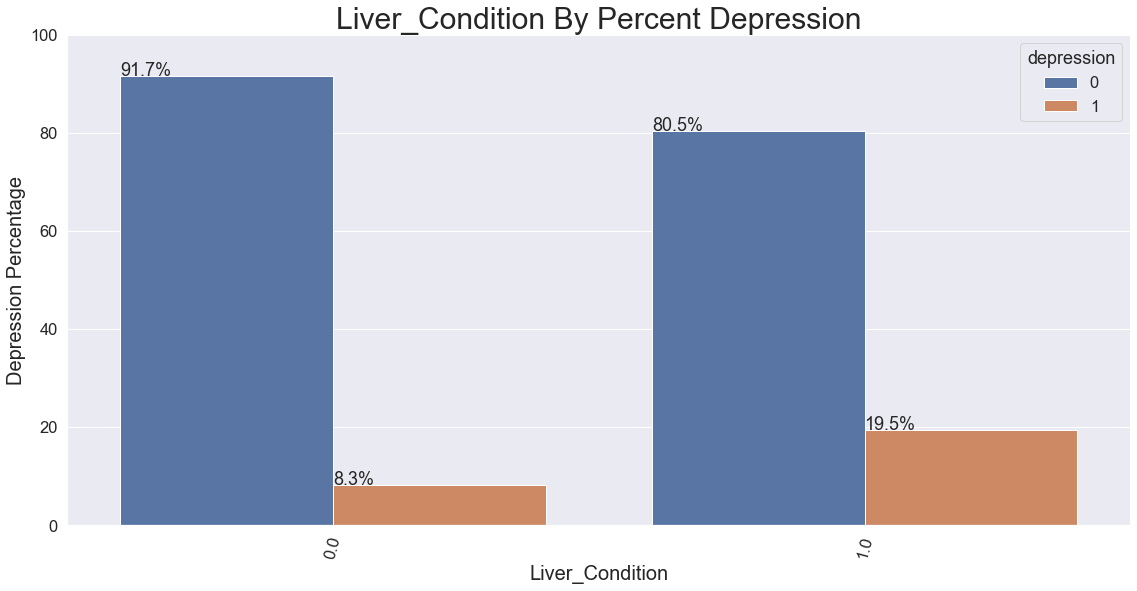

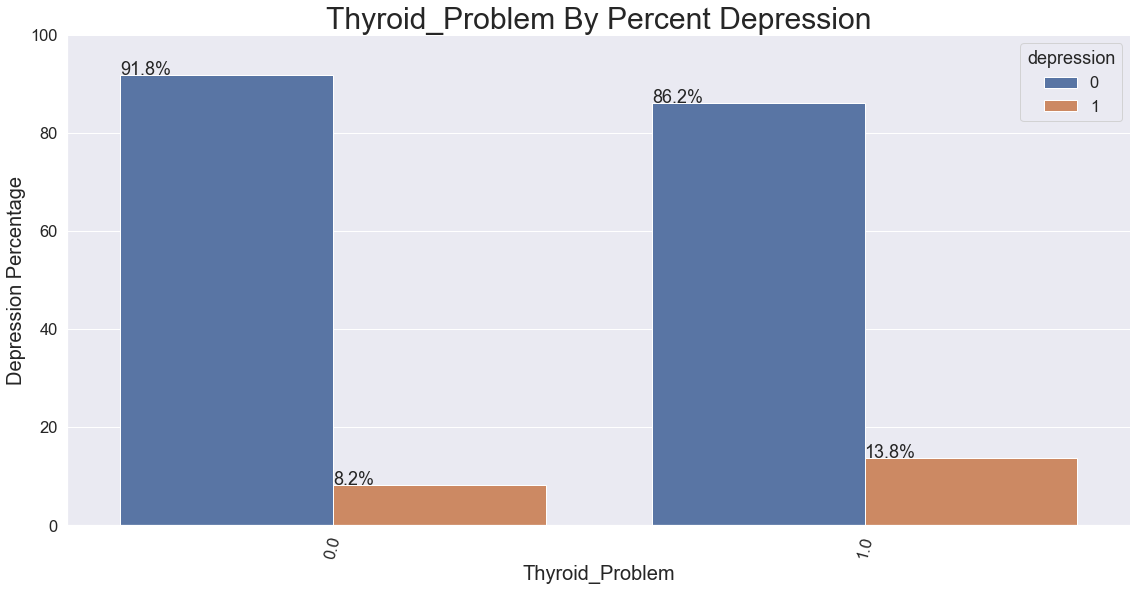

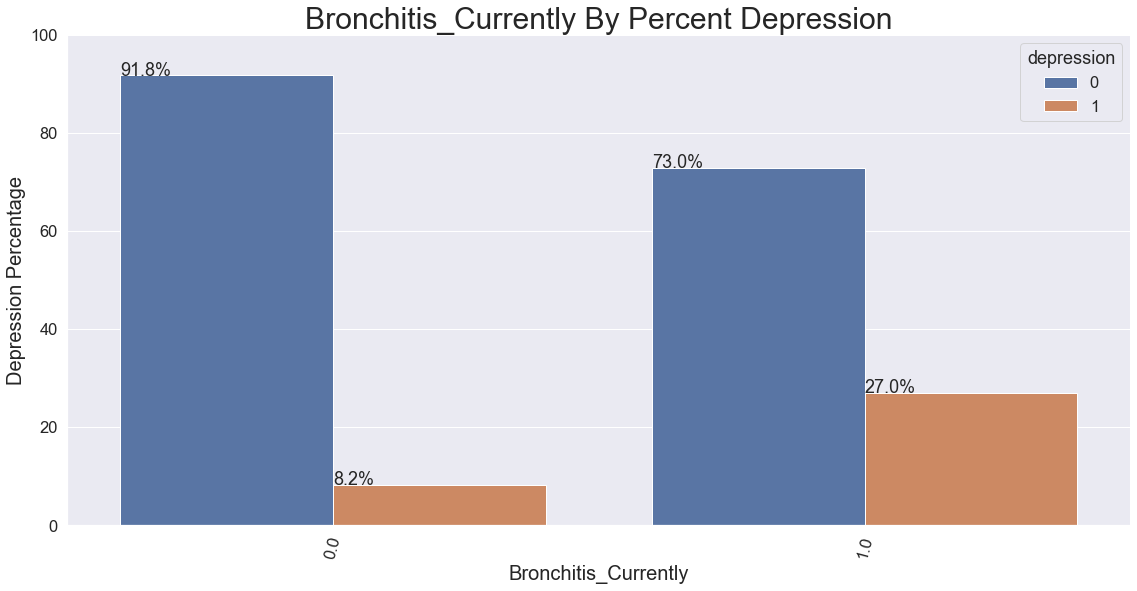

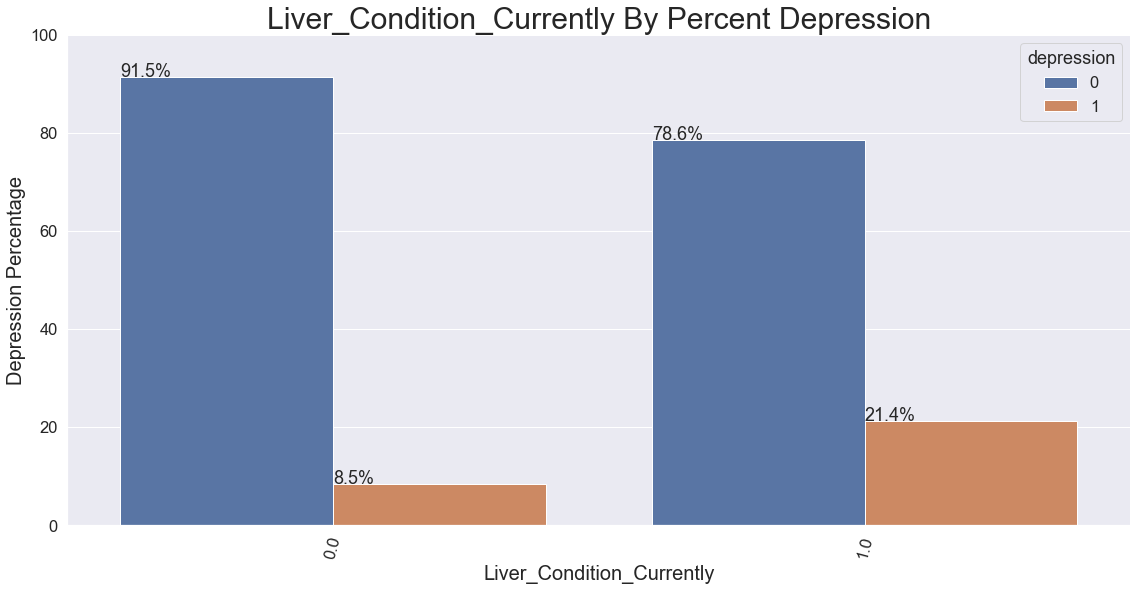

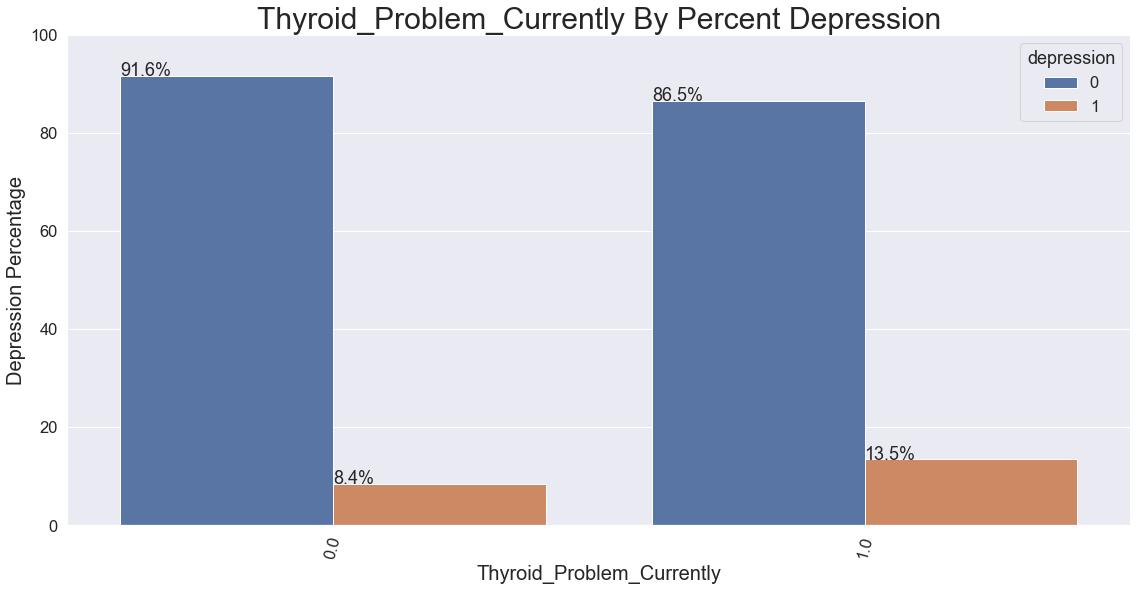

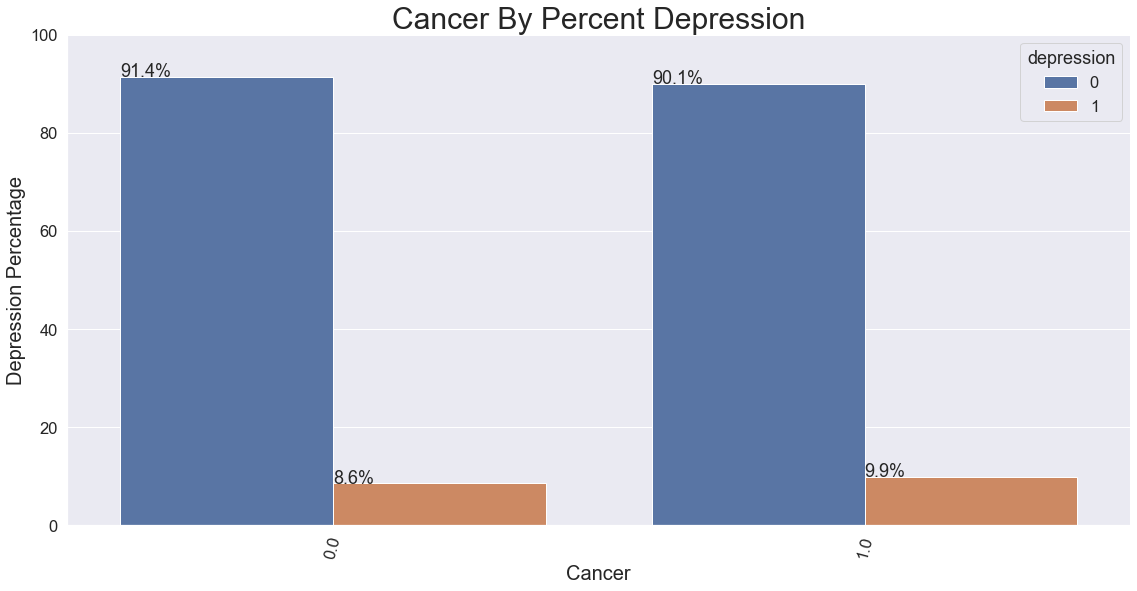

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


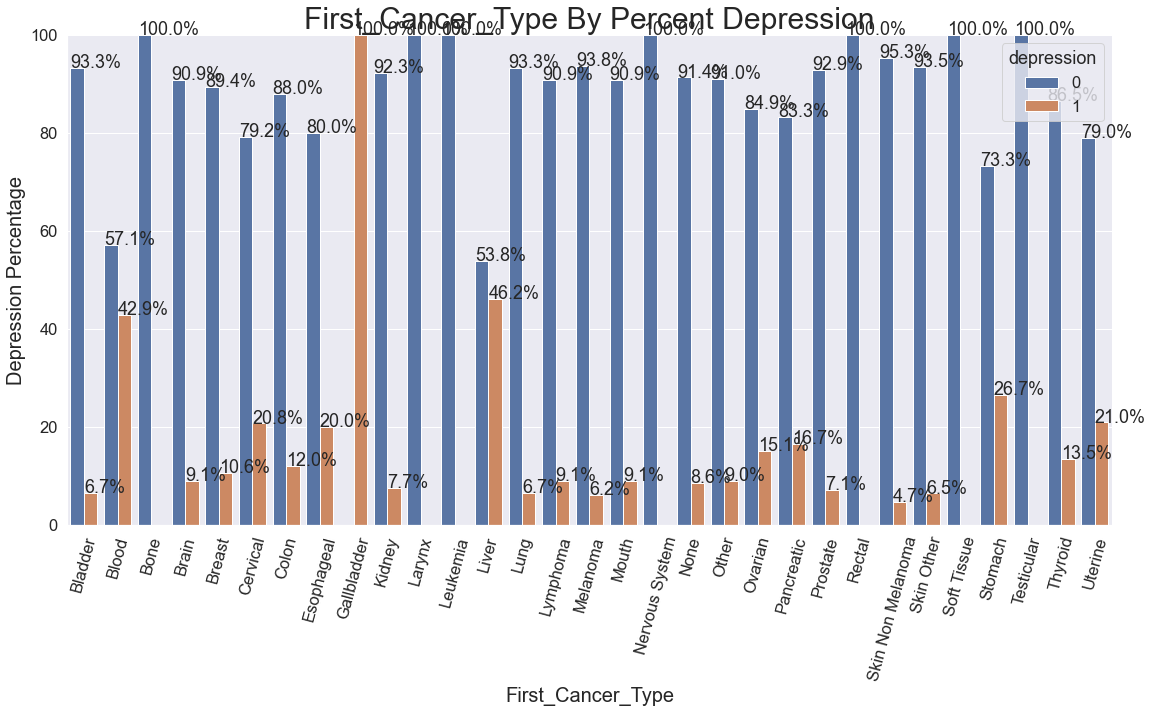

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


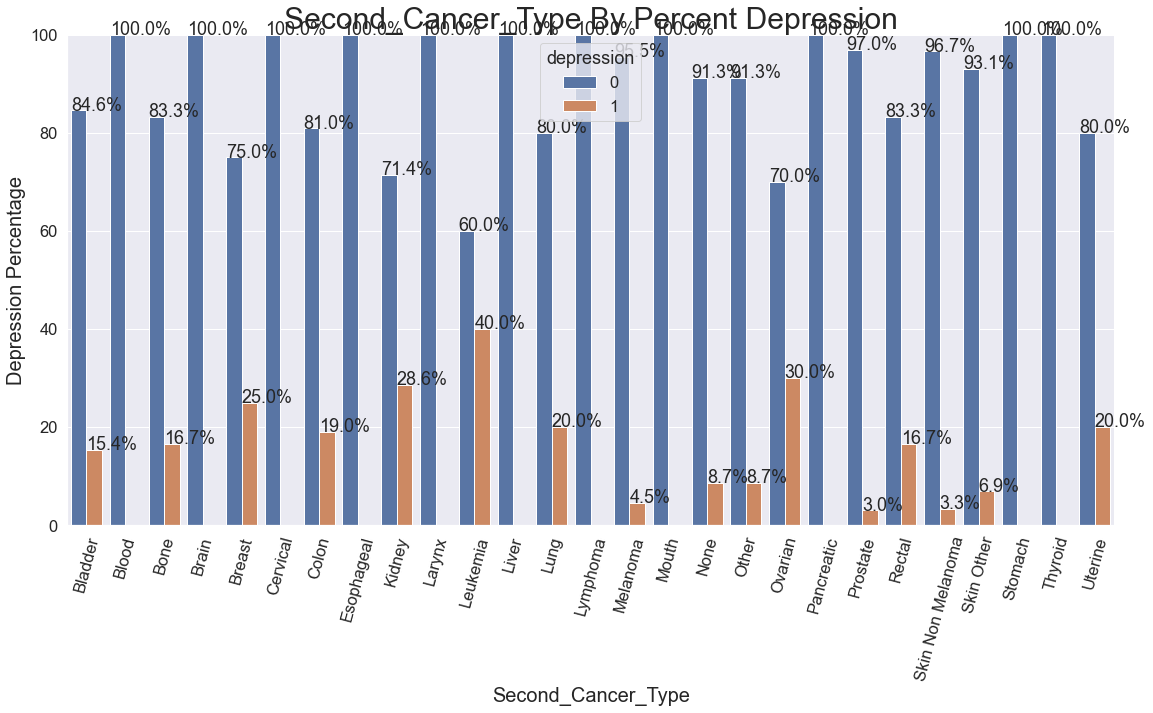

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


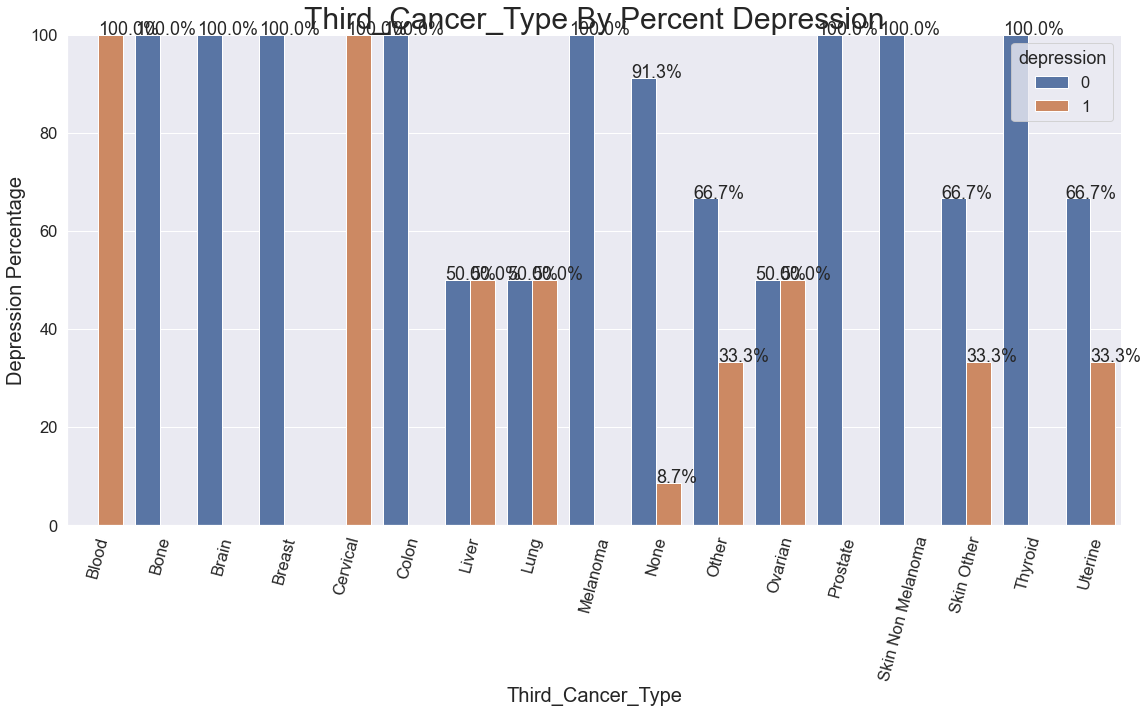

posx and posy should be finite values
posx and posy should be finite values


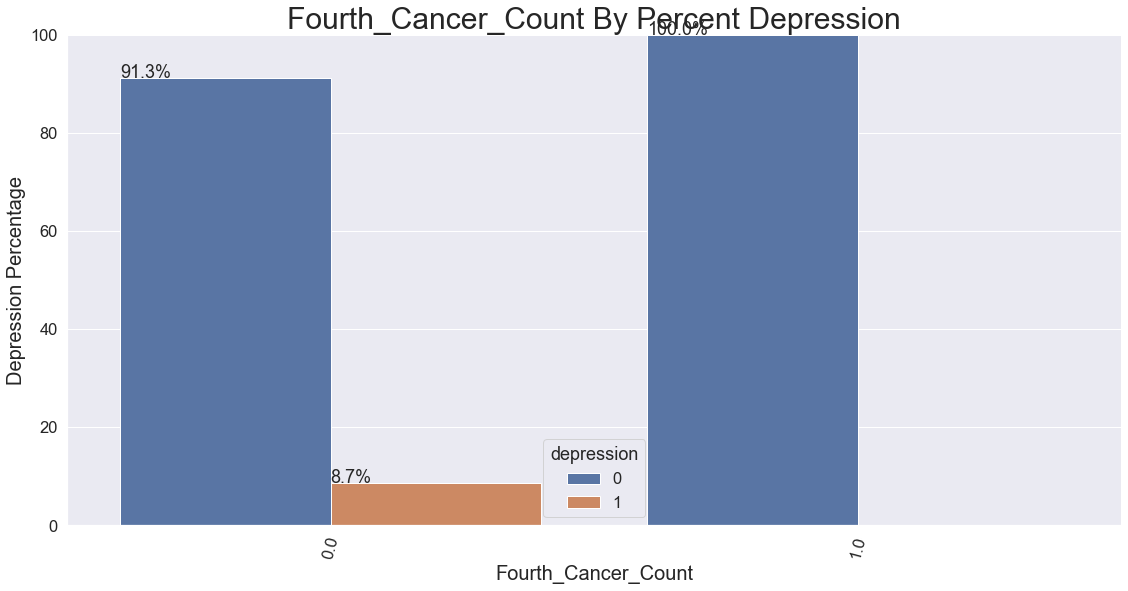

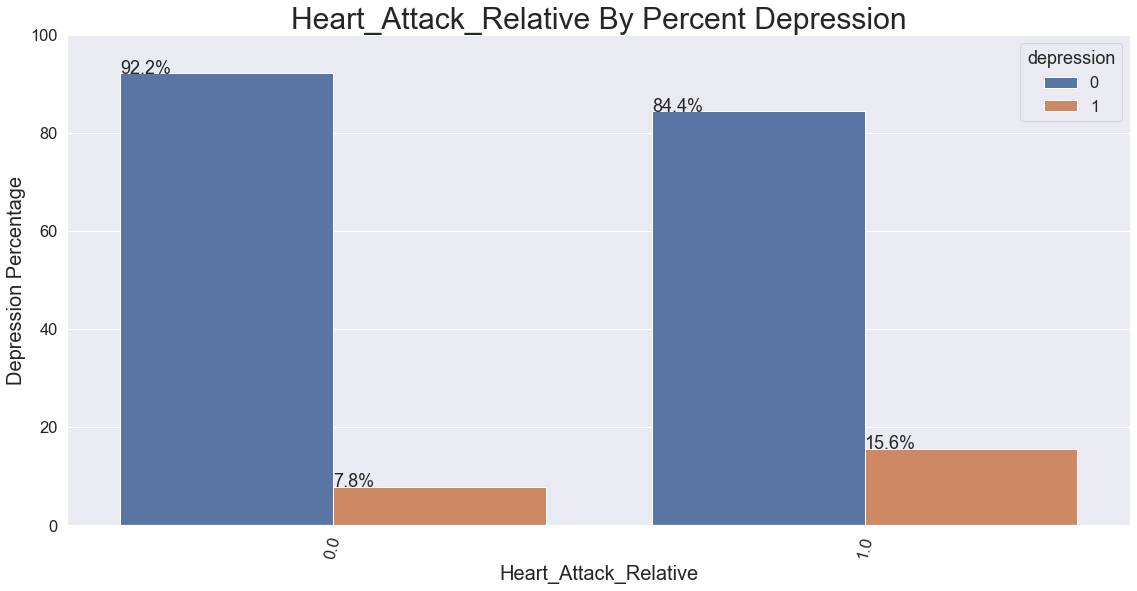

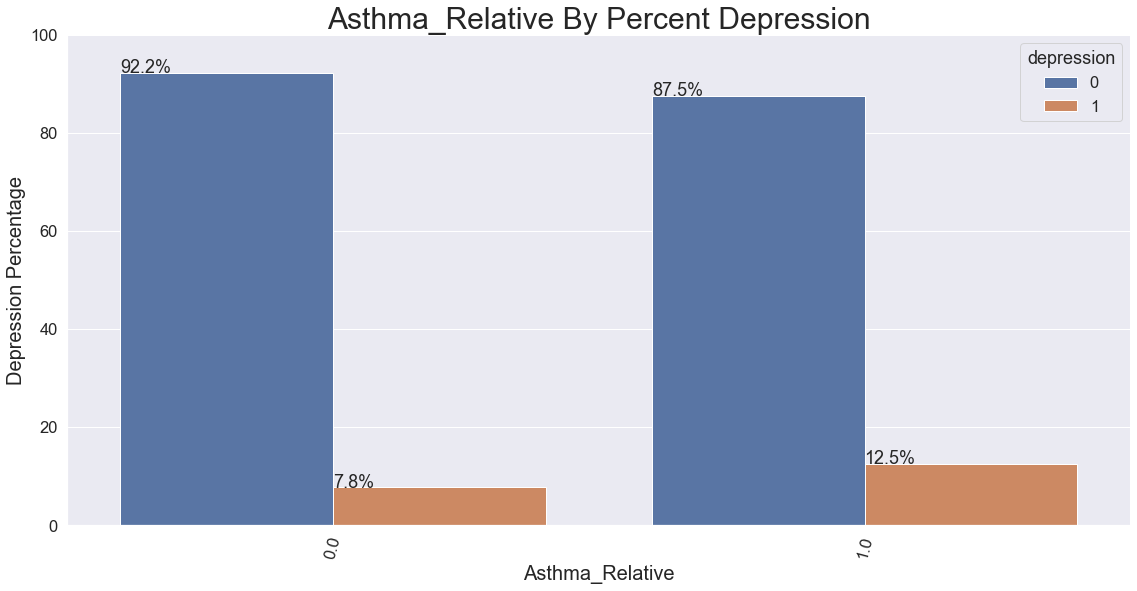

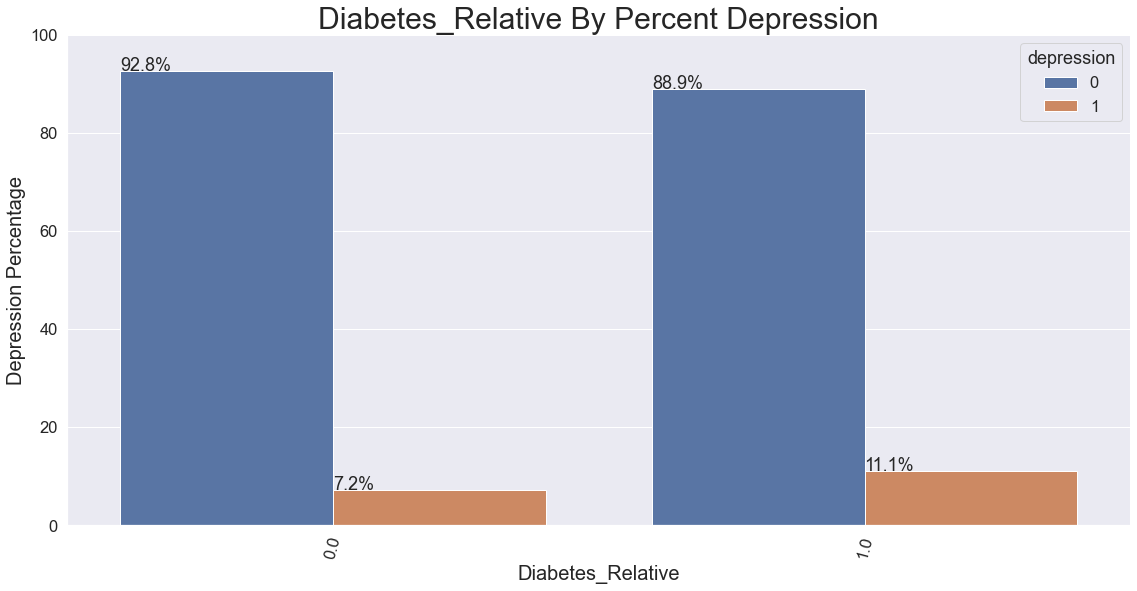

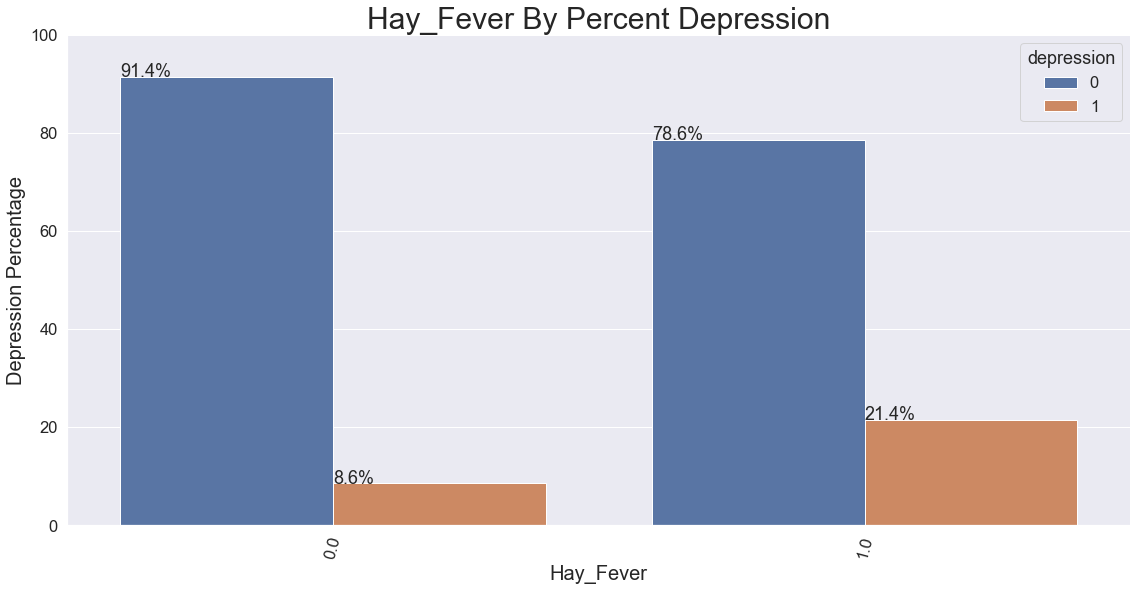

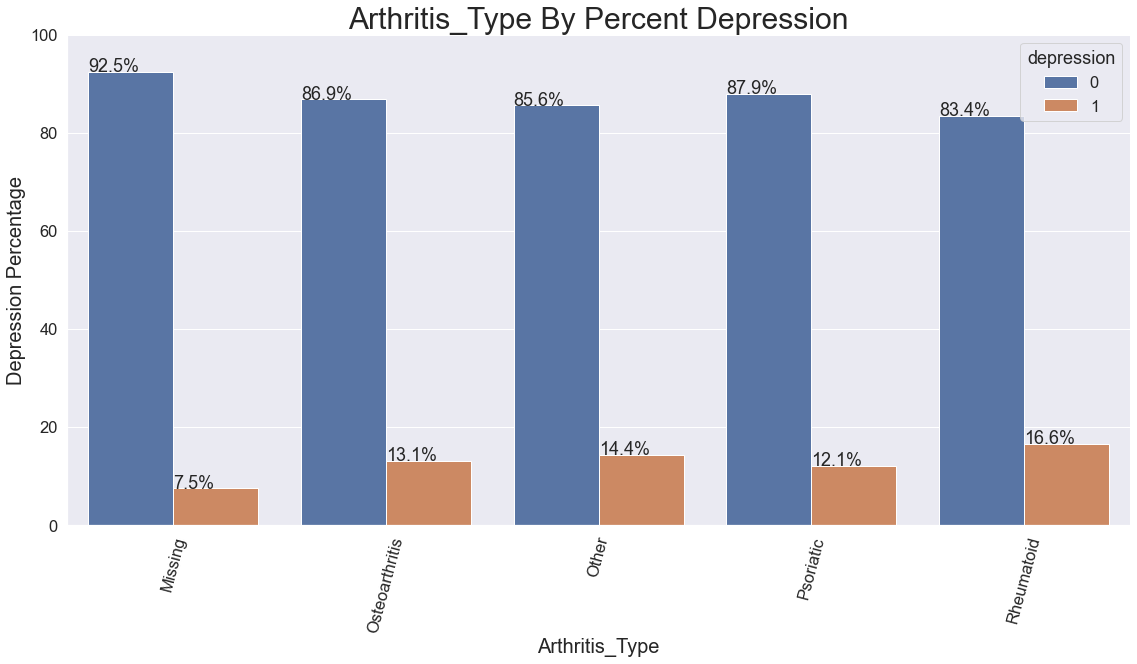

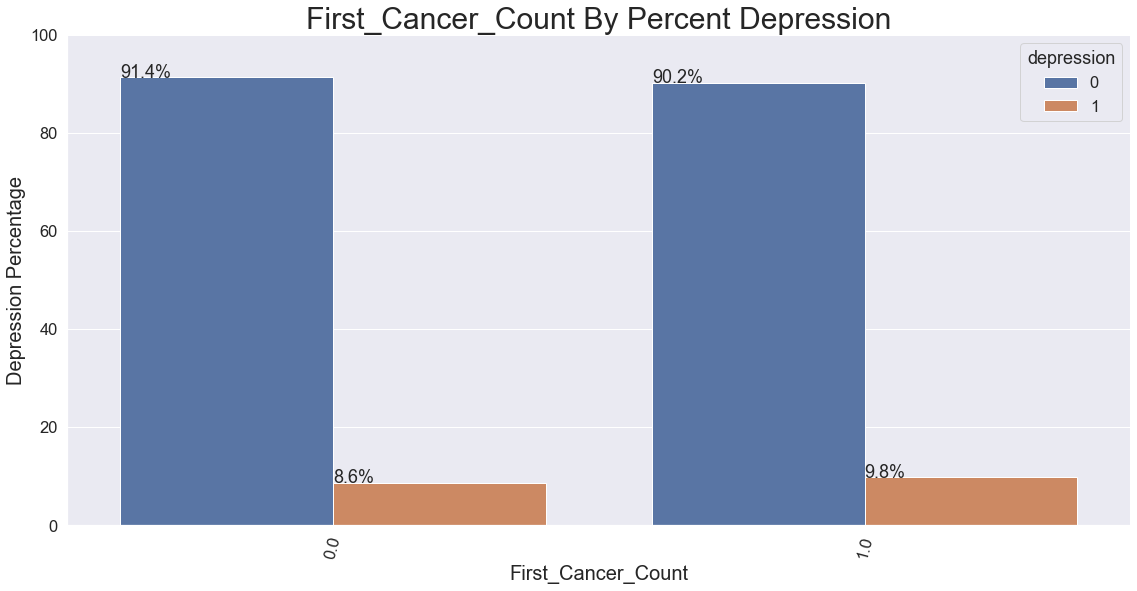

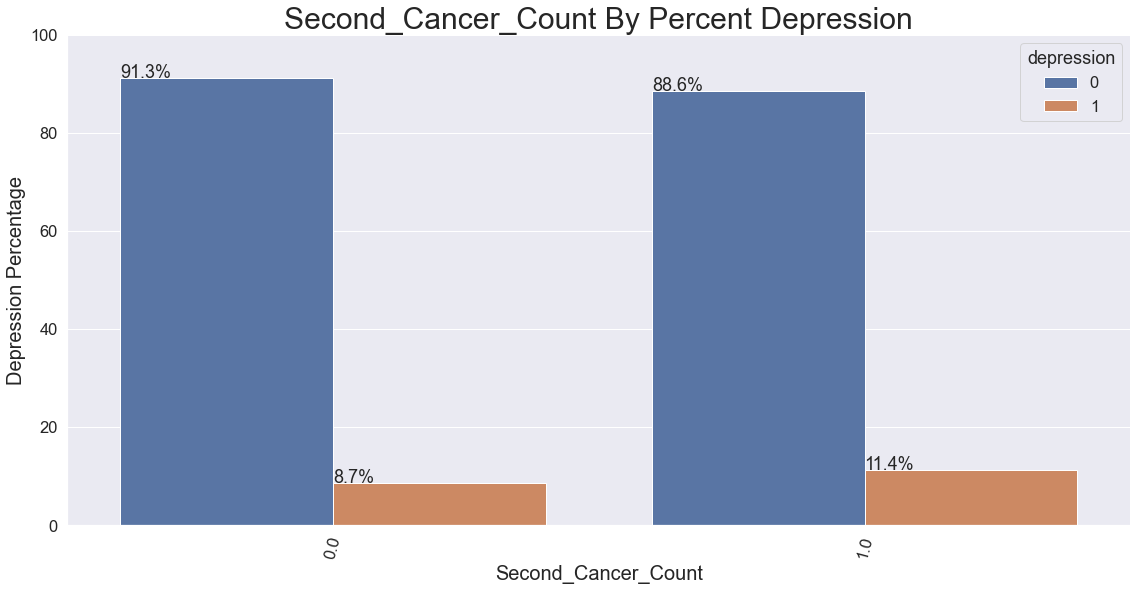

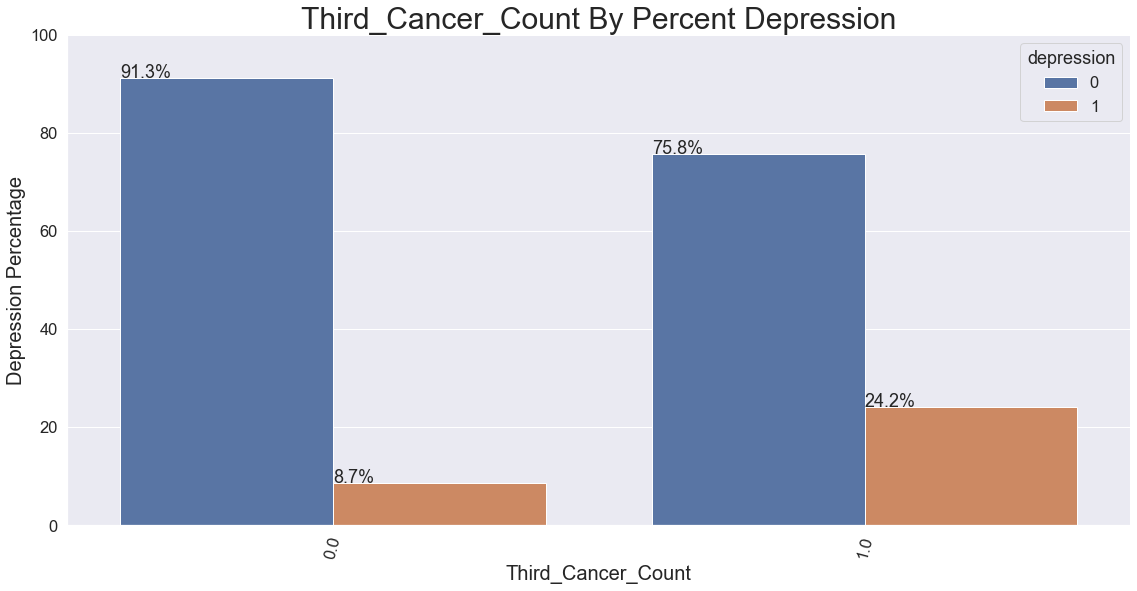

In [39]:
# Plotting the columns
for col in medcond_cat_cols:
    plotting_percentages(train_df, col)

## Sleeping History

(<Figure size 1152x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Trouble_Sleeping_History By Count Depression'}, xlabel='Trouble_Sleeping_History', ylabel='Depression Count'>)

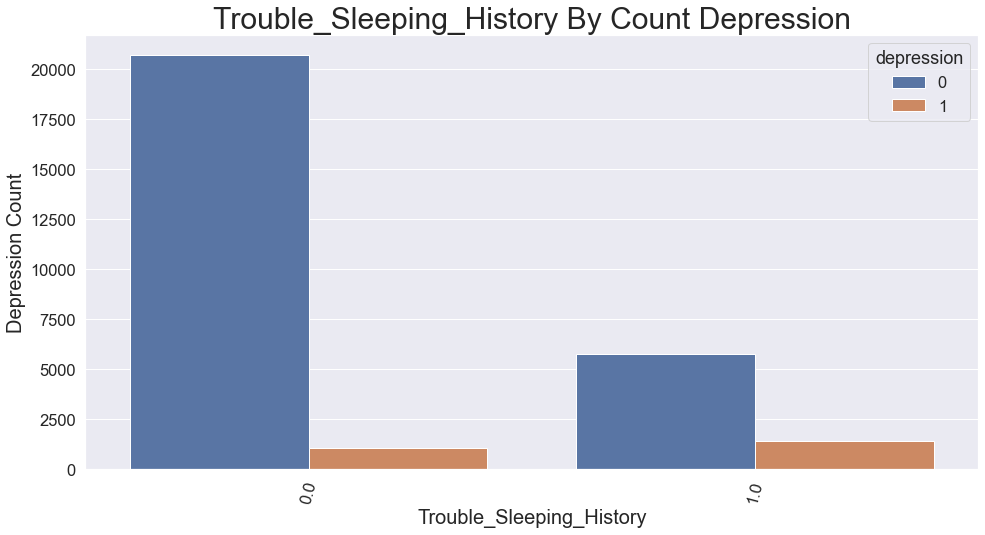

In [40]:
# Plotting the column
plotting_counts(train_df, 'trouble_sleeping_history')

## Sleeping time 

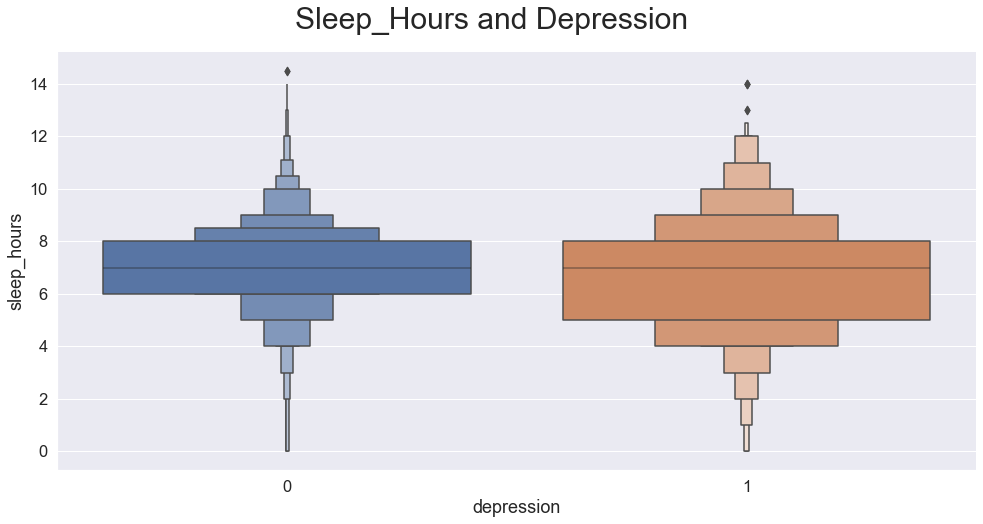

In [41]:
# Plotting the column
plot_num_cols(train_df, 'sleep_hours')

## Blood Count

In [42]:
# Listing the columns
count_num_cols = ['white_BCC', 'lymphocyte_percent', 'monocyte_percent',
       'neutrophils_percent', 'eosinophils_percent', 'basophils_percent',
       'lymphocyte_count', 'monocyte_count', 'neutrophils_count',
       'eosinophils_count', 'basophils_count', 'RBC_count', 'hemoglobin',
       'hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW', 'platelet_count', 'MPV']

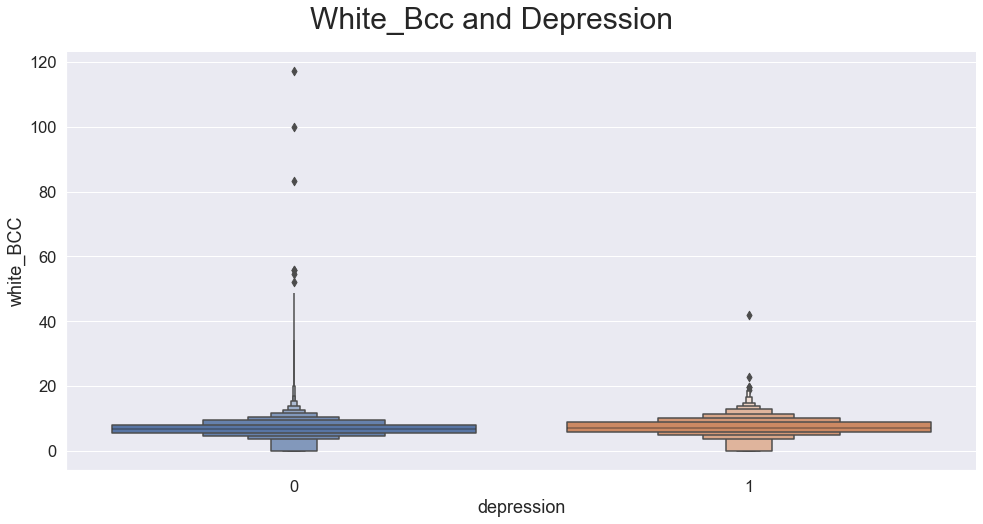

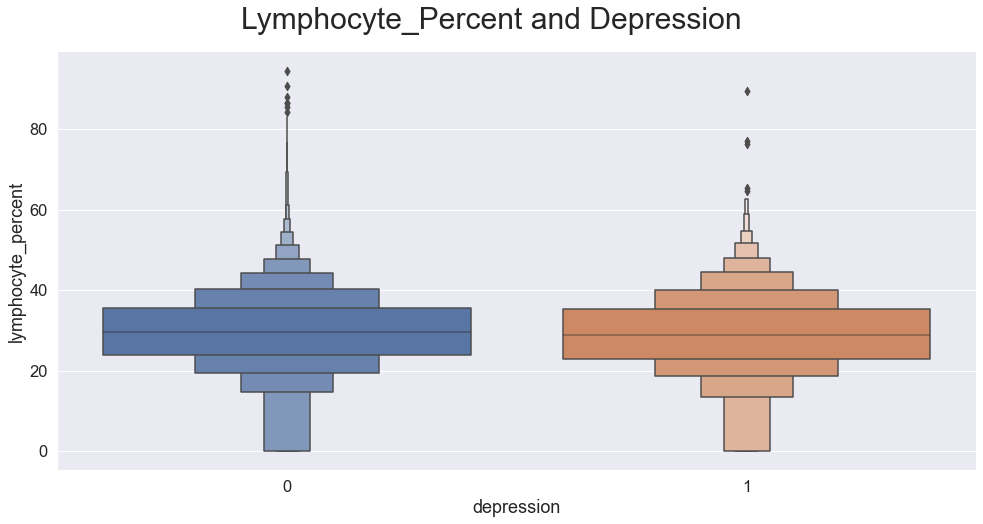

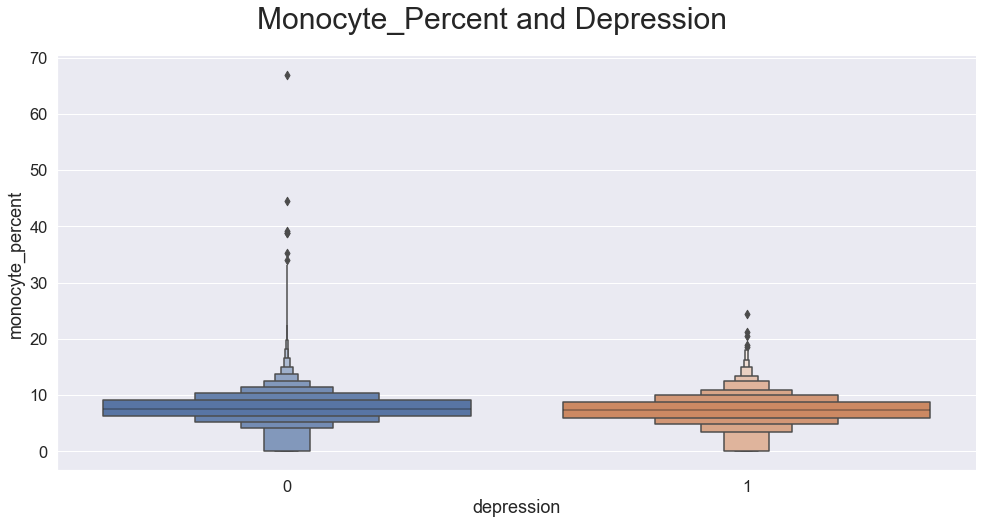

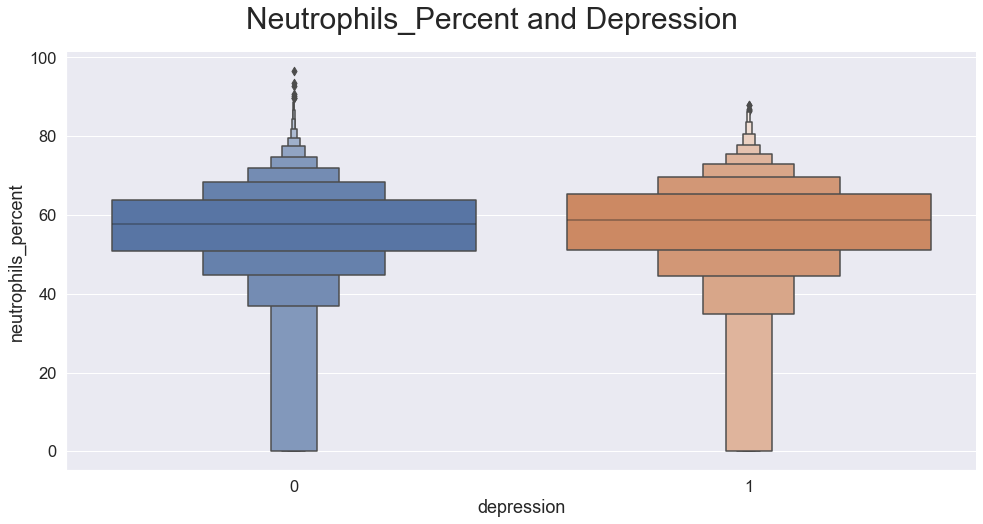

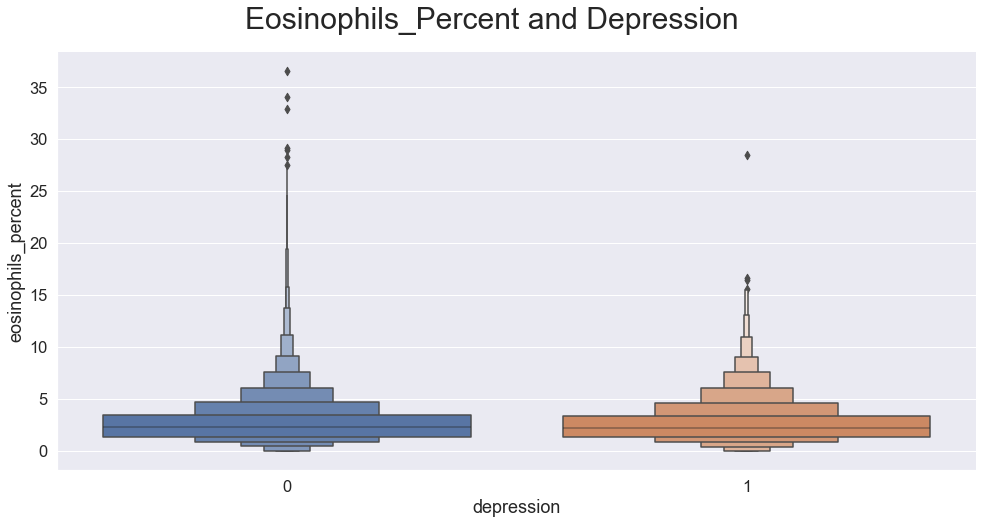

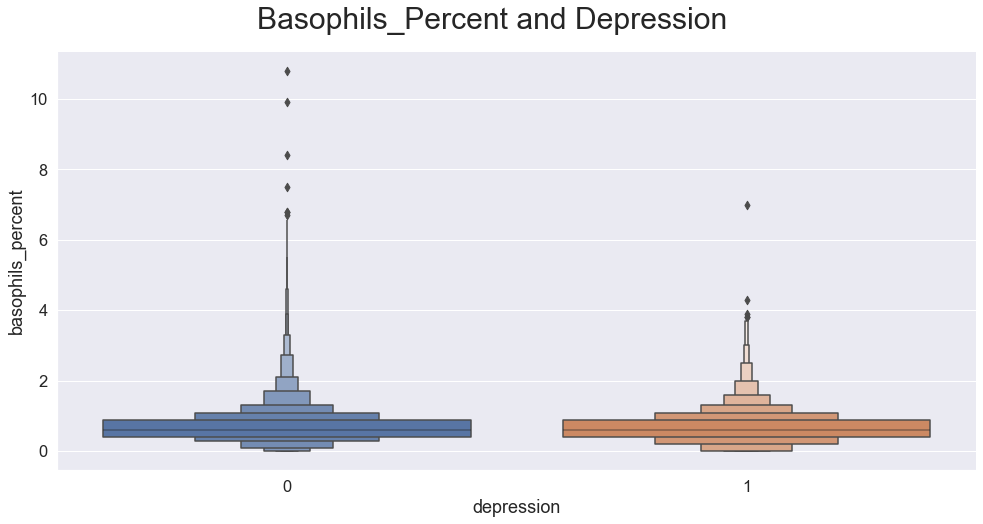

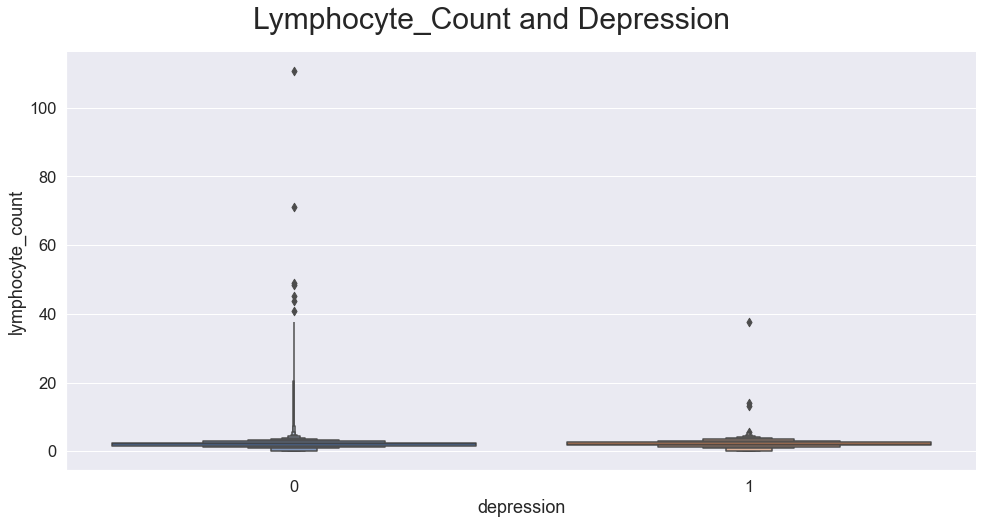

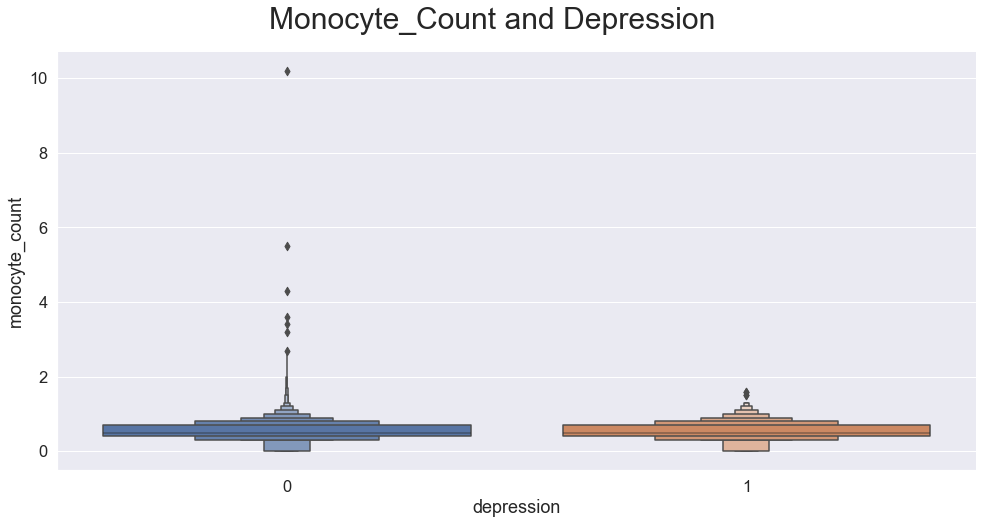

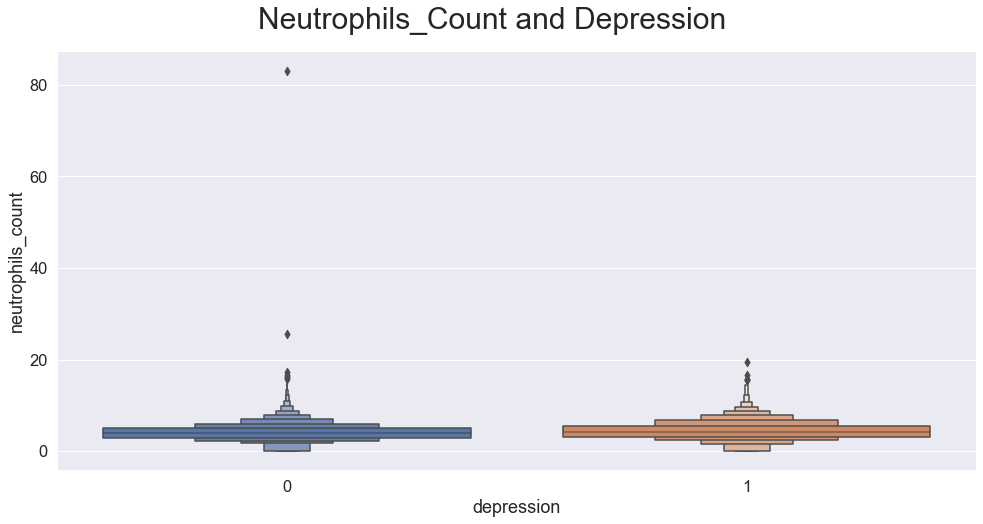

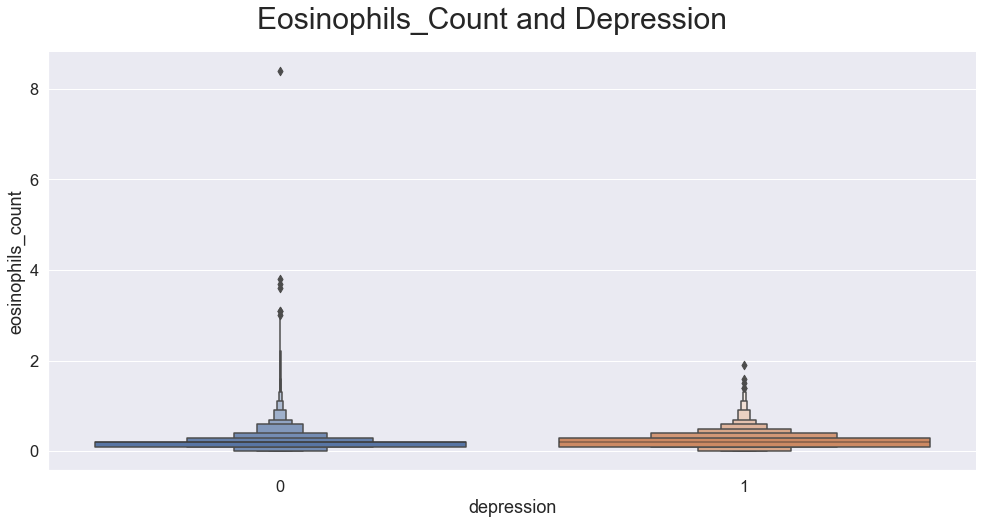

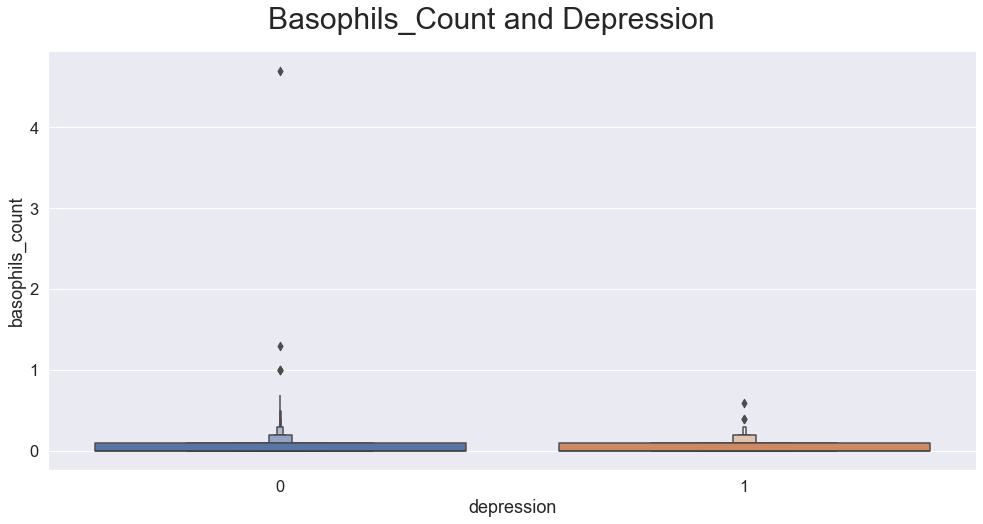

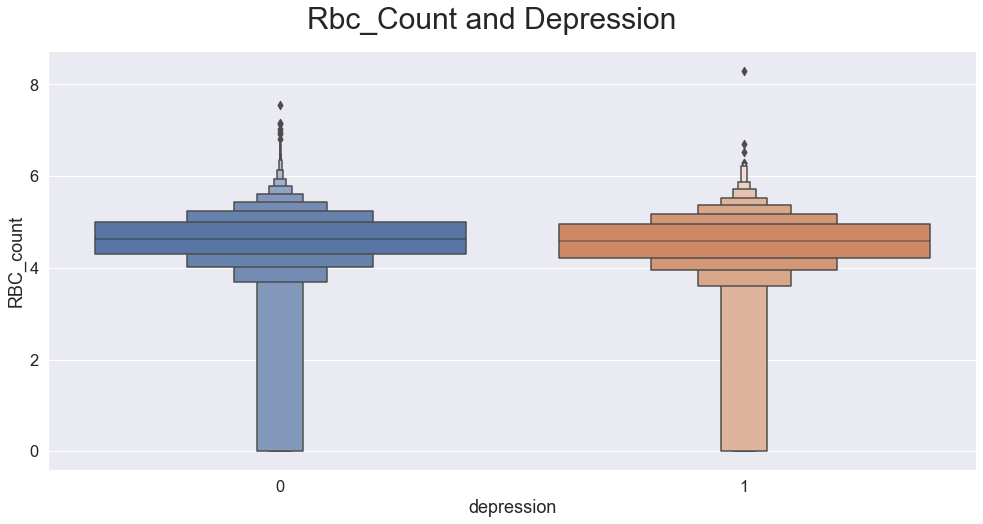

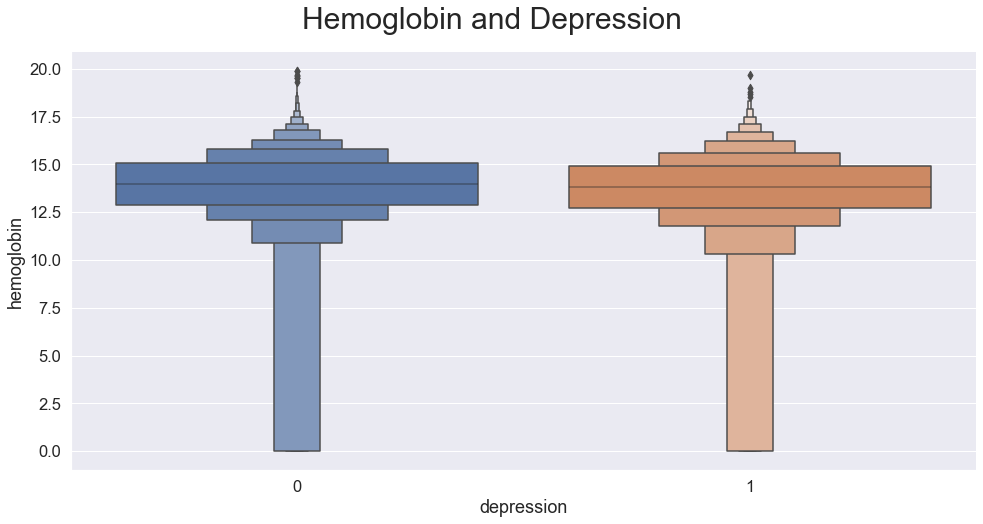

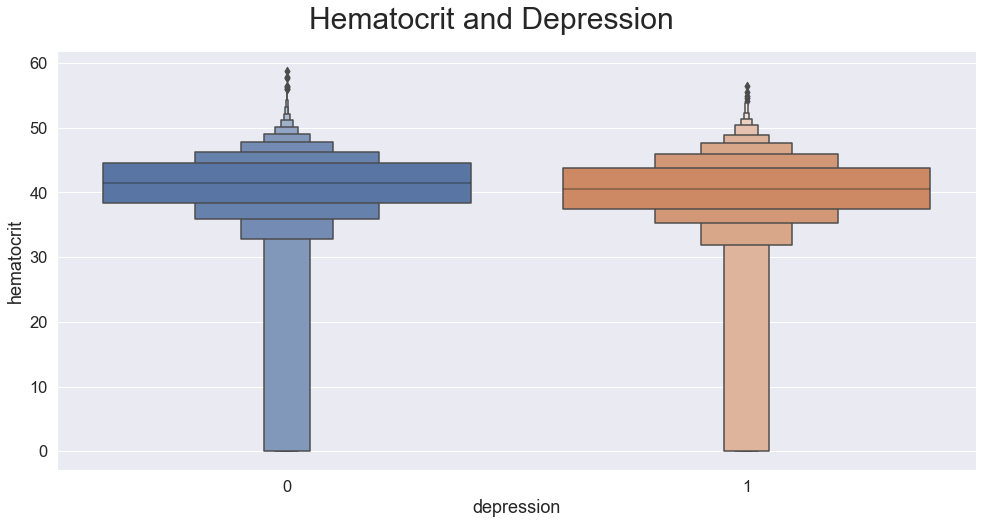

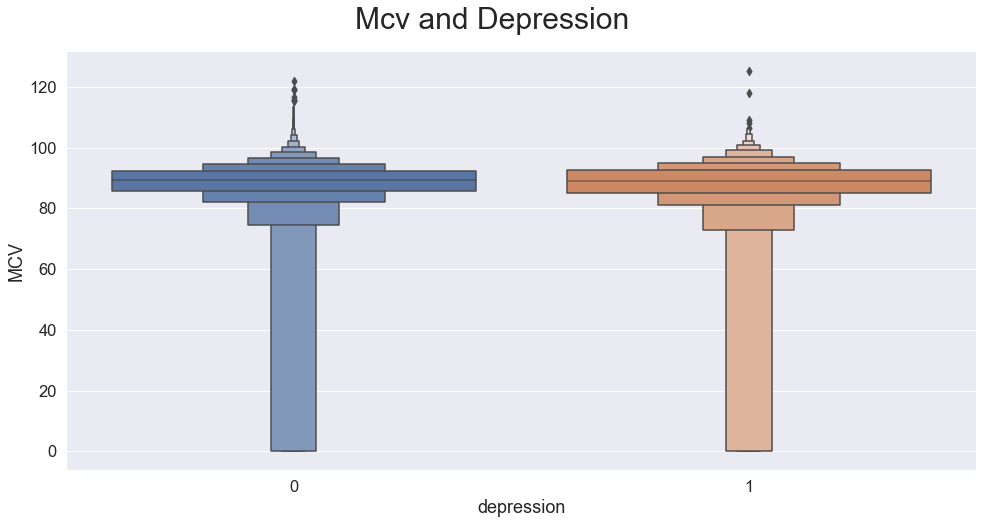

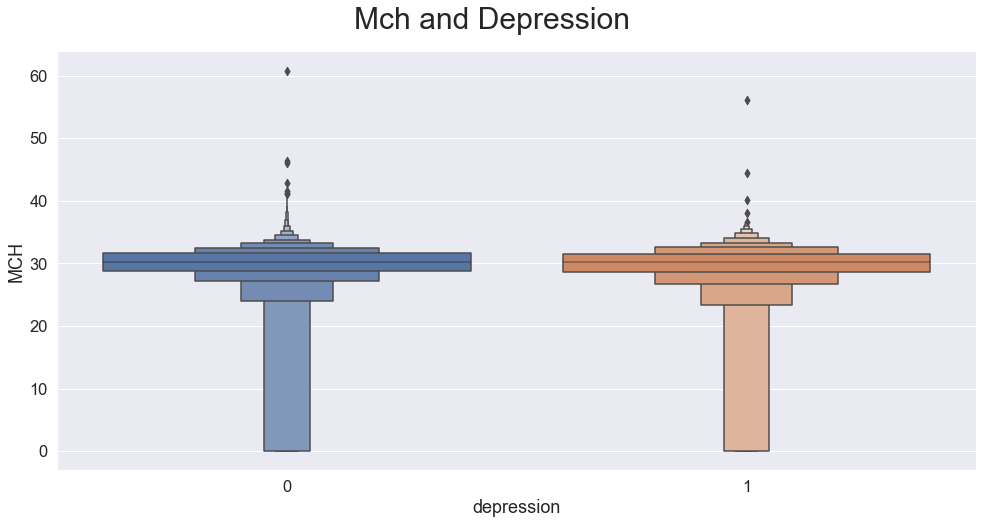

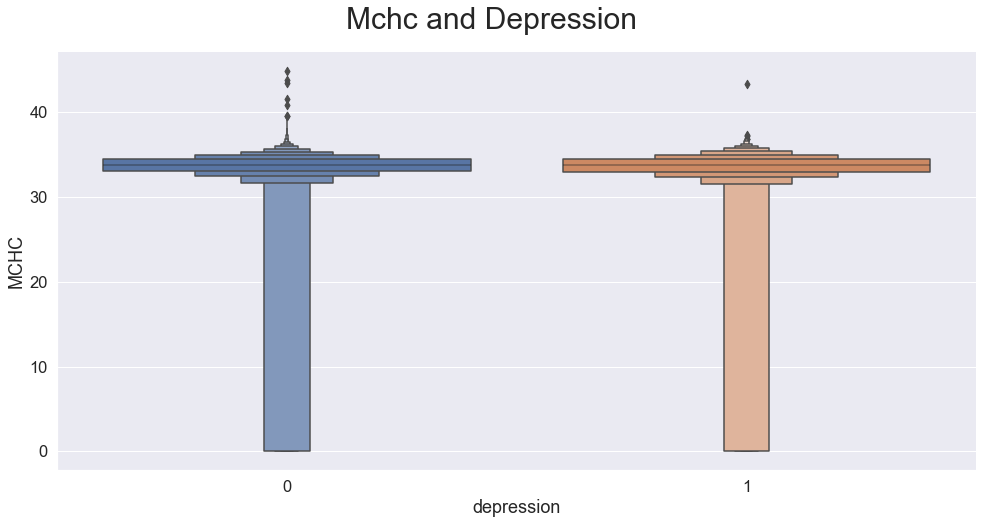

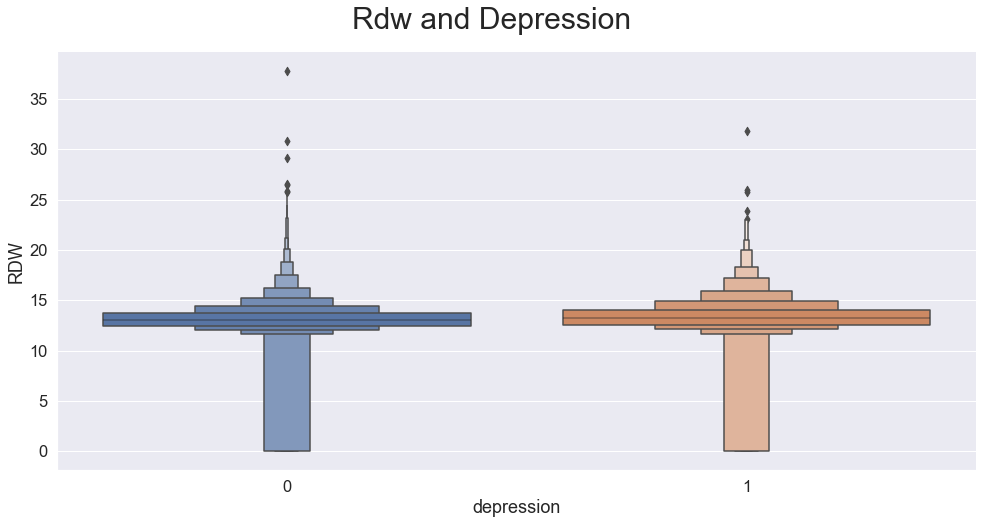

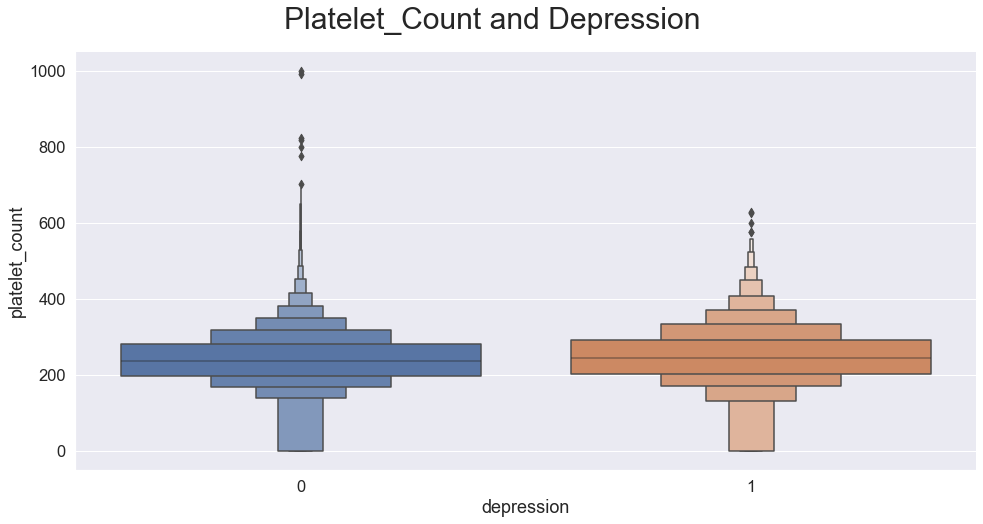

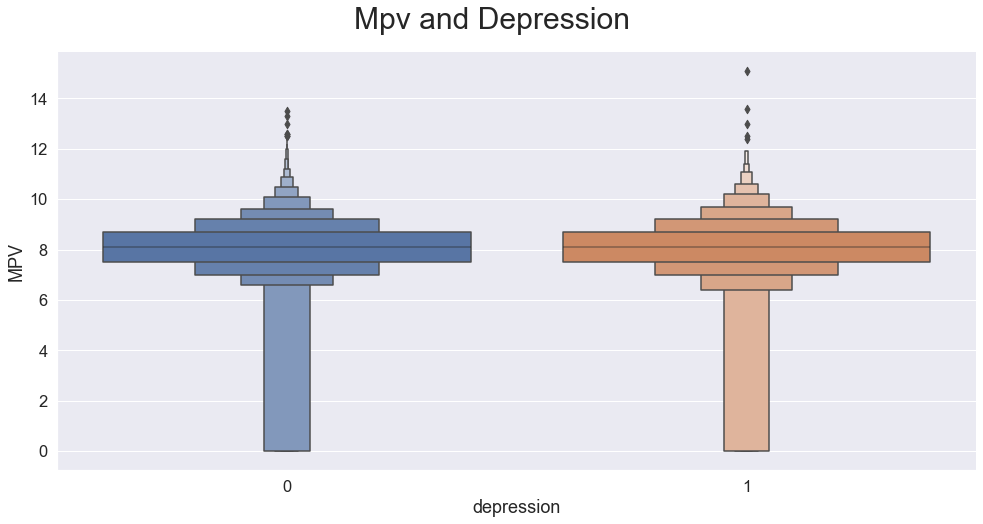

In [43]:
# Plotting the columns
for col in count_num_cols:
    plot_num_cols(train_df, col)

# Modeling Preparation

## One Hot Encode

In [44]:
# Create an encoder object
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [45]:
# Selecting the columns to be one hot encoded
ohe_cols = X_train.select_dtypes('O').columns
ohe_cols

Index(['race', 'citizenship', 'marital_status', 'pregnant', 'birth_place',
       'veteran', 'first_cancer_type', 'second_cancer_type',
       'third_cancer_type', 'arthritis_type', 'full_time_work', 'work_type',
       'out_of_work', 'vigorous_recreation', 'moderate_recreation',
       'lifetime_alcohol_consumption'],
      dtype='object')

In [46]:
# One hot encoding the categorical columns of the dataframes
ohe_train = encoder.fit_transform(X_train[ohe_cols])
ohe_test = encoder.transform(X_test[ohe_cols])

In [47]:
# Getting the new names of the columns
col_names = encoder.get_feature_names(ohe_cols)

In [48]:
# Turning the encoded columns into dataframes
ohe_train_df = pd.DataFrame(ohe_train, columns=col_names, index=X_train.index)
ohe_test_df = pd.DataFrame(ohe_test, columns=col_names, index=X_test.index)

In [49]:
# Checking the new dataframe
ohe_train_df.head()

race_Black  race_Mexican  ...  lifetime_alcohol_consumption_No  lifetime_alcohol_consumption_Yes
SEQN                              ...                                                                   
100642       1.000         0.000  ...                            0.000                             1.000
92702        0.000         0.000  ...                            0.000                             0.000
70969        0.000         1.000  ...                            0.000                             0.000
34989        0.000         0.000  ...                            0.000                             0.000
97327        1.000         0.000  ...                            0.000                             1.000

[5 rows x 132 columns]

In [50]:
# Checking the new dataframe
ohe_test_df.head()

race_Black  race_Mexican  ...  lifetime_alcohol_consumption_No  lifetime_alcohol_consumption_Yes
SEQN                             ...                                                                   
44567       0.000         1.000  ...                            0.000                             0.000
77872       0.000         1.000  ...                            1.000                             0.000
60256       1.000         0.000  ...                            0.000                             0.000
65775       1.000         0.000  ...                            1.000                             0.000
58659       0.000         0.000  ...                            0.000                             0.000

[5 rows x 132 columns]

In [51]:
# Listing the nummerical columns
scale_cols = X_train.select_dtypes('number').columns
list(scale_cols)

['gender',
 'age',
 'education_level',
 'household_size',
 'household_income',
 'asthma',
 'asthma_onset',
 'asthma_currently',
 'asthma_emergency',
 'anemia',
 'ever_overweight',
 'blood_transfusion',
 'arthritis',
 'heart_failure',
 'heart_disease',
 'angina',
 'heart_attack',
 'stroke',
 'emphysema',
 'bronchitis',
 'liver_condition',
 'thyroid_problem',
 'bronchitis_currently',
 'liver_condition_currently',
 'thyroid_problem_currently',
 'cancer',
 'fourth_cancer_count',
 'heart_attack_relative',
 'asthma_relative',
 'diabetes_relative',
 'hay_fever',
 'arthritis_onset',
 'heart_failure_onset',
 'heart_disease_onset',
 'angina_onset',
 'heart_attack_onset',
 'stroke_onset',
 'emphysema_onset',
 'bronchitis_onset',
 'liver_condition_onset',
 'thyroid_problem_onset',
 'cancer_onset',
 'first_cancer_count',
 'second_cancer_count',
 'third_cancer_count',
 'weight',
 'height',
 'BMI',
 'pulse',
 'irregular_pulse',
 'systolic',
 'diastolic',
 'total_cholesterol',
 'HDL',
 'triglyceride',

In [52]:
# Initiating the transformer
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(random_state=123)

In [53]:
# Fitting the transformer
trans_train = transformer.fit_transform(X_train[scale_cols])
trans_test = transformer.transform(X_test[scale_cols])

In [54]:
# Turning the scaled data into dataframes
trans_train_df = pd.DataFrame(trans_train, columns=X_train[scale_cols].columns,
                             index=X_train.index)
trans_test_df = pd.DataFrame(trans_test, columns=X_train[scale_cols].columns,
                             index=X_test.index)

In [55]:
# Checking out the dataframe
trans_train_df.head()

gender   age  education_level  ...  Rx_days_MINOCYCLINE  Rx_METHOCARBAMOL  Rx_days_METHOCARBAMOL
SEQN                                   ...                                                              
100642   0.000 0.783            1.000  ...                0.000             0.000                  0.000
92702    0.000 0.479            0.645  ...                0.000             0.000                  0.000
70969    0.000 0.464            0.396  ...                0.000             0.000                  0.000
34989    0.000 0.045            0.000  ...                0.000             0.000                  0.000
97327    0.000 0.916            1.000  ...                0.000             1.000                  0.999

[5 rows x 474 columns]

In [56]:
# Checking out the dataframe
trans_test_df.head()

gender   age  education_level  ...  Rx_days_MINOCYCLINE  Rx_METHOCARBAMOL  Rx_days_METHOCARBAMOL
SEQN                                  ...                                                              
44567   1.000 0.245            0.221  ...                0.000             0.000                  0.000
77872   1.000 0.416            0.107  ...                0.000             0.000                  0.000
60256   0.000 0.464            0.645  ...                0.000             0.000                  0.000
65775   1.000 0.525            0.396  ...                0.000             0.000                  0.000
58659   0.000 0.229            0.221  ...                0.000             0.000                  0.000

[5 rows x 474 columns]

In [57]:
# Combining the one hot encoded and scaled data back together
X_train_tf = pd.concat([ohe_train_df, trans_train_df], axis=1)
X_test_tf = pd.concat([ohe_test_df, trans_test_df], axis=1)

In [58]:
# Checking out the dataframe
X_train_tf.head()

race_Black  race_Mexican  race_Other Hispanic  ...  Rx_days_MINOCYCLINE  Rx_METHOCARBAMOL  Rx_days_METHOCARBAMOL
SEQN                                                   ...                                                              
100642       1.000         0.000                0.000  ...                0.000             0.000                  0.000
92702        0.000         0.000                0.000  ...                0.000             0.000                  0.000
70969        0.000         1.000                0.000  ...                0.000             0.000                  0.000
34989        0.000         0.000                1.000  ...                0.000             0.000                  0.000
97327        1.000         0.000                0.000  ...                0.000             1.000                  0.999

[5 rows x 606 columns]

In [59]:
# Checking out the dataframe
X_test_tf.head()

race_Black  race_Mexican  race_Other Hispanic  ...  Rx_days_MINOCYCLINE  Rx_METHOCARBAMOL  Rx_days_METHOCARBAMOL
SEQN                                                  ...                                                              
44567       0.000         1.000                0.000  ...                0.000             0.000                  0.000
77872       0.000         1.000                0.000  ...                0.000             0.000                  0.000
60256       1.000         0.000                0.000  ...                0.000             0.000                  0.000
65775       1.000         0.000                0.000  ...                0.000             0.000                  0.000
58659       0.000         0.000                0.000  ...                0.000             0.000                  0.000

[5 rows x 606 columns]

## KMeans Clustering

In [60]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Initiating a range of clusters to try
k_range = range(2,16)

# Creating empty lists to store results
cal_har_score= []
inertia = []
sil_score = []

# Fitting a KMeans model to the data with a cluster size for each number
for k in k_range:
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(X_train_tf)

#   Creating predictions, calculating the different scores, and appending to 
#    the lists
    preds = pd.Series(model.predict(X_train_tf))
    cal_har_score.append(metrics.calinski_harabasz_score(X_train_tf,preds))
    sil_score.append(metrics.silhouette_score(X_train_tf, preds, 
                                              random_state=123))
    inertia.append(model.inertia_)


In [63]:
# Fitting 5 clusters onto the training data
k_clusters = 6
k_model = KMeans(k_clusters, random_state=123)
k_model.fit(X_train_tf)

# Creating predictions for the training data
kmeans_train_preds = k_model.predict(X_train_tf)
kmeans_train = pd.Series(kmeans_train_preds, index=X_train_tf.index, 
                         name='Cluster')

# Creating predictions for the test data
kmeans_test_preds = k_model.predict(X_test_tf)
kmeans_test = pd.Series(kmeans_test_preds, index=X_test_tf.index, 
                        name='Cluster')

In [72]:
# Combining the clusters with the rest of the data
X_train_final = pd.concat([X_train_tf, kmeans_train], axis=1)
X_test_final = pd.concat([X_test_tf, kmeans_test], axis=1)

In [73]:
from sklearn.metrics import fbeta_score, make_scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

In [74]:
# Fitting a dummy classifier
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='stratified', random_state=123)
dummy_clf.fit(X_train_final, y_train)

DummyClassifier(random_state=123, strategy='stratified')

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Dummy Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.91      0.92      0.92      6618
    depressed       0.10      0.09      0.10       634

     accuracy                           0.84      7252
    macro avg       0.51      0.51      0.51      7252
 weighted avg       0.84      0.84      0.84      7252

__________________________________________________________________


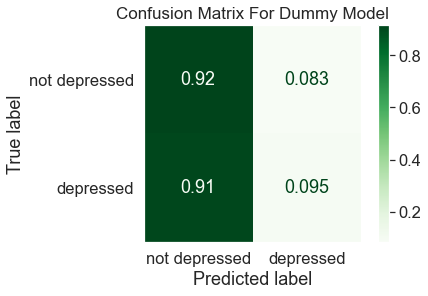

__________________________________________________________________


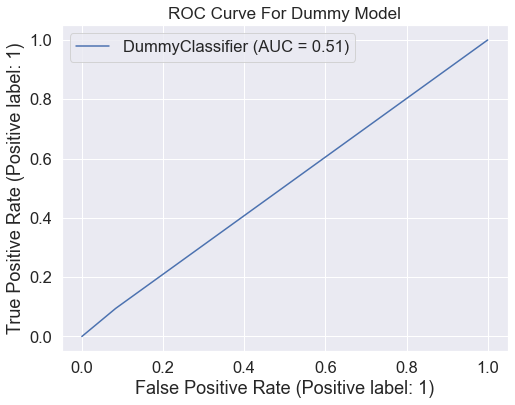

In [75]:
# Evaluating the model
evaluate_model(dummy_clf, X_train_final, X_test_final, y_test, 
               title='Dummy Model')

## Random Forest

In [76]:
#Base Model
from sklearn.ensemble import RandomForestClassifier

In [77]:
# Creating classifier
forest_clf = RandomForestClassifier(n_jobs=-1, random_state=123, 
                                     class_weight='balanced')

# Fitting to the training data
forest_base = forest_clf.fit(X_train_final, y_train)

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Base Random Forest
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.92      1.00      0.96      6618
    depressed       0.74      0.04      0.07       634

     accuracy                           0.91      7252
    macro avg       0.83      0.52      0.51      7252
 weighted avg       0.90      0.91      0.88      7252

__________________________________________________________________


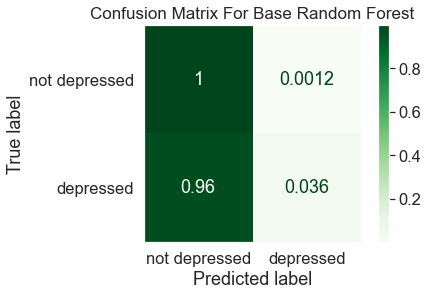

__________________________________________________________________


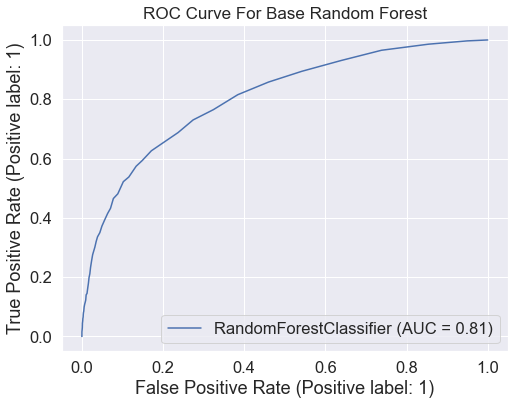

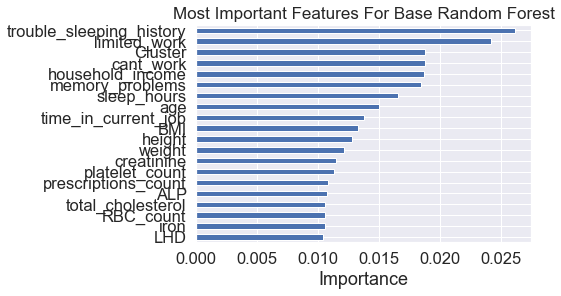

In [78]:
evaluate_model(forest_base, X_train_final, X_test_final, y_test, 
               tree=True, title='Base Random Forest')

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV

# Listing parameters to test
forest_params = {'criterion': ['gini', 'entropy'], 
                 'max_depth': [None, 5, 10, 20, 50], 
                 'min_samples_leaf': [1, 10, 20], 
                 'max_features': ['auto', None], 
                 'class_weight': ['balanced', 'balanced_subsample'], 
                 'max_samples': [None, .5, .7, .9]}

# Creating the classifier
forest_clf = RandomForestClassifier(random_state=123)

# Feeding the parameters into the grid for testing
grid = GridSearchCV(forest_clf, forest_params, scoring=f2_scorer, 
                    n_jobs=-1, cv=3)

# Fitting to the training data
forest_grid = grid.fit(X_train_final, y_train)

In [ ]:
forest_grid.best_params_

In [ ]:
# Listing parameters to test
forest_params = {'max_depth': [10, 15], 
                 'min_samples_leaf': [15, 20, 25, 30], 
                 'max_samples': [None, .3, .95]}

# Creating the classifier
forest_clf = RandomForestClassifier(random_state=123, 
                                    criterion='entropy', 
                                    class_weight='balanced', 
                                    max_features='auto')

# Feeding the parameters into the grid for testing
grid = GridSearchCV(forest_clf, forest_params, scoring=f2_scorer, 
                    n_jobs=-1, cv=3)

# Fitting to the training data
forest_grid2 = grid.fit(X_train_final, y_train)

In [ ]:
forest_grid2.best_params_

In [ ]:
# The tuned model
forest_gridmodel = forest_grid2.best_estimator_
forest_gridmodel

In [ ]:
evaluate_model(forest_gridmodel, X_train_final, X_test_final, y_test, 
               tree=True, title='Random Forest Tuned Model')

## Results

- The base model is terrible since it is maximizing accuracy and picking the dominant class.
- The tuned model is worse at predicting the depressed class than the logistic regression but is better at predicting the not depressed class.
- The model is using many features about sleep, work, and health problems.
- The AUC score shows that the model is able to distinguish between classes about 81% of the time.